# Imports

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import TumorDecon as td
from scipy.stats import wilcoxon
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
from scipy import stats
from sklearn.tree import _tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
from scipy import stats
from sklearn.tree import _tree
from itertools import combinations
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from collections import Counter
from itertools import combinations 
from statsmodels.stats.proportion import proportions_ztest
from sklearn.tree import DecisionTreeClassifier
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,median_absolute_error
from sklearn.svm import SVC,SVR
from sklearn.ensemble import *
from sklearn.metrics import balanced_accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Format Data

In [2]:
gene_expression = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_data/HiSeqV2.txt',index_col="Hugo_Symbol",delimiter='\t')
gene_expression = 2**gene_expression-1
gene_expression = td.df_normalization(gene_expression, "minmax").T
gene_expression.head()

Hugo_Symbol,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-VD-A8KM-01,0.003596,0.000032,0.000000,0.016569,0.005604,0.003554,0.015813,0.000266,0.000000,0.000133,...,0.000001,0.000001,0.000180,0.000000,0.003001,0.011987,0.000569,0.010163,0.000242,0.004867
TCGA-V4-A9F4-01,0.004061,0.003060,0.000002,0.013544,0.008972,0.003390,0.018184,0.000073,0.000004,0.000035,...,0.000000,0.000000,0.000020,0.000000,0.009478,0.039346,0.000191,0.007846,0.000207,0.002073
TCGA-WC-A881-01,0.001916,0.000291,0.000000,0.011970,0.001711,0.003790,0.016710,0.000042,0.000000,0.000048,...,0.000000,0.000000,0.000048,0.000000,0.003915,0.030447,0.000199,0.007411,0.000050,0.002025
TCGA-V4-A9F1-01,0.006234,0.000047,0.000000,0.028288,0.015162,0.006344,0.033979,0.000130,0.000000,0.000162,...,0.000000,0.000000,0.000132,0.000022,0.008496,0.027796,0.000577,0.021915,0.000442,0.008476
TCGA-VD-AA8N-01,0.001705,0.000193,0.000000,0.018092,0.003351,0.001419,0.015401,0.000127,0.000000,0.000226,...,0.000000,0.000000,0.000080,0.000013,0.004803,0.021589,0.000766,0.019165,0.000040,0.002198


In [3]:
presence_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/Gistic2_CopyNumber_Gistic2_all_thresholded.txt',delimiter='\t', index_col="Hugo_Symbol").T
presence_df.head()

Hugo_Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-RZ-AB0B-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
TCGA-V3-A9ZX-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-V3-A9ZY-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-V4-A9E5-01,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
TCGA-V4-A9E7-01,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
immune_fractions_df_uncombined = td.cibersort_main(gene_expression.T,td.read_lm22_file(td.get_td_Home()+'data/LM22.txt'))
immune_fractions_df_uncombined.head()

Running CiberSort...


Patient_ID,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
TCGA-VD-A8KM-01,0.024966,0.050711,0.033906,0.187695,0.0,0.000000,0.0,0.044672,0.088652,0.000000,...,0.040162,0.199266,0.128006,0.091214,0.000000,0.0,0.053607,0.0,0.000000,0.0
TCGA-V4-A9F4-01,0.007994,0.004676,0.000000,0.000000,0.0,0.209997,0.0,0.000220,0.019691,0.000000,...,0.045802,0.193142,0.003571,0.041033,0.008250,0.0,0.343522,0.0,0.018095,0.0
TCGA-WC-A881-01,0.000293,0.016051,0.002660,0.000000,0.0,0.163315,0.0,0.020665,0.021583,0.000000,...,0.062214,0.217759,0.027151,0.094747,0.007622,0.0,0.271397,0.0,0.000000,0.0
TCGA-V4-A9F1-01,0.007302,0.000568,0.014095,0.014327,0.0,0.143637,0.0,0.006160,0.015152,0.000000,...,0.046666,0.168841,0.019495,0.266765,0.001986,0.0,0.221395,0.0,0.003405,0.0
TCGA-VD-AA8N-01,0.001909,0.000000,0.008393,0.053386,0.0,0.000000,0.0,0.049877,0.040133,0.031024,...,0.035761,0.057318,0.162823,0.252976,0.014334,0.0,0.253272,0.0,0.000000,0.0


In [5]:
immune_fractions_df = td.combine_celltypes(immune_fractions_df_uncombined)
immune_fractions_df.head()

Patient_ID,Plasma cells,CD8 T cells,T cells gamma delta,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
TCGA-VD-A8KM-01,0.033906,0.187695,0.000000,0.040162,0.000000,0.0,0.075677,0.133324,0.057144,0.418486,0.053607,0.000000
TCGA-V4-A9F4-01,0.000000,0.000000,0.000000,0.045802,0.018095,0.0,0.012670,0.229908,0.104007,0.237746,0.343522,0.008250
TCGA-WC-A881-01,0.002660,0.000000,0.000000,0.062214,0.000000,0.0,0.016344,0.205562,0.094546,0.339656,0.271397,0.007622
TCGA-V4-A9F1-01,0.014095,0.014327,0.000000,0.046666,0.003405,0.0,0.007869,0.164948,0.070208,0.455101,0.221395,0.001986
TCGA-VD-AA8N-01,0.008393,0.053386,0.031024,0.035761,0.000000,0.0,0.001909,0.090010,0.038793,0.473118,0.253272,0.014334


In [6]:
survival_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/UVM_survival.txt',delimiter='\t')
del survival_df['DFI']
del survival_df['DFI.time']
del survival_df['Redaction']
survival_df.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,PFI,PFI.time
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,1,149,1,149,0,149.0
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,0,470,0,470,1,233.0
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,0,459,0,459,0,459.0
TCGA-V4-A9E5-01,TCGA-V4-A9E5,0,2499,0,2499,0,2499.0
TCGA-V4-A9E7-01,TCGA-V4-A9E7,1,415,1,415,1,35.0


In [7]:
phenotype_df = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_Data/UVM_clinicalMatrix.txt',delimiter='\t',index_col="sampleID")
phenotype_df.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UVM_mutation_bcm_gene,_GENOMIC_ID_TCGA_UVM_hMethyl450,_GENOMIC_ID_TCGA_UVM_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_UVM_mutation_broad_gene,_GENOMIC_ID_TCGA_UVM_RPPA,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_UVM_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UVM_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/UVM/miRNA_HiSeq_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39X-05,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39W-08,NaN,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39X-05,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39W-08,9A2C60AE-C0F6-4AFF-B7A2-517D8CD8FFBF,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39X-05,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39W-08,NaN,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39X-05,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39W-08,NaN,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01,TCGA-V4-A9E5-01
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39X-05,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39W-08,NaN,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01,TCGA-V4-A9E7-01


In [8]:
patient_dict = {}

In [9]:
for patient_id in list(gene_expression.index):
    patient_dict[patient_id] = {}
    patient_dict[patient_id]['BAP1_mutation'] = presence_df.loc[patient_id,'BAP1']
    patient_dict[patient_id]['DSS_time'] = survival_df.loc[patient_id,'DSS.time']
    if survival_df.loc[patient_id,'DSS'] == 0:
        patient_dict[patient_id]['os_status'] = 1
    else:
        patient_dict[patient_id]['os_status'] = 0
    patient_dict[patient_id]['PFI_time'] = survival_df.loc[patient_id,'PFI.time']
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['tumor_diameter'] = phenotype_df.loc[patient_id,'tumor_basal_diameter']
    else:
        patient_dict[patient_id]['tumor_diameter'] = np.nan
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['weight'] = phenotype_df.loc[patient_id,'weight']
    else:
        patient_dict[patient_id]['weight'] = np.nan
    if patient_id in list(phenotype_df.index):
        patient_dict[patient_id]['age'] = phenotype_df.loc[patient_id,'age_at_initial_pathologic_diagnosis']
    else:
        patient_dict[patient_id]['age'] = np.nan
    if patient_id in list(phenotype_df.index):
        if np.isnan(phenotype_df.loc[patient_id,"tumor_thickness"]):
            patient_dict[patient_id]["tumor_thickness"] = np.nan
        else:
            patient_dict[patient_id]["tumor_thickness"] = phenotype_df.loc[patient_id,"tumor_thickness"]
    else:
        patient_dict[patient_id]["tumor_thickness"] = np.nan
    if patient_id in list(phenotype_df.index):
        s = phenotype_df.loc[patient_id,"clinical_stage"]
        if s == "Stage IV":
            patient_dict[patient_id]['stage'] = 2
        elif s == 'Stage IIIB' or s == 'Stage IIIC' or s == "Stage IIIA":
            patient_dict[patient_id]['stage'] = 1
        elif s == 'Stage IIA' or s == "Stage IIB":
            patient_dict[patient_id]['stage'] = 0
        else:
            patient_dict[patient_id]['stage'] = np.nan
    else:
        patient_dict[patient_id]['stage'] = np.nan
    if phenotype_df.loc[patient_id,"pathologic_M"] == 'M0':
        patient_dict[patient_id]['M'] = 0
    elif phenotype_df.loc[patient_id,"pathologic_M"] == 'MX':
        patient_dict[patient_id]['M'] = 2
    else:
        patient_dict[patient_id]['M'] = 1

    if phenotype_df.loc[patient_id,"clinical_N"] == 'N0':
        patient_dict[patient_id]['N'] = 0
    elif phenotype_df.loc[patient_id,"clinical_N"] == 'NX':
        patient_dict[patient_id]['N'] = 1
        
    if type(phenotype_df.loc[patient_id,"clinical_T"]) == type("sd"):
        if phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T2':
            patient_dict[patient_id]['T'] = 0
        elif phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T3':
            patient_dict[patient_id]['T'] = 1
        elif phenotype_df.loc[patient_id,"clinical_T"][:2] == 'T4':
            patient_dict[patient_id]['T'] = 2
    else:
        patient_dict[patient_id]['T'] = np.nan
        
    if phenotype_df.loc[patient_id,"gender"] == 'FEMALE':
        patient_dict[patient_id]['gender'] = 1
    else:
        patient_dict[patient_id]['gender'] = 0

# See if the PCA vectors correlate well with the top 10 most variant genes in the set

In [10]:
most_variant = td.variance_threshold_selector(gene_expression.T, threshold=0.0005).T
most_variant= most_variant.T.assign(a=most_variant.var(axis=0)).sort_values('a').drop('a', axis=1).T
most_variant.head()

Hugo_Symbol,C19orf28,DDX17,GPR143,GNAT1,TRAM1,GANAB,RPSAP58,EIF3A,RPL24,CYC1,...,PABPC1,SILV,GAPDH,RPL8,EEF2,HLA-A,VIM,HLA-B,TYRP1,EEF1A1
TCGA-VD-A8KM-01,0.032161,0.018774,0.026563,0.000001,0.014366,0.028185,0.014572,0.021984,0.012943,0.015251,...,0.157037,0.582769,0.162868,0.156635,0.200877,0.407902,0.143854,0.550455,1.000000,0.231564
TCGA-V4-A9F4-01,0.020800,0.034849,0.011388,0.000004,0.015495,0.042118,0.069841,0.044628,0.067575,0.016677,...,0.436996,0.883621,0.185730,0.701929,0.883315,0.057273,1.000000,0.011573,0.479497,0.902438
TCGA-WC-A881-01,0.021818,0.039053,0.017084,0.000006,0.006700,0.025723,0.082994,0.019261,0.094788,0.016424,...,0.463292,0.996471,0.299264,1.000000,0.558797,0.043156,0.733667,0.017883,0.433527,0.538454
TCGA-V4-A9F1-01,0.057533,0.042493,0.076023,0.000040,0.058352,0.076828,0.032345,0.067091,0.025342,0.082606,...,0.570735,1.000000,0.843113,0.634633,0.668961,0.228231,0.549843,0.120811,0.867718,0.678394
TCGA-VD-AA8N-01,0.031488,0.013070,0.054045,0.000120,0.011211,0.060046,0.031396,0.019459,0.034854,0.052193,...,0.216087,0.954489,1.000000,0.716778,0.906890,0.254350,0.811126,0.180088,0.796143,0.264270


In [11]:
pca = PCA(n_components=6)
pca_expression = pca.fit_transform(gene_expression.values)
print(sum(pca.explained_variance_ratio_))

0.8000980930524174


In [12]:
np.mean([stats.pearsonr(pca_expression[i,:10],most_variant.iloc[i,:6].values)[0] for i in range(80)])

0.01711380827294489

## Perform Analysis Based off of Most Variant Genes
Instead of finding high entropy genes, find the most variant genes in each of the subgroups determined by K-means.

### Helper Functions

In [13]:
def SSE(points, labels, centers):
    total_error = 0
    data_mean = np.mean(points) 
    for i in range(len(points)):
        total_error += sum((points[i]-data_mean)**2)
    return total_error

def SSE_bet(points, labels, centers):
    total_error = 0
    data_mean = np.mean(points) 
    
    for k in range(len(centers)):
        n = sum([1 for l in labels if l == k])
        total_error += n*(sum((centers[k]-data_mean)**2))
    return total_error

def cluster_gene_variance(expression_df, pca_components=30, n_clusters=3,variance_threshold=.2):
    pca = PCA(n_components=pca_components)
    transormed_values = pca.fit_transform(expression_df.values)
    print("Tot Explained Var (PCA): ", sum(pca.explained_variance_ratio_))
    km= KMeans(n_clusters=n_clusters,n_init=5,random_state=42)
    labels = km.fit_predict(transormed_values)
    print("Frac Var Exp (k-menas): ",SSE_bet(transormed_values,labels,km.cluster_centers_)/SSE(transormed_values,labels,km.cluster_centers_))
    print(Counter(labels))
    group_dataframes = [pd.DataFrame(columns=expression_df.columns) for i in range(len(km.cluster_centers_))]
    
    for i in range(len(labels)):
        group_dataframes[labels[i]].loc[list(expression_df.index)[i]]=expression_df.iloc[i]
    
    for i in range(len(km.cluster_centers_)):
        group_dataframes[i]  = td.variance_threshold_selector(group_dataframes[i].T, threshold=variance_threshold).T
        group_dataframes[i].T.assign(a=group_dataframes[i].var(axis=0)).sort_values('a').drop('a', axis=1).T
    return group_dataframes

## Clustering 

In [14]:
group_dataframes = cluster_gene_variance(gene_expression,variance_threshold=.03,pca_components=6)

Tot Explained Var (PCA):  0.8000980930524226
Frac Var Exp (k-menas):  0.552113405323425
Counter({1: 34, 2: 32, 0: 14})


In [15]:
group_dataframes[0].shape,group_dataframes[1].shape,group_dataframes[2].shape

((14, 13), (34, 3), (32, 7))

## Differences in Immune Response

In [16]:
grouped_ids = [list(group_dataframes[i].index) for i in range(len(group_dataframes))]

In [17]:
def cell_frequency_boxplot(sample_cell_freq, title,xsize=12, ysize=7):
    """
     Input:
        - 'sample_cell_freq': A dataframe that include cell frequency of samples
            Rows are samples id, columns are cell names
    Output:
        - cells frequency box plot in descending order
    """
    new_cell_freq = td.combine_celltypes(sample_cell_freq)
    b=new_cell_freq.median(axis = 0)
    b=list(zip(b.index,b))
    b = sorted(b, key=lambda x: x[-1],reverse=True)
    sorted_cells=[x[0] for x in b]
    new_cell_freq=new_cell_freq[sorted_cells]
    sns.set(rc={'figure.figsize':(xsize,ysize)})
    sns.set(style="white")
    palette={'Macrophages':'violet','CD8 T cells':'orange','CD4 T cells':'goldenrod','Monocytes':'lightsalmon','NK cells':'olivedrab','Mast cells':'red','B cells':'darkcyan','T cells gamma delta':'dodgerblue','DC':'gray','Plasma cells':'seagreen','Neutrophils':'navy', 'Eosinophils':'purple'}
    sns.boxplot(order=sorted_cells, data=new_cell_freq,palette=palette)
    sns.swarmplot(order=sorted_cells, data=new_cell_freq,color=".25")
    plt.xlabel('')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Frequencey')
    plt.subplots_adjust(top=0.95,bottom=0.2)
    plt.show()
    return plt

### Expression Groups Analysis

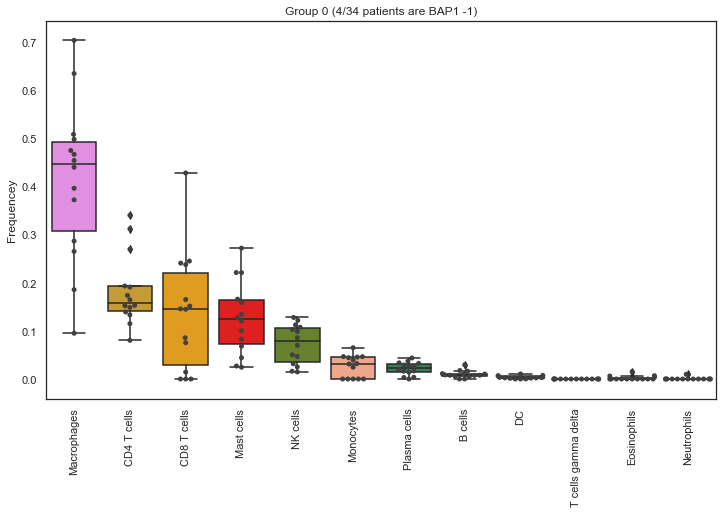

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[0]], "Group 0 (4/34 patients are BAP1 -1)")

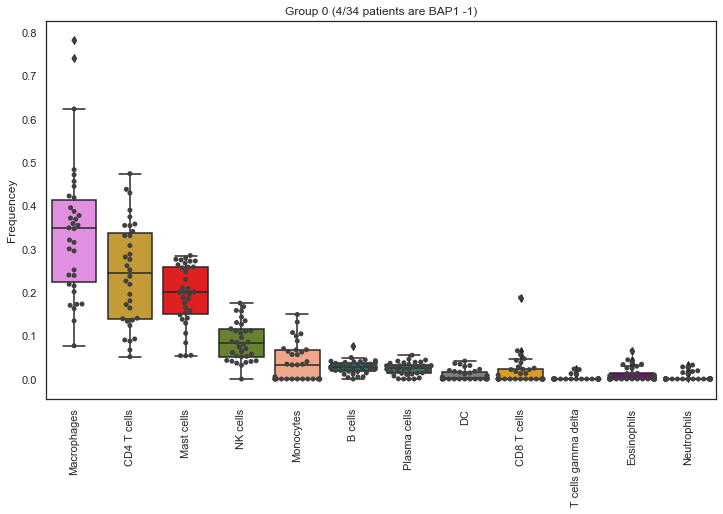

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [19]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[1]], "Group 0 (4/34 patients are BAP1 -1)")

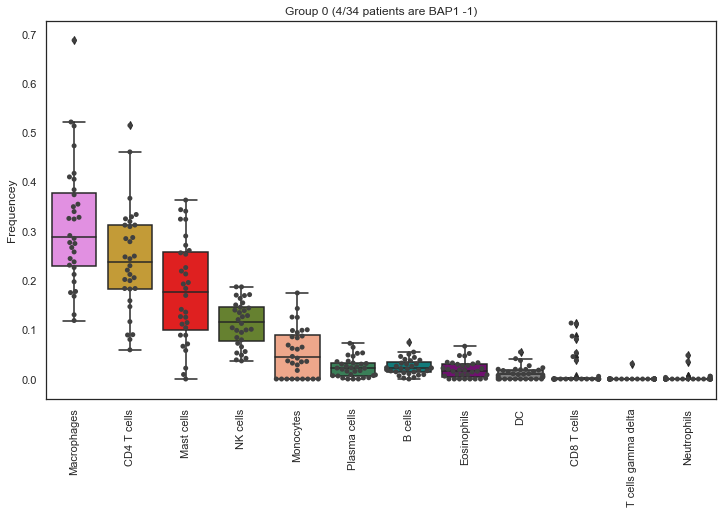

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[grouped_ids[2]], "Group 0 (4/34 patients are BAP1 -1)")

In [31]:
def print_significant_immune_differences(immune_fractions, grouped_ids):
    ## Test every immune cell against every group and print and return it if significant
    immune_cell_types = list(immune_fractions.columns)
    for i in range(len(immune_fractions.columns)):
        for c in combinations(list(range(len(grouped_ids))),2):
            if set(immune_fractions.loc[grouped_ids[c[0]],immune_cell_types[i]].values) != set(immune_fractions.loc[grouped_ids[c[1]],immune_cell_types[i]].values):
                mw_result = mannwhitneyu(immune_fractions.loc[grouped_ids[c[0]],immune_cell_types[i]].values,immune_fractions.loc[grouped_ids[c[1]],immune_cell_types[i]].values)
                if mw_result[1] < .05:
                    print(immune_cell_types[i]," difference between groups ",c[0]," ",c[1]," p-value: ", mw_result[1])
    
    
def print_significant_phenotype_differences(grouped_ids):
    for p in list(patient_dict[list(patient_dict.keys())[0]].keys()):
        for c in combinations(list(range(len(grouped_ids))),2):
            if set([patient_dict[i][p] for i in grouped_ids[c[0]]]) != set([patient_dict[i][p] for i in grouped_ids[c[1]]]):
                mw_result = mannwhitneyu([patient_dict[i][p] for i in grouped_ids[c[0]]],[patient_dict[i][p] for i in grouped_ids[c[1]]])
                if mw_result[1] < .05:
                    print(p," difference between groups ",c[0]," ",c[1]," p-value: ", mw_result[1])
                    
def print_most_significant_gene_differences(grouped_ids,v_thresh=.01,num_top_genes=20):
    cc = [i for i in grouped_ids[0]]
    cc.extend(grouped_ids[1])
    var_df = td.variance_threshold_selector(gene_expression.loc[cc,:].T,threshold=v_thresh).T
    l = []
    for g in var_df.columns:
        g1 = var_df.loc[grouped_ids[0],g].values
        g2 = var_df.loc[grouped_ids[1],g].values
        mw_result = mannwhitneyu(g1,g2)[1]
        if mw_result <.05:
            l.append((g,g1.mean()-g2.mean(),np.median(g1)-np.median(g2),mw_result))
    l = sorted(l, key=lambda g:g[3],reverse=False)
    print(l[:num_top_genes])
    return l

def graph_most_significant_gene_differences(grouped_ids,v_thresh=.01,num_top_genes=20,title="",vmin=0, vmax=2.5):
    cc = [i for i in grouped_ids[0]]
    cc.extend(grouped_ids[1])
    var_df = td.variance_threshold_selector(gene_expression.loc[cc,:].T,threshold=v_thresh).T
    l = []
    for g in var_df.columns:
        g1 = var_df.loc[grouped_ids[0],g].values
        g2 = var_df.loc[grouped_ids[1],g].values
        mw_result = mannwhitneyu(g1,g2)[1]
        if mw_result <.05:
            l.append((g,g1.mean()-g2.mean(),np.median(g1)-np.median(g2),mw_result))
    l = sorted(l, key=lambda g:g[3],reverse=False)
    l = l[:num_top_genes]
    t = [[gene_expression.loc[grouped_ids[0],g[0]].mean(),gene_expression.loc[grouped_ids[1],g[0]].mean()] for g in l]
    htmp = pd.DataFrame()
    htmp["Weighted Difference"] = [abs(np.mean(gene_expression.loc[grouped_ids[0],g[0]].values)-np.mean(gene_expression.loc[grouped_ids[1],g[0]].values))/np.std(gene_expression.loc[:,g[0]].values) for g in l]
    htmp.index = [g[0] for g in l]
    
    ax = sns.heatmap(htmp, annot=True, cmap="YlGnBu",vmin=vmin,vmax=vmax)
    ax.set_title(title)
    ax.set_ylim(len(htmp), 0)
    #ax.set_ylim(0.5, -0.5)
def cell_frequency_barchart(sample_cell_freq, title,xsize=15, ysize=7):
    """
     Input:
        - 'sample_cell_freq': A dataframe that include cell frequency of samples
            Rows are samples id, columns are cell names
    Output:
        - a barchart plot that shows all cell frequency of all samples
    """
    new_cell_freq=td.combine_celltypes(sample_cell_freq)
    b=new_cell_freq.median(axis = 0)
    b=list(zip(b.index,b))
    b = sorted(b, key=lambda x: x[-1],reverse=True)
    sorted_cells=[x[0] for x in b]
    new_cell_freq=new_cell_freq[sorted_cells]
    palette={'Macrophages':'violet','CD8 T cells':'orange','CD4 T cells':'goldenrod','Monocytes':'lightsalmon','NK cells':'olivedrab','Mast cells':'red','B cells':'darkcyan','T cells gamma delta':'dodgerblue','DC':'gray','Plasma cells':'seagreen','Neutrophils':'navy', 'Eosinophils':'purple'}
    sns.set(rc={'figure.figsize':(xsize,ysize)})
    sns.set_style("white")
    new_cell_freq['Tumor_Radius'] = [patient_dict[p]['tumor_thickness'] if not np.isnan(patient_dict[p]['tumor_thickness']) else -1 for p in list(new_cell_freq.index)]
    new_cell_freq['Age'] = [patient_dict[p]['age'] if not np.isnan(patient_dict[p]['age']) else -1 for p in list(new_cell_freq.index)]
    new_cell_freq = new_cell_freq.sort_values(['Tumor_Radius',"Age"],axis=0,ascending=False)
    del new_cell_freq['Tumor_Radius']
    del new_cell_freq['Age']

    color=[]
    for gene in sorted_cells:
        a=palette[gene]
        color=color+[a]

    ax=new_cell_freq.plot.bar(stacked=True,color=color,width=1)
    ax.legend(loc='right', bbox_to_anchor=(1.25,0.5),
          fancybox=True, shadow=False, ncol=1)

    #plt.yticks([])
    plt.margins(0, 0)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xlabel('Patients')
    plt.subplots_adjust(top=0.95,left=0.05, right=0.8) # don't cut off legend
    plt.show()
    return

print_significant_immune_differences(immune_fractions_df,grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.0002476602261807433
CD8 T cells  difference between groups  0   2  p-value:  3.2302924114901535e-05
Monocytes  difference between groups  0   2  p-value:  0.04981864073009022
Eosinophils  difference between groups  0   2  p-value:  0.00013747705787189393
Eosinophils  difference between groups  1   2  p-value:  0.004726407515110329
B cells  difference between groups  0   1  p-value:  8.689744952821204e-05
B cells  difference between groups  0   2  p-value:  0.0005137075539582791
CD4 T cells  difference between groups  0   2  p-value:  0.02444768208795753
NK cells  difference between groups  0   2  p-value:  0.0051391678076250355
NK cells  difference between groups  1   2  p-value:  0.012581294123348024
Macrophages  difference between groups  0   1  p-value:  0.035674384648201295
Macrophages  difference between groups  0   2  p-value:  0.01536756970000732
Mast cells  difference between groups  0   1  p-value:  0.0041148206013324


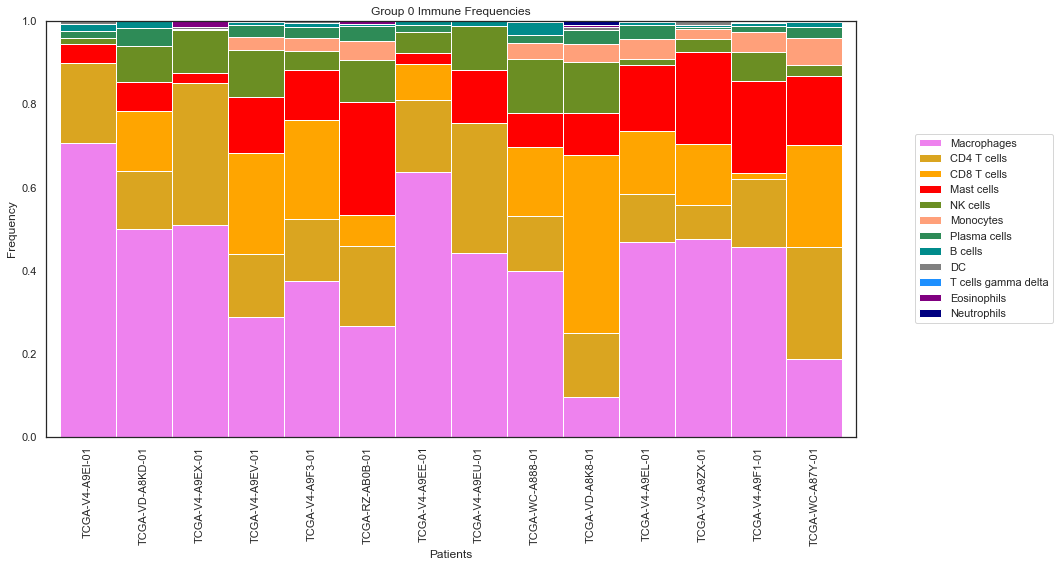

In [22]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[grouped_ids[0],:], "Group 0 Immune Frequencies",xsize=15, ysize=7)

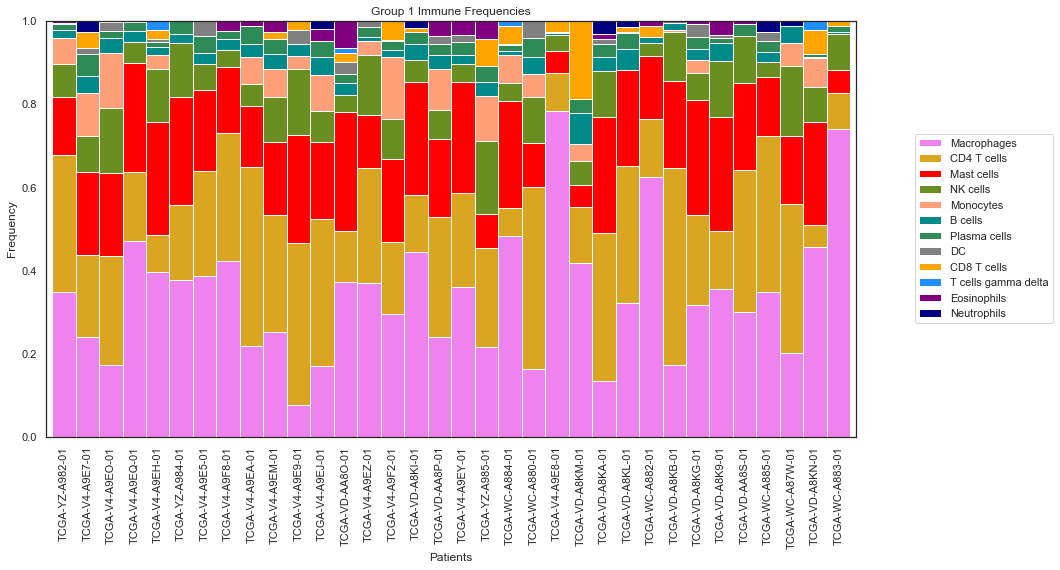

In [23]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[grouped_ids[1],:], "Group 1 Immune Frequencies",xsize=15, ysize=7)

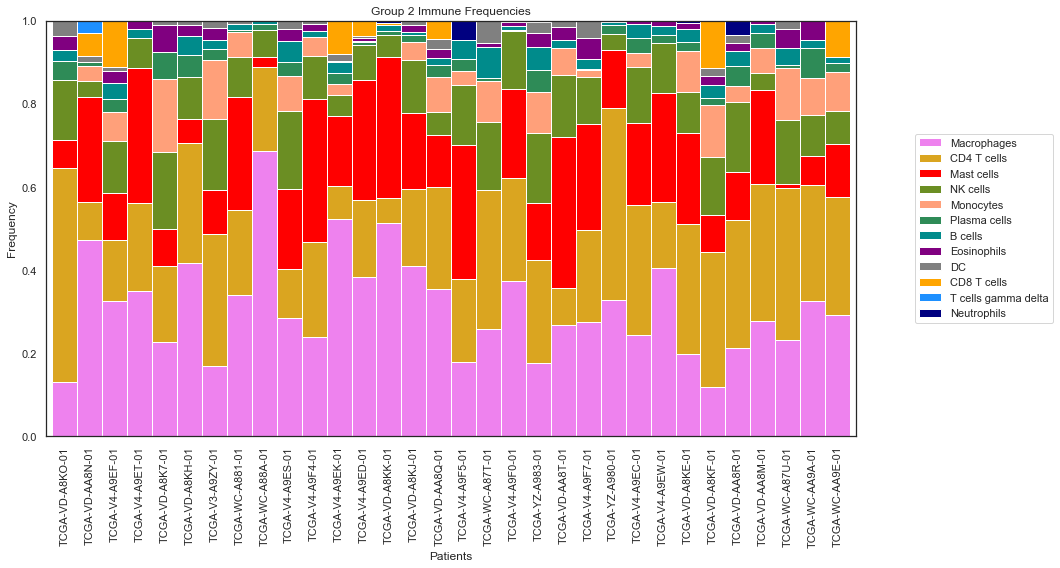

In [24]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[grouped_ids[2],:], "Group 2 Immune Frequencies",xsize=15, ysize=7)

In [25]:
print("Percentage of total BAP1 -1 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/44 for i in range(len(grouped_ids))])
print("Percentage of total BAP1 0 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/36 for i in range(len(grouped_ids))])
print("Percentage of BAP1 -1 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/len(grouped_ids[i]) for i in range(len(grouped_ids))])
print("Percentage of BAP1 0 by cluster: ",[sum([1 for p in grouped_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/len(grouped_ids[i]) for i in range(len(grouped_ids))])

Percentage of total BAP1 -1 by cluster:  [0.3181818181818182, 0.36363636363636365, 0.3181818181818182]
Percentage of total BAP1 0 by cluster:  [0.0, 0.5, 0.5]
Percentage of BAP1 -1 by cluster:  [1.0, 0.47058823529411764, 0.4375]
Percentage of BAP1 0 by cluster:  [0.0, 0.5294117647058824, 0.5625]


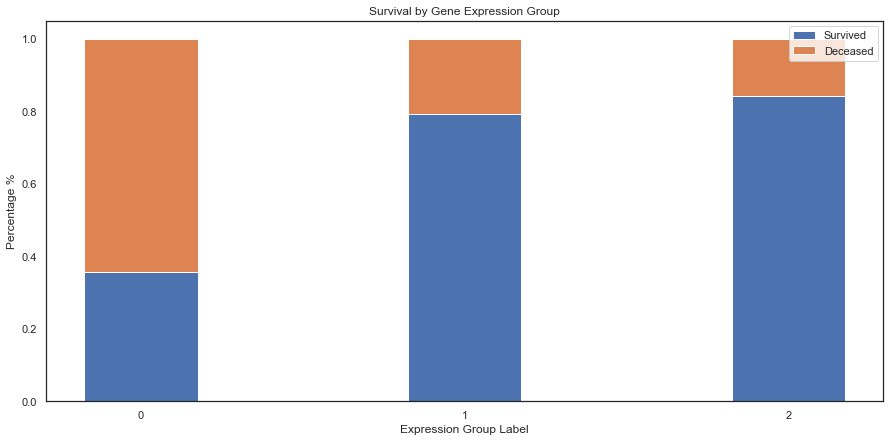

0 1 (-2.9190766354039663, 0.0035106990508421572)
0 2 (-3.3003302150029206, 0.000965711268195142)
1 2 (-0.5224729095144275, 0.6013411036605578)


In [26]:
N = 3
living_group= [sum([1 for p in grouped_ids[i] if patient_dict[p]['os_status'] == 1])/len(grouped_ids[i]) for  i in range(N)]
dead_group = [sum([1 for p in grouped_ids[i] if patient_dict[p]['os_status'] == 0])/len(grouped_ids[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Expression Group Label')
plt.title('Survival by Gene Expression Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()
for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in grouped_ids[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in grouped_ids[c[1]] if patient_dict[p]['os_status'] == 1])],[len(grouped_ids[c[0]]),len(grouped_ids[c[1]])]))

In [27]:
print(sum([1 for p in grouped_ids[2] if patient_dict[p]['BAP1_mutation'] == -1]))
print(len(grouped_ids[0]),len(grouped_ids[1]),len(grouped_ids[2]))
14/32

14
14 34 32


0.4375

In [32]:
fg = print_most_significant_gene_differences([grouped_ids[0],grouped_ids[2]],v_thresh=.01,num_top_genes=20)

[('WARS', 0.2242919185352595, 0.23725146555997997, 1.0384149138006446e-07), ('ACTB', 0.2769606008370614, 0.2691639989062579, 1.1801969105241415e-07), ('PSAP', 0.20551773690878652, 0.224041745407736, 1.3405968059821178e-07), ('A2M', 0.3359402191362185, 0.3387720254965051, 1.5219559999836899e-07), ('SDCBP', 0.29909540529159684, 0.308701883529558, 1.7268963986298407e-07), ('HLA-A', 0.4930479208797378, 0.4865613085310756, 2.5062133249452e-07), ('HLA-C', 0.31225908832855614, 0.2850054411383627, 2.5143230406103324e-07), ('B2M', 0.38056524905669586, 0.42235368719077465, 2.5143230406103324e-07), ('HLA-B', 0.5319637510316649, 0.5593777247458679, 6.662943576534451e-07), ('CD74', 0.3271590896720425, 0.28825027491241023, 8.486212393950659e-07), ('LGALS3BP', 0.16377203295153217, 0.17019402253428514, 1.0752377401776474e-06), ('GNAS', 0.186948033598209, 0.1635819112133375, 8.198468231735423e-06), ('FTL', 0.15742753632701872, 0.16419611557952135, 1.2569803083682652e-05), ('PABPC1', 0.3000388341063507,

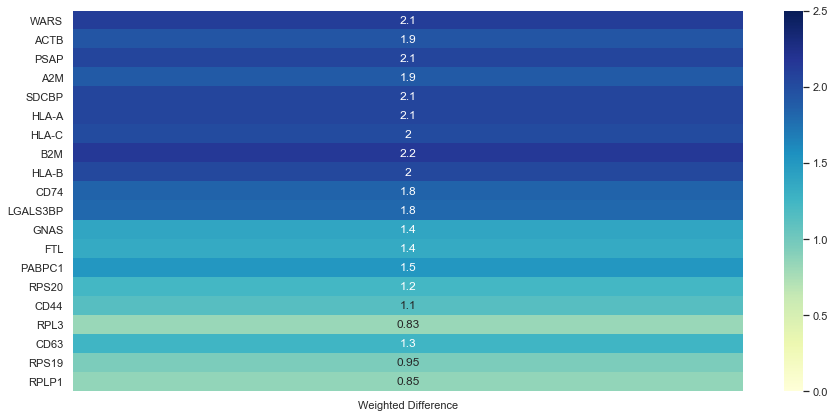

In [33]:
graph_most_significant_gene_differences([grouped_ids[0],grouped_ids[2]],v_thresh=.01,num_top_genes=20)

In [34]:
print_significant_phenotype_differences(grouped_ids)

BAP1_mutation  difference between groups  0   1  p-value:  0.00034429571190223654
BAP1_mutation  difference between groups  0   2  p-value:  0.0001974677969144362
stage  difference between groups  0   1  p-value:  0.041025995246282726
N  difference between groups  0   1  p-value:  0.01408328229221681


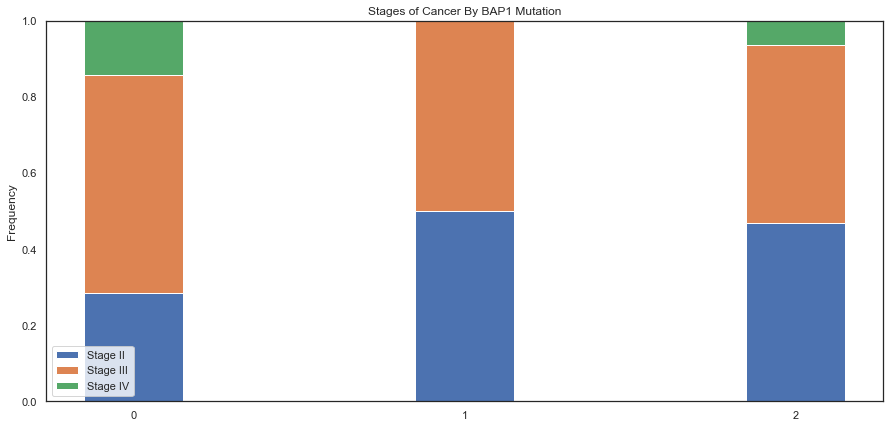

In [35]:
labels = ['0','1','2']
cells = ["0","1",'2']
all_means = [[sum([1 for p in i if patient_dict[p]['stage']==int(c)])/len(i) for i in grouped_ids] for c in cells]
#all_errors = [[np.std(immune_fractions_df.loc[bap1_grouped_ids[i], c]) for i in range(len(bap1_grouped_ids))] for c in cells]
y = [[patient_dict[p]['N'] for p in i] for i in grouped_ids]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
leb=["Stage II","Stage III", "Stage IV"]
fig, ax = plt.subplots()
ax.bar(x, all_means[0], width, label="Stage II")
ax.bar(x, all_means[1], width,
    label="Stage III",bottom=all_means[0])
ax.bar(x, all_means[2], width,
    label="Stage IV",bottom=[i+j for i,j in zip(all_means[0], all_means[1])])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Stages of Cancer By BAP1 Mutation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [36]:
#y[1] = [i for i in y[1] if not np.isnan(i)]
print(np.mean(y[0]),np.std(y[0]),np.mean(y[1]),np.std(y[1]),mannwhitneyu(y[0],y[1]))

print(Counter(y[0]),Counter(y[1]))
obs = [[12,2],[34,0]]
print(chi2_contingency(np.array(obs)))

0.14285714285714285 0.34992710611188266 0.0 0.0 MannwhitneyuResult(statistic=204.0, pvalue=0.01408328229221681)
Counter({0: 12, 1: 2}) Counter({0: 34})
(2.1220314212641576, 0.1451938513495287, 1, array([[13.41666667,  0.58333333],
       [32.58333333,  1.41666667]]))


### BAP1 Groups Analysis

In [37]:
bap1_grouped_ids = [[],[]]
for p in list(patient_dict.keys()):
    if patient_dict[p]['BAP1_mutation'] == -1:
        bap1_grouped_ids[1].append(p)
    else:
        bap1_grouped_ids[0].append(p)
print_significant_immune_differences(immune_fractions_df,bap1_grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.00027535644116621975
Monocytes  difference between groups  0   1  p-value:  0.007911008312463533
Eosinophils  difference between groups  0   1  p-value:  0.030634448044689143
B cells  difference between groups  0   1  p-value:  0.034145127411382696
CD4 T cells  difference between groups  0   1  p-value:  0.00010020775928581038
NK cells  difference between groups  0   1  p-value:  0.016484882575862253
Macrophages  difference between groups  0   1  p-value:  0.00037538175596295314
DC  difference between groups  0   1  p-value:  0.007948980537117336


In [38]:
inc = [p for p in list(gene_expression.index) if not np.isnan(patient_dict[p]["tumor_diameter"])]
mn = [patient_dict[p]['tumor_diameter'] for p in inc if patient_dict[p]['BAP1_mutation'] == 0]
print(np.mean(mn), np.std(mn))
#sns.scatterplot(gene_expression.loc[inc,"BAP1"], [patient_dict[p]["tumor_diameter"] for p in inc])
#print(stats.pearsonr(gene_expression.loc[inc,"BAP1"], [patient_dict[p]["tumor_diameter"] for p in inc]))

16.17583333333333 3.5432669913827017


In [39]:
print_significant_phenotype_differences(bap1_grouped_ids)

BAP1_mutation  difference between groups  0   1  p-value:  3.266268206102596e-19
DSS_time  difference between groups  0   1  p-value:  0.03960457447302679
PFI_time  difference between groups  0   1  p-value:  0.006295071664032272
tumor_diameter  difference between groups  0   1  p-value:  0.045464145978725425
stage  difference between groups  0   1  p-value:  0.002294464302658786
T  difference between groups  0   1  p-value:  0.007213925287155189


In [40]:
print_significant_phenotype_differences(grouped_ids)

BAP1_mutation  difference between groups  0   1  p-value:  0.00034429571190223654
BAP1_mutation  difference between groups  0   2  p-value:  0.0001974677969144362
stage  difference between groups  0   1  p-value:  0.041025995246282726
N  difference between groups  0   1  p-value:  0.01408328229221681


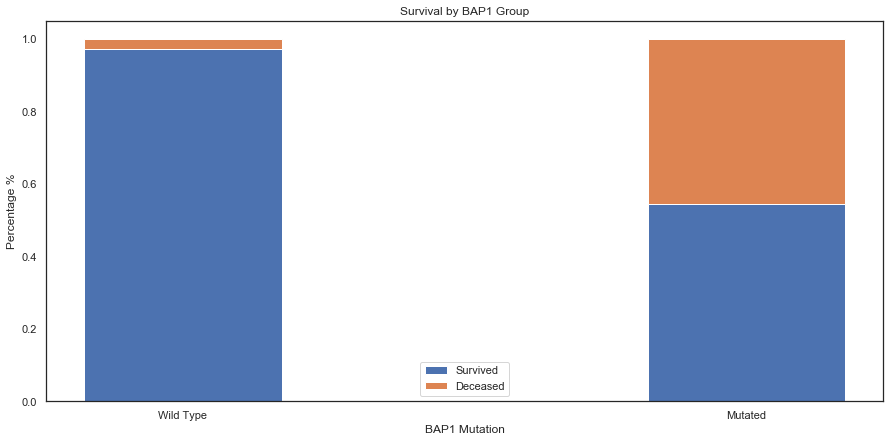

(4.315970301629612, 1.589033439369561e-05)
0.5454545454545454


In [41]:
living_group= [sum([1 for p in bap1_grouped_ids[i] if patient_dict[p]['os_status'] == 1])/len(bap1_grouped_ids[i]) for  i in range(2)]
dead_group = [sum([1 for p in bap1_grouped_ids[i] if patient_dict[p]['os_status'] == 0])/len(bap1_grouped_ids[i]) for  i in range(2)]
v = [living_group,dead_group]
N = 2
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('BAP1 Mutation')
plt.title('Survival by BAP1 Group')

plt.xticks(ind, ('Wild Type', 'Mutated'))
plt.legend(loc='best')
plt.show()
print(proportions_ztest([sum([1 for p in bap1_grouped_ids[0] if patient_dict[p]['os_status'] == 1]),sum([1 for p in bap1_grouped_ids[1] if patient_dict[p]['os_status'] == 1])],[len(bap1_grouped_ids[0]),len(bap1_grouped_ids[1])]))
print(sum([1 for p in bap1_grouped_ids[1] if patient_dict[p]['os_status'] == 1])/len(bap1_grouped_ids[1]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

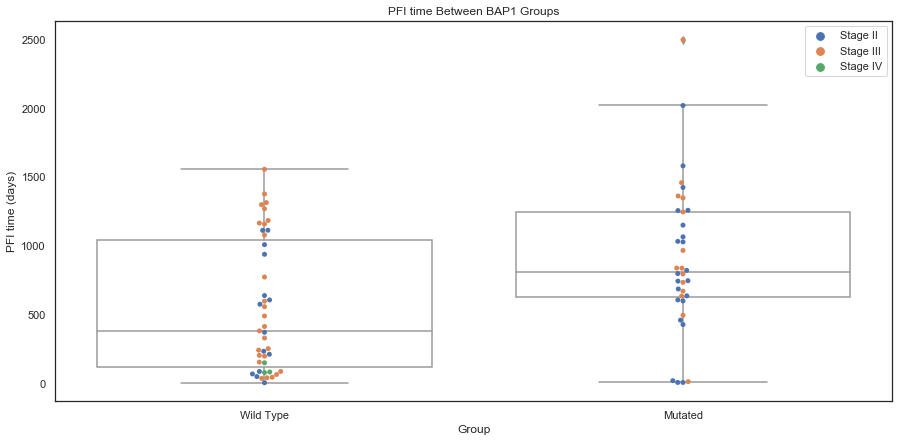

In [42]:
#y = [[patient_dict[p]['DSS_time'] for p in bap1_grouped_ids[i]] for i in range(2)]
y = [[patient_dict[p]['PFI_time'], "Mutated" if patient_dict[p]["BAP1_mutation"] == -1 else "WT"] for p in list(patient_dict.keys())]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['stage'] ==0 :
        h.append("Stage II")
    elif patient_dict[p]['stage'] ==1:
        h.append("Stage III")
    else:
        h.append("Stage IV")
sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w")
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group")
plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

Text(0, 0.5, 'DSS time (days)')

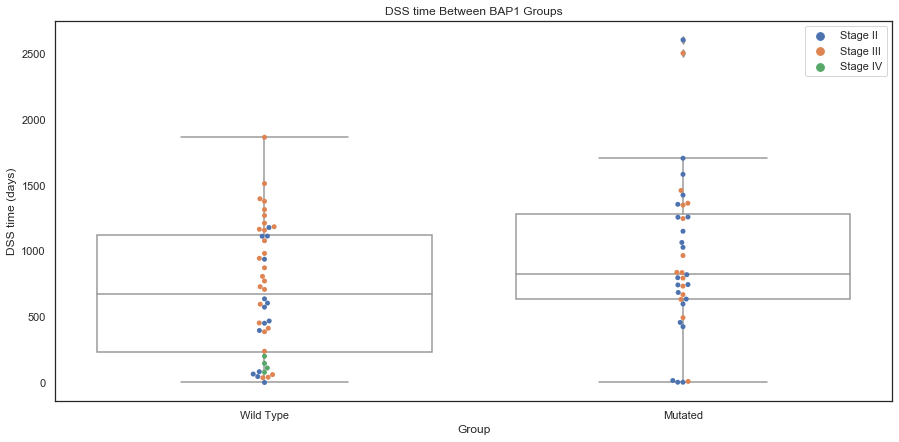

In [43]:
y = [[patient_dict[p]['DSS_time'], "Mutated" if patient_dict[p]["BAP1_mutation"] == -1 else "WT"] for p in list(patient_dict.keys())]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['stage'] ==0 :
        h.append("Stage II")
    elif patient_dict[p]['stage'] ==1:
        h.append("Stage III")
    else:
        h.append("Stage IV")
sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w")
plt.title("DSS time Between BAP1 Groups")
plt.xlabel("Group")
plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("DSS time (days)")

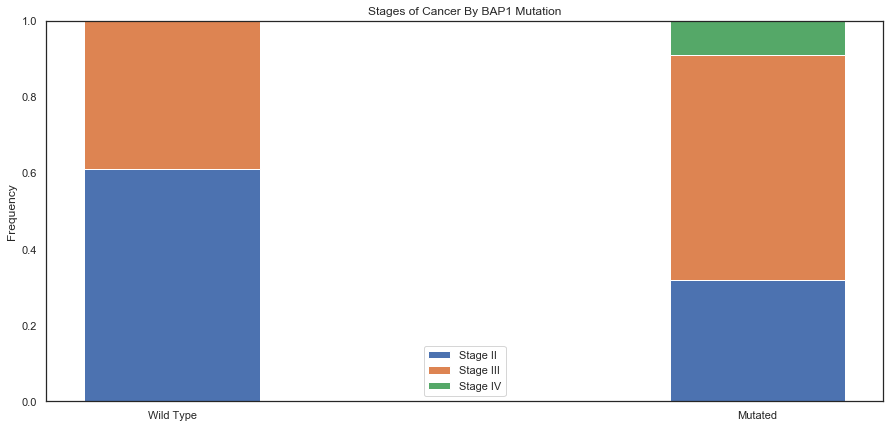

In [44]:
labels = ['Wild Type','Mutated']
cells = ["0","1",'2']
all_means = [[sum([1 for p in i if patient_dict[p]['stage']==int(c)])/len(i) for i in bap1_grouped_ids] for c in cells]
#all_errors = [[np.std(immune_fractions_df.loc[bap1_grouped_ids[i], c]) for i in range(len(bap1_grouped_ids))] for c in cells]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
leb=["Stage II","Stage III", "Stage IV"]
fig, ax = plt.subplots()
ax.bar(x, all_means[0], width, label="Stage II")
ax.bar(x, all_means[1], width,
    label="Stage III",bottom=all_means[0])
ax.bar(x, all_means[2], width,
    label="Stage IV",bottom=[i+j for i,j in zip(all_means[0], all_means[1])])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Stages of Cancer By BAP1 Mutation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [45]:
y[1] = [i for i in y[1] if not np.isnan(i)]
print(np.mean(y[0]),np.std(y[0]),np.mean(y[1]),np.std(y[1]),mannwhitneyu(y[0],y[1]))

print(Counter(y[0]),Counter(y[1]))
obs = [[3,20,13],[1,16,25]]
print(chi2_contingency(np.array(obs)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

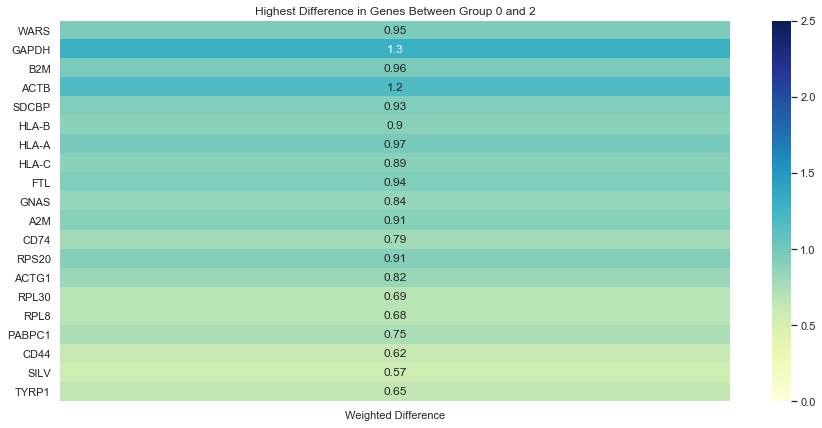

In [46]:
graph_most_significant_gene_differences(bap1_grouped_ids,v_thresh=.01,num_top_genes=20,title="Highest Difference in Genes Between Group 0 and 2")

(0, 0.85)

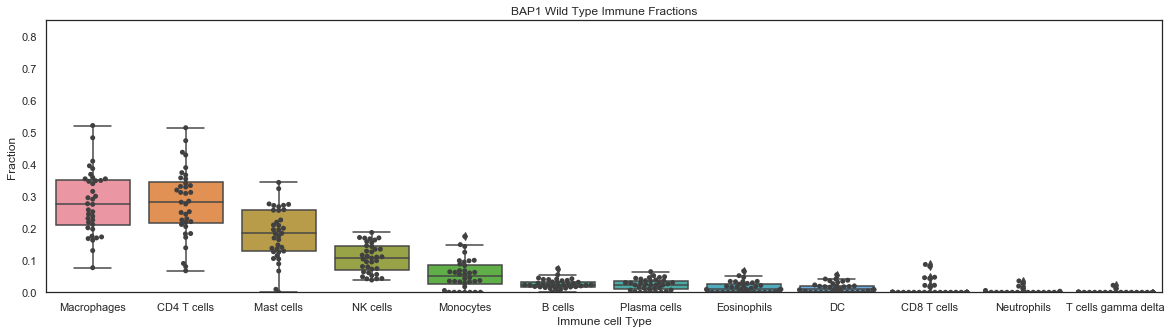

In [47]:
y = [[immune_fractions_df.loc[p,:].values for p in bap1_grouped_ids[i]] for i in range(2)]
temp_df1 = pd.DataFrame(data=y[0])
temp_df1.columns=immune_fractions_df.columns
temp_df1= temp_df1.T.assign(m=temp_df1.mean(axis=0)).sort_values('m',ascending=False).drop('m', axis=1).T
plt.figure(figsize=(20,5))
sns.swarmplot(data=temp_df1,color=".25")
sns.boxplot(data=temp_df1)
plt.title("BAP1 Wild Type Immune Fractions")
plt.xlabel("Immune cell Type")
plt.ylabel("Fraction")
plt.ylim(0,0.85)

(0, 0.85)

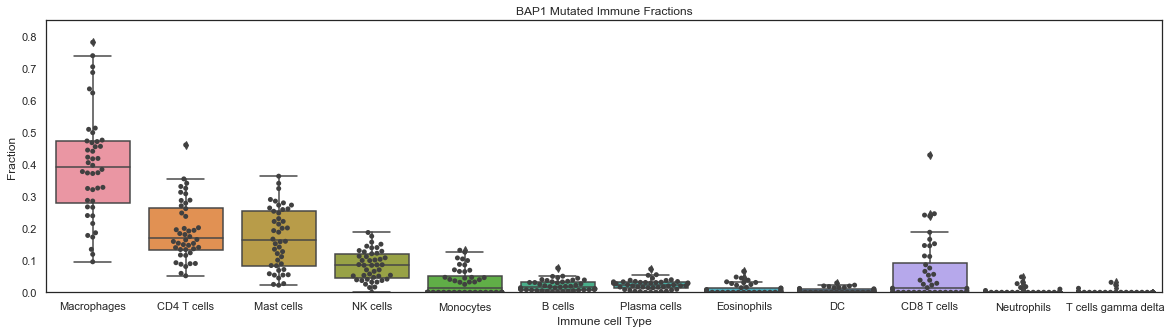

In [48]:
temp_df = pd.DataFrame(data=y[1])
temp_df.columns=immune_fractions_df.columns
temp_df = temp_df[temp_df1.columns]
plt.figure(figsize=(20,5))
sns.swarmplot( data=temp_df,color=".25")
sns.boxplot(data=temp_df)
plt.title("BAP1 Mutated Immune Fractions")
plt.xlabel("Immune cell Type")
plt.ylabel("Fraction")
plt.ylim(0,0.85)

In [49]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in bap1_grouped_ids[1]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('Monocytes', 'Macrophages', -0.5962148849475533, 1.9498204207424667e-05), ('NK cells', 'Macrophages', -0.5083862684503688, 0.00042612336900596547), ('Eosinophils', 'DC', 0.48419794782716896, 0.0008675618270418252), ('Plasma cells', 'B cells', 0.4763231638878316, 0.0010815064627389965), ('Monocytes', 'DC', 0.4532499332771047, 0.002003550675273941), ('Monocytes', 'NK cells', 0.45212022517842976, 0.002062724766903638), ('Macrophages', 'DC', -0.4111644325991508, 0.005560461951529596), ('Plasma cells', 'Macrophages', -0.3993714017929828, 0.007239241507625473), ('CD4 T cells', 'Macrophages', -0.38241784837848686, 0.010411795563684607), ('Neutrophils', 'Mast cells', 0.3637645374797478, 0.015212594405388665), ('Neutrophils', 'Macrophages', -0.3615188172777466, 0.015900711071216694), ('Macrophages', 'Mast cells', -0.35451515248284765, 0.01821846201128674), ('B cells', 'Macrophages', -0.34999975846802045, 0.019858997056037095), ('Neutrophils', 'B cells', 0.3473521503471388, 0.02087747750317151

In [50]:
l = []
for c in combinations(list(patient_dict[list(patient_dict.keys())[0]].keys()),2):
    x = []
    y = []
    for p in bap1_grouped_ids[1]:#list(patient_dict.keys()): ##
        if not np.isnan(patient_dict[p][c[0]]) and not np.isnan(patient_dict[p][c[1]]):
            x.append(patient_dict[p][c[0]])
            y.append(patient_dict[p][c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('DSS_time', 'PFI_time', 0.8334158272610471, 4.0554767438600376e-12), ('stage', 'T', 0.7509954363306705, 1.0109587376886615e-08), ('tumor_diameter', 'T', 0.6950244829176458, 3.270017427065442e-07), ('weight', 'N', 0.6949420737693275, 2.8720671801561988e-05), ('tumor_diameter', 'stage', 0.5709098054480437, 6.393984228572152e-05), ('DSS_time', 'age', -0.45836560700229967, 0.0017539622659624495), ('tumor_thickness', 'T', 0.45076610374272474, 0.0027371935357047923), ('tumor_thickness', 'stage', 0.437041285022983, 0.0030140257823154768), ('weight', 'stage', 0.4851545922991056, 0.00763964904001947), ('tumor_diameter', 'tumor_thickness', 0.3753931568107648, 0.013118150658646716), ('PFI_time', 'age', -0.34890855720948, 0.02184130750416383), ('os_status', 'T', -0.3304135690539768, 0.03258737992836024)]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [51]:
l = []
for c in list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for g in immune_fractions_df.columns:
        y = []
        inc = [p for p in mort_grouped_ids[0] if not np.isnan(patient_dict[p][c])]
        x = immune_fractions_df.loc[inc,g].values
        for p in inc: #list(patient_dict.keys()): ##
            y.append(patient_dict[p][c])
        #x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((c,g, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

NameError: name 'mort_grouped_ids' is not defined

In [ ]:
graph_most_significant_gene_differences(mort_grouped_ids,vmax=1)

In [ ]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in bap1_grouped_ids[0]:#bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)
for o in l[:6]:
    print(o[0],"vs.",o[1],"&",o[2],"&",o[3])

In [52]:
td.corr_table()

TypeError: corr_table() missing 4 required positional arguments: 'methods', 'results', 'cell_types', and 'true_freqs'

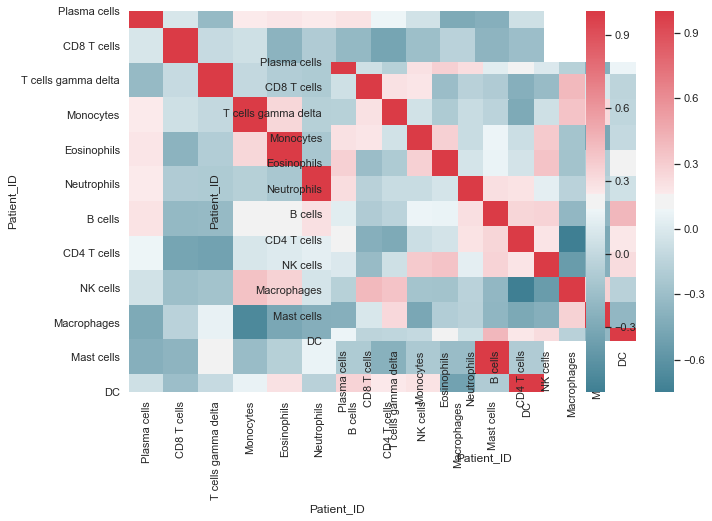

In [53]:
#corr = immune_fractions_df.loc[:,:].corr()
#corr.style.background_gradient(cmap='coolwarm')
f = plt.figure()
ax1 = f.add_subplot(111)
ax2 = f.add_subplot(122)
corr1 = immune_fractions_df.loc[:,:].corr()
corr2 = immune_fractions_df.loc[bap1_grouped_ids[0],:].corr()
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax1)
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax2)
#plt.matshow(immune_fractions_df.loc[:,:].corr())
#plt.show()

(-0.38241784837848686, 0.010411795563684607)
(-0.7465739318810355, 1.71181835779746e-07)


Text(0.5, 1.0, 'B cells vs. DSS time (color BAP1 mutation)')

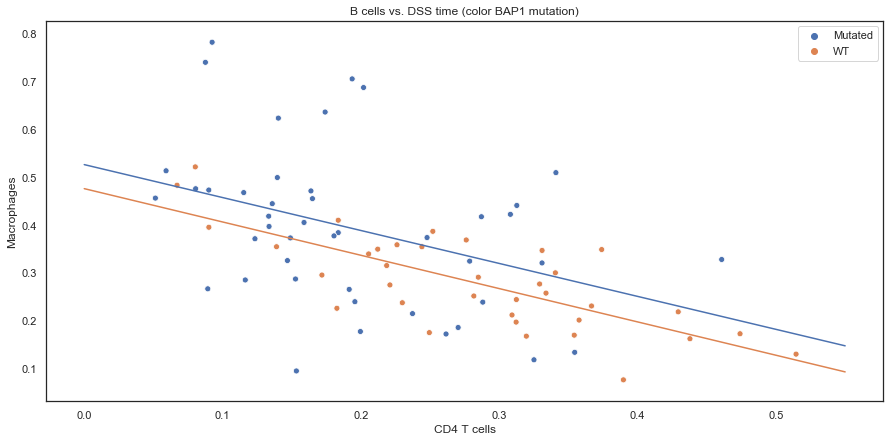

In [54]:
sns.scatterplot(immune_fractions_df.loc[:,"CD4 T cells"], immune_fractions_df.loc[:,"Macrophages"], hue=["WT" if patient_dict[p]["BAP1_mutation"] == 0 else "Mutated" for p in list(immune_fractions_df.index)])
print(stats.pearsonr(immune_fractions_df.loc[bap1_grouped_ids[1],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[1],"Macrophages"]))
print(stats.pearsonr(immune_fractions_df.loc[bap1_grouped_ids[0],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[0],"Macrophages"]))

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[1],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[1],"Macrophages"], 1)
x = np.linspace(0,.55,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[0],"CD4 T cells"], immune_fractions_df.loc[bap1_grouped_ids[0],"Macrophages"], 1)
x = np.linspace(0,.55,10)
plt.plot(x, b + m * x, '-')



plt.title("B cells vs. DSS time (color BAP1 mutation)")
#plt.ylabel("DSS time (days)")
#plt.text(.06,1600,'BAP1 WT, R: .429, P-val: .0091', fontsize=10, rotation=19, rotation_mode='anchor')
#plt.text(.06,700,'BAP1 Mutated, R: -0.0357, P-val: 0.817', fontsize=10, rotation=-1, rotation_mode='anchor')

In [55]:
l = []
for k in list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for i in range(len(immune_fractions_df.columns)):
        x = []
        y = []
        for p in bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
            if not np.isnan(patient_dict[p][k]):
                x.append(immune_fractions_df.loc[p,immune_fractions_df.columns[i]])
                y.append(patient_dict[p][k])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((immune_fractions_df.columns[i],k, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

[('B cells', 'DSS_time', 0.4286682460760405, 0.00909336312647272), ('DC', 'PFI_time', 0.38468917870599795, 0.020524084664866132), ('DC', 'DSS_time', 0.3614441016833473, 0.030314979764582157), ('Neutrophils', 'tumor_thickness', -0.34141442416067325, 0.04156168996481852), ('T cells gamma delta', 'tumor_diameter', 0.33580388311986814, 0.04525437531244321)]


(0.20533191569777254, 0.06767547388159235)


Text(0.06, 700, 'BAP1 Mutated, R: -0.0357, P-val: 0.817')

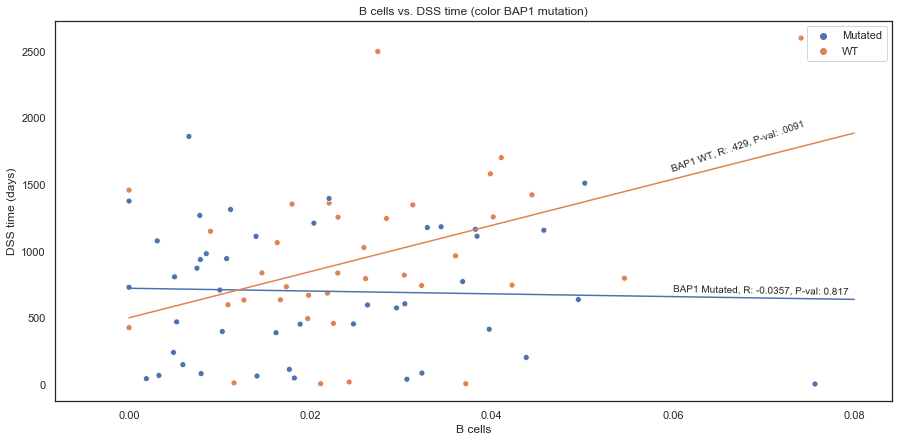

In [56]:
sns.scatterplot(immune_fractions_df.loc[:,"B cells"], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)], hue=["WT" if patient_dict[p]["BAP1_mutation"] == 0 else "Mutated" for p in list(immune_fractions_df.index)])
print(stats.pearsonr(immune_fractions_df.loc[:,"B cells"], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)]))


b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[1],"B cells"], [patient_dict[p]["DSS_time"] for p in bap1_grouped_ids[1]], 1)
x = np.linspace(0,.08,10)
sns.lineplot(x, b + m * x)

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[bap1_grouped_ids[0],"B cells"], [patient_dict[p]["DSS_time"] for p in bap1_grouped_ids[0]], 1)
x = np.linspace(0,.08,10)
plt.plot(x, b + m * x, '-')

plt.title("B cells vs. DSS time (color BAP1 mutation)")
plt.ylabel("DSS time (days)")
plt.text(.06,1600,'BAP1 WT, R: .429, P-val: .0091', fontsize=10, rotation=19, rotation_mode='anchor')
plt.text(.06,700,'BAP1 Mutated, R: -0.0357, P-val: 0.817', fontsize=10, rotation=-1, rotation_mode='anchor')

In [57]:
print_significant_immune_differences(immune_fractions_df,bap1_grouped_ids)
for i in immune_fractions_df.columns:
    print(i,"WT", round(immune_fractions_df.loc[bap1_grouped_ids[0],i].mean(),4),"±",round(immune_fractions_df.loc[bap1_grouped_ids[0],i].std(),4))
    print(i,"M", round(immune_fractions_df.loc[bap1_grouped_ids[1],i].mean(),4),"±", round(immune_fractions_df.loc[bap1_grouped_ids[1],i].std(),4))

CD8 T cells  difference between groups  0   1  p-value:  0.00027535644116621975
Monocytes  difference between groups  0   1  p-value:  0.007911008312463533
Eosinophils  difference between groups  0   1  p-value:  0.030634448044689143
B cells  difference between groups  0   1  p-value:  0.034145127411382696
CD4 T cells  difference between groups  0   1  p-value:  0.00010020775928581038
NK cells  difference between groups  0   1  p-value:  0.016484882575862253
Macrophages  difference between groups  0   1  p-value:  0.00037538175596295314
DC  difference between groups  0   1  p-value:  0.007948980537117336
Plasma cells WT 0.0239 ± 0.0174
Plasma cells M 0.023 ± 0.0159
CD8 T cells WT 0.0101 ± 0.0226
CD8 T cells M 0.0618 ± 0.0932
T cells gamma delta WT 0.0009 ± 0.0041
T cells gamma delta M 0.0015 ± 0.006
Monocytes WT 0.0554 ± 0.046
Monocytes M 0.0325 ± 0.0399
Eosinophils WT 0.0154 ± 0.017
Eosinophils M 0.0102 ± 0.016
Neutrophils WT 0.0029 ± 0.0081
Neutrophils M 0.0035 ± 0.0098
B cells WT 0.

### Immune Group Analysis

In [58]:
group_dataframes = cluster_gene_variance(immune_fractions_df,variance_threshold=.00003,pca_components=3, n_clusters=4)
immune_ids = [list(group_dataframes[i].index) for i in range(len(group_dataframes))]

Tot Explained Var (PCA):  0.8957264621645508
Frac Var Exp (k-menas):  0.6361580770048494
Counter({0: 35, 3: 28, 1: 10, 2: 7})


In [59]:
immune_ids_temp = [[],[],[]]
for i in range(len(immune_ids)):
    for p in immune_ids[i]:
        if i == 0:
            immune_ids_temp[0].append(p)
        elif i == 3:
            immune_ids_temp[2].append(p)
        else:
            immune_ids_temp[1].append(p)
immune_ids = immune_ids_temp  
print(len(immune_ids[0]),len(immune_ids[1]),len(immune_ids[2]))

35 17 28


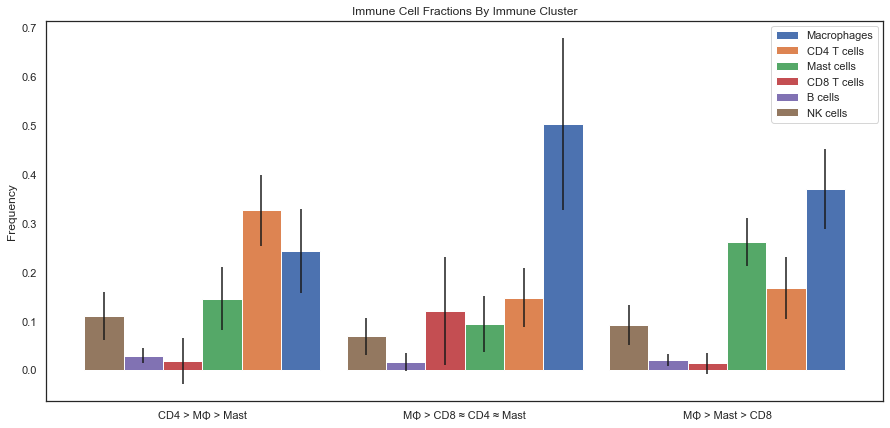

In [60]:
labels = ['CD4 > MΦ > Mast','MΦ > CD8 ≈ CD4 ≈ Mast',"MΦ > Mast > CD8"]
cells = ["Macrophages","CD4 T cells",'Mast cells',"CD8 T cells","B cells",'NK cells']
all_means = [[np.mean(immune_fractions_df.loc[immune_ids[i], c]) for i in range(3)] for c in cells]
all_errors = [[np.std(immune_fractions_df.loc[immune_ids[i], c]) for i in range(3)] for c in cells]

x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(cells)):
    ax.bar(x - ((i)-(len(cells)-1)/2)*width/len(cells), all_means[i], width/len(cells), label=cells[i],yerr=all_errors[i])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Immune Cell Fractions By Immune Cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.set(rc={'figure.figsize':(15,7)})
ax.legend()

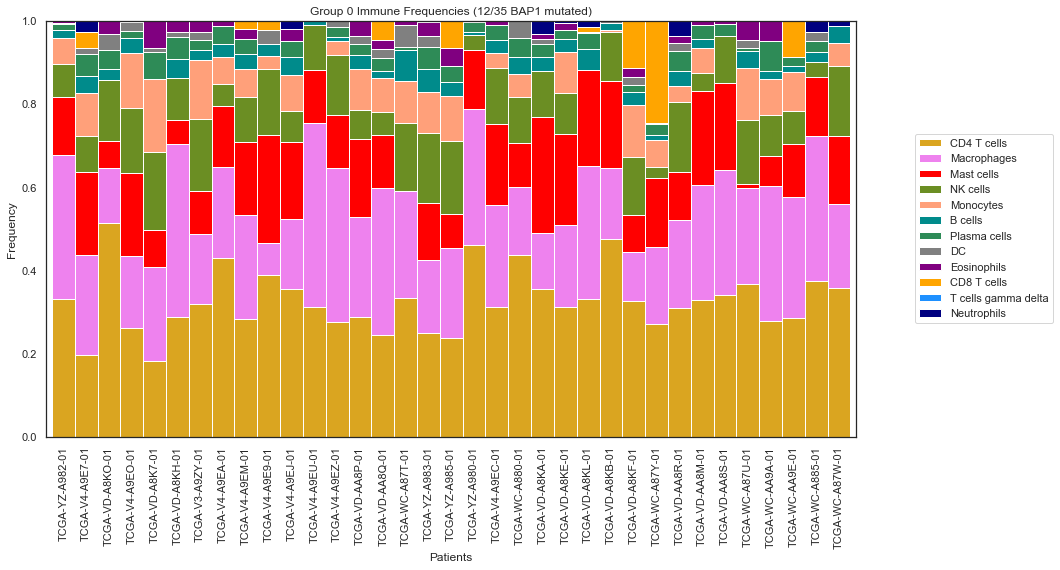

In [61]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[immune_ids[0],:], "Group 0 Immune Frequencies (12/35 BAP1 mutated)",xsize=15, ysize=7)

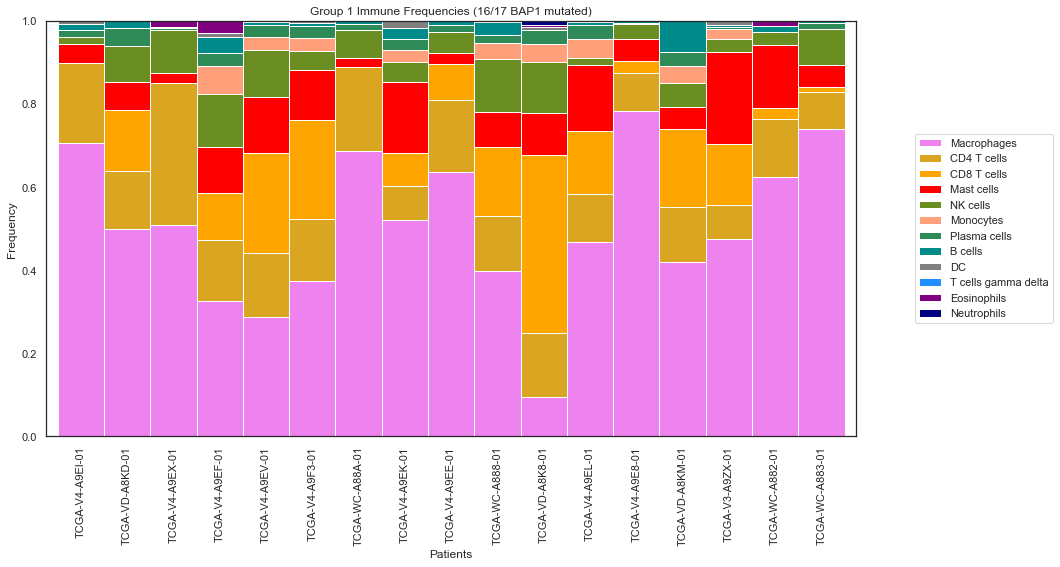

In [62]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[immune_ids[1],:], "Group 1 Immune Frequencies (16/17 BAP1 mutated)",xsize=15, ysize=7)

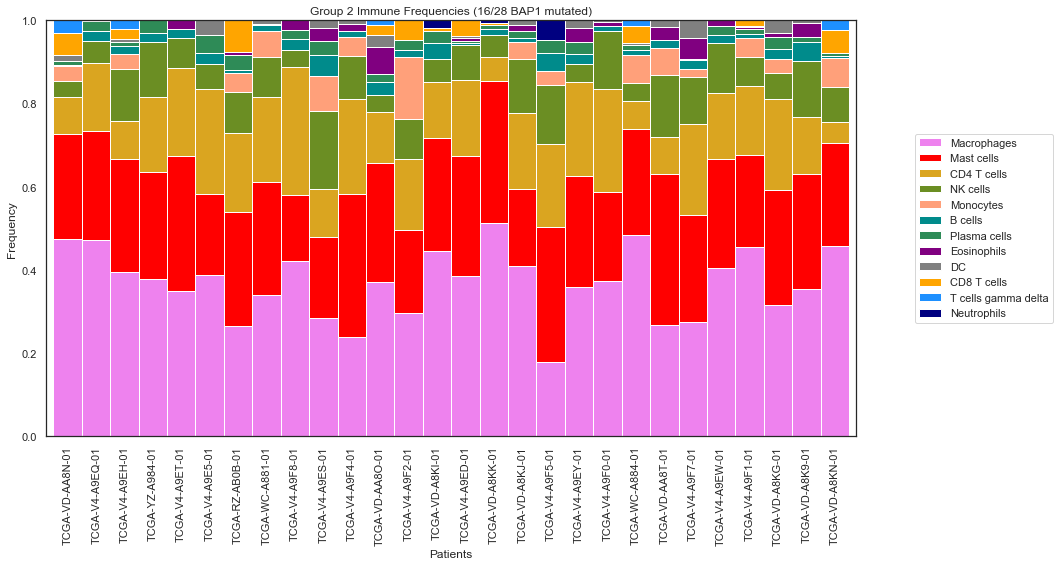

In [63]:
cell_frequency_barchart(immune_fractions_df_uncombined.loc[immune_ids[2],:], "Group 2 Immune Frequencies (16/28 BAP1 mutated)",xsize=15, ysize=7)

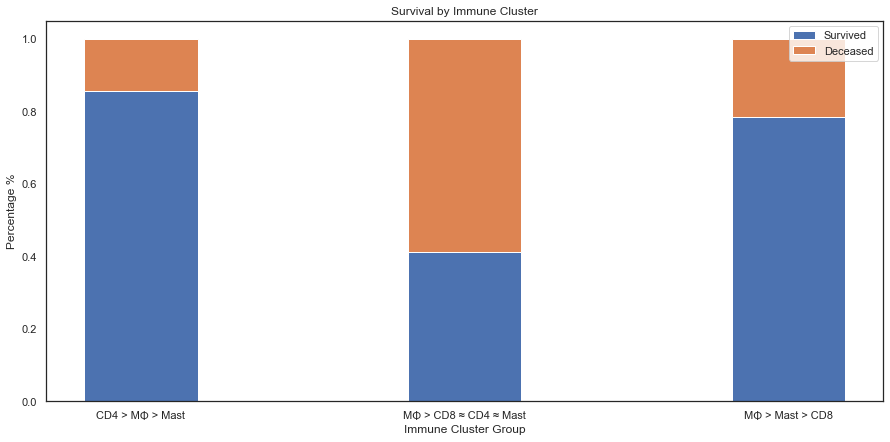

0 1 (3.325389884171072, 0.0008829496996181239)
0 2 (0.7420911673772301, 0.45803210097102054)
1 2 (-2.5407608716706225, 0.011061154229036864)
0.14285714285714285


In [64]:
living_group= [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 1])/len(immune_ids[i]) for  i in range(3)]
dead_group = [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 0])/len(immune_ids[i]) for  i in range(3)]
v = [living_group,dead_group]
N = 3
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Immune Cluster Group')
plt.title('Survival by Immune Cluster')

plt.xticks(ind, ('CD4 > MΦ > Mast','MΦ > CD8 ≈ CD4 ≈ Mast',"MΦ > Mast > CD8"))
plt.legend(loc='best')
plt.show()
for c in combinations(range(len(immune_ids)),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in immune_ids[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in immune_ids[c[1]] if patient_dict[p]['os_status'] == 1])],[len(immune_ids[c[0]]),len(immune_ids[c[1]])]))
print(sum([1 for p in immune_ids[0] if patient_dict[p]['os_status'] == 0])/len(immune_ids[0]))

In [65]:
print("Percentage of total BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/44 for i in range(len(immune_ids))])
print("Percentage of total BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/36 for i in range(len(immune_ids))])
print("Percentage of BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/len(immune_ids[i]) for i in range(len(immune_ids))])
print("Percentage of BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/len(immune_ids[i]) for i in range(len(immune_ids))])

Percentage of total BAP1 -1 by cluster:  [0.2727272727272727, 0.36363636363636365, 0.36363636363636365]
Percentage of total BAP1 0 by cluster:  [0.6388888888888888, 0.027777777777777776, 0.3333333333333333]
Percentage of BAP1 -1 by cluster:  [0.34285714285714286, 0.9411764705882353, 0.5714285714285714]
Percentage of BAP1 0 by cluster:  [0.6571428571428571, 0.058823529411764705, 0.42857142857142855]


In [66]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in immune_ids[1]:#bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
for o in l:
    print(o[0],"vs.",o[1],"&",o[2],"&",o[3])

CD8 T cells vs. Macrophages & -0.889888217343617 & 1.729223513133061e-06
Monocytes vs. Macrophages & -0.7794007012724169 & 0.0002257756090230832
CD8 T cells vs. Neutrophils & 0.6968866355293849 & 0.0018787788776419454
CD8 T cells vs. Monocytes & 0.6377334440760289 & 0.00588341550104676
Plasma cells vs. CD8 T cells & 0.5962554185872738 & 0.011529619943853663
Plasma cells vs. Macrophages & -0.581881017437412 & 0.014268877156937788
Neutrophils vs. Macrophages & -0.5808169200254231 & 0.014490418752801982
NK cells vs. Macrophages & -0.5694913663789889 & 0.017020393384797248
Mast cells vs. DC & 0.5684685283087134 & 0.01726490971328815
Plasma cells vs. Monocytes & 0.5595382319294049 & 0.01951872107638596
CD4 T cells vs. Mast cells & -0.5521986496142495 & 0.02153776271877514


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [67]:
vs = 2
print(independent_corr(-0.889888217343617, stats.pearsonr(immune_fractions_df.loc[immune_ids[vs], "Macrophages"], immune_fractions_df.loc[immune_ids[vs], "CD8 T cells"])[0], 17, n2 = len(immune_ids[vs]), twotailed=False, method='fisher'))

NameError: name 'independent_corr' is not defined

In [ ]:
sns.scatterplot(immune_fractions_df.loc[:,"Macrophages"], immune_fractions_df.loc[:,"CD8 T cells"], hue=['CD4 > MΦ > Mast' if p in immune_ids[0] else 'MΦ > CD8 ≈ CD4 ≈ Mast' if p in immune_ids[1] else "MΦ > Mast > CD8" for p in list(immune_fractions_df.index)])
print(stats.pearsonr(immune_fractions_df.loc[:,"Macrophages"], immune_fractions_df.loc[:,"CD8 T cells"]))


b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[immune_ids[1],"Macrophages"], immune_fractions_df.loc[immune_ids[1],"CD8 T cells"], 1)
x = np.linspace(0,.73,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[immune_ids[2],"Macrophages"], immune_fractions_df.loc[immune_ids[2],"CD8 T cells"], 1)
x = np.linspace(0,.8,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit(immune_fractions_df.loc[immune_ids[0],"Macrophages"], immune_fractions_df.loc[immune_ids[0],"CD8 T cells"], 1)
x = np.linspace(0,.45,10)
sns.lineplot(x, b + m * x)

plt.title("Macrophages vs. CD8 T cells (color Immune Cluster)")
plt.ylabel("CD8 T cell fraction")
plt.xlabel("Macrophage Fraction")
plt.text(0,.41,'MΦ > CD8 ≈ CD4 ≈ Mast, R: -.661, P-val: .0038', fontsize=10, rotation=-24, rotation_mode='anchor')
plt.text(0,-.025,'MΦ > Mast > CD8, R: .159, P-val: .417', fontsize=10, rotation=2, rotation_mode='anchor')
plt.text(0,.05,'CD4 > MΦ > Mast, R: -.166, P-val: .337', fontsize=10, rotation=-5, rotation_mode='anchor')

In [ ]:
y = [[patient_dict[p]['tumor_thickness'], 'CD4 > MΦ > Mast' if p in immune_ids[0] else 'MΦ > CD8 ≈ CD4 ≈ Mast' if p in immune_ids[1] else "MΦ > Mast > CD8"] for p in list(immune_fractions_df.index)]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['BAP1_mutation'] == -1:
        h.append("Mutated")
    else:
        h.append("WT")
#palette = sns.light_palette("orange", reverse=False,  n_colors=2)
ax=sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w",ax=ax)
plt.title("Tumor Thickness Between Immune Groups")
plt.xlabel("Group")
plt.xticks([0, 1,2], ['MΦ > CD8 ≈ CD4 ≈ Mast', "MΦ > Mast > CD8",'CD4 > MΦ > Mast'])
plt.ylabel("Tumor Thickness (mm)")

In [ ]:
l = []
for k in ['age','DSS_time',"PFI_time","tumor_thickness",'tumor_diameter']: #list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for i in range(len(immune_fractions_df.columns)):
        x = []
        y = []
        for p in immune_ids[2]:#list(patient_dict.keys()): ##
            if not np.isnan(patient_dict[p][k]):
                x.append(immune_fractions_df.loc[p,immune_fractions_df.columns[i]])
                y.append(patient_dict[p][k])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((immune_fractions_df.columns[i],k, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

In [ ]:
l = []
for k in ['age','DSS_time',"PFI_time","tumor_thickness",'tumor_diameter']: #list(patient_dict[list(patient_dict.keys())[0]].keys()):
    for i in range(len(immune_fractions_df.columns)):
        x = []
        y = []
        for p in immune_ids[1]:#list(patient_dict.keys()): ##
            if not np.isnan(patient_dict[p][k]):
                x.append(immune_fractions_df.loc[p,immune_fractions_df.columns[i]])
                y.append(patient_dict[p][k])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            l.append((immune_fractions_df.columns[i],k, r, p))
            #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

In [ ]:
l = []
for c in combinations(["DSS_time", "PFI_time", "tumor_thickness", "tumor_diameter","age"],2): ##list(patient_dict[list(patient_dict.keys())[0]].keys()
    x = []
    y = []
    for p in immune_ids[1]:#list(patient_dict.keys()): ##
        if not np.isnan(patient_dict[p][c[0]]) and not np.isnan(patient_dict[p][c[1]]):
            x.append(patient_dict[p][c[0]])
            y.append(patient_dict[p][c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)

In [ ]:
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh
def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

In [ ]:
vs = 0
print(independent_corr(-0.6616898652929337, stats.pearsonr([patient_dict[p]["age"] for p in immune_ids[vs]], [patient_dict[p]["DSS_time"] for p in immune_ids[vs]])[0], 17, n2 = len(immune_ids[vs]), twotailed=False, method='fisher'))
print(stats.pearsonr([patient_dict[p]["age"] for p in immune_ids[vs]], [patient_dict[p]["DSS_time"] for p in immune_ids[vs]]))
#print(len(immune_ids[0]))

In [ ]:
sns.scatterplot([patient_dict[p]["age"] for p in list(immune_fractions_df.index)], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)], hue=['CD4 > MΦ > Mast' if p in immune_ids[0] else 'MΦ > CD8 ≈ CD4 ≈ Mast' if p in immune_ids[1] else "MΦ > Mast > CD8" for p in list(immune_fractions_df.index)])
print(stats.pearsonr([patient_dict[p]["age"] for p in list(immune_fractions_df.index)], [patient_dict[p]["DSS_time"] for p in list(immune_fractions_df.index)]))


b, m = np.polynomial.polynomial.polyfit([patient_dict[p]["age"] for p in immune_ids[1]], [patient_dict[p]["DSS_time"] for p in immune_ids[1]], 1)
x = np.linspace(20,90,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit([patient_dict[p]["age"] for p in immune_ids[2]], [patient_dict[p]["DSS_time"] for p in immune_ids[2]], 1)
x = np.linspace(20,90,10)
plt.plot(x, b + m * x, '-')

b, m = np.polynomial.polynomial.polyfit([patient_dict[p]["age"] for p in immune_ids[0]], [patient_dict[p]["DSS_time"] for p in immune_ids[0]], 1)
x = np.linspace(20,90,10)
sns.lineplot(x, b + m * x)

plt.title("Age of Diagnosis vs. DSS time (color Immune Cluster)")
plt.ylabel("DSS time (days)")
plt.xlabel("Age of Diagonsis (years)")
plt.text(20,1650,'MΦ > CD8 ≈ CD4 ≈ Mast, R: -.661, P-val: .0038', fontsize=10, rotation=-14, rotation_mode='anchor')
plt.text(20,950,'MΦ > Mast > CD8, R: -.141, P-val: .473', fontsize=10, rotation=-4, rotation_mode='anchor')
plt.text(20,1250,'CD4 > MΦ > Mast, R: -.184, P-val: .289', fontsize=10, rotation=-5, rotation_mode='anchor')

In [ ]:
print_significant_phenotype_differences(immune_ids)

In [68]:
print_significant_immune_differences(immune_fractions_df,immune_ids)

Plasma cells  difference between groups  0   1  p-value:  0.03954250661782937
Plasma cells  difference between groups  0   2  p-value:  0.00232330104850755
CD8 T cells  difference between groups  0   1  p-value:  1.434171545762025e-05
CD8 T cells  difference between groups  1   2  p-value:  5.3892128594505404e-05
T cells gamma delta  difference between groups  0   2  p-value:  0.005126308160724938
T cells gamma delta  difference between groups  1   2  p-value:  0.03578269065526277
Monocytes  difference between groups  0   1  p-value:  0.0009415759965235146
Monocytes  difference between groups  0   2  p-value:  0.0018865822922472211
Eosinophils  difference between groups  0   1  p-value:  0.0035624234758239014
Eosinophils  difference between groups  1   2  p-value:  0.01800924953133214
Neutrophils  difference between groups  0   1  p-value:  0.02972378116793345
Neutrophils  difference between groups  0   2  p-value:  0.04821129973407405
B cells  difference between groups  0   1  p-value

In [69]:
fg = print_most_significant_gene_differences([immune_ids[0],immune_ids[2]],v_thresh=.001,num_top_genes=20)

[('CFL1', -0.030188406197427825, -0.028159032631097605, 3.108910213373551e-05), ('IFITM3', -0.03347143621046321, -0.027195637542785492, 4.401878832695996e-05), ('LMNA', -0.04815927640490805, -0.05203371647915329, 4.935695985851284e-05), ('UBB', -0.03017102333400272, -0.034356672888709715, 6.191852359803731e-05), ('LY6E', -0.026726597147385747, -0.016721359847393067, 7.325639497409039e-05), ('HLA-E', -0.015462196149270222, -0.016500821545703193, 9.659979249499011e-05), ('ACTB', -0.09658658257548355, -0.1014089395258497, 0.00010776477769919532), ('CD74', -0.031111792917141744, -0.026575465013804613, 0.0002155577378515794), ('GPX3', -0.04363139205243653, -0.05613422917396341, 0.0002155577378515794), ('GRINA', -0.023197081515033538, -0.01860299243679747, 0.0002270777617038669), ('CD81', -0.04736868935251694, -0.04015425899549452, 0.0002270777617038669), ('GPNMB', -0.042858092881677926, -0.043806925120029955, 0.0003091687789890067), ('PLEC', -0.018447066805142354, -0.01674246318944309, 0.00

In [70]:
print(sum([1 for p in immune_ids[1] if patient_dict[p]['os_status'] == 0 and gene_expression.loc[p,"HLA-B"] <.6]))
print(sum([1 for p in immune_ids[1] if patient_dict[p]['os_status'] == 1 and gene_expression.loc[p,"HLA-B"] <.6]))
print(sum([1 for p in immune_ids[1] if patient_dict[p]['os_status'] == 0 and gene_expression.loc[p,"HLA-B"] >.6]))
print(sum([1 for p in immune_ids[1] if patient_dict[p]['os_status'] == 1 and gene_expression.loc[p,"HLA-B"] >.6]))

6
5
4
2


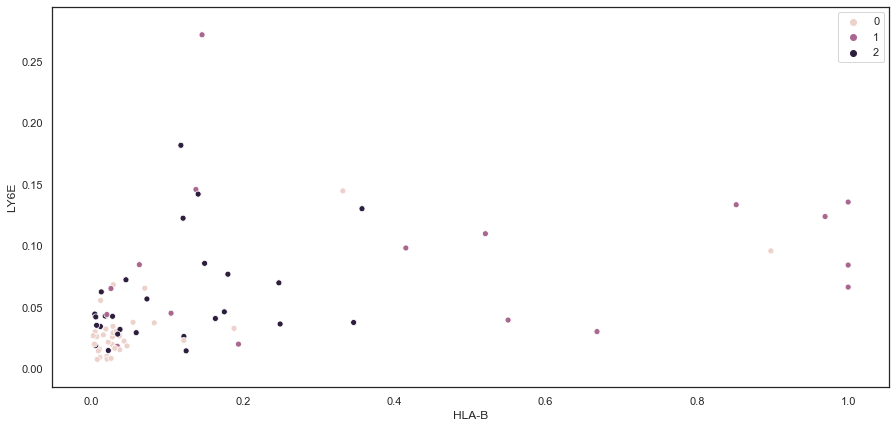

In [71]:
sns.scatterplot(gene_expression.loc[:,"HLA-B"],gene_expression.loc[:,"LY6E"],hue= [0 if p in immune_ids[0] else 1 if p in immune_ids[1] else 2 for p in list(gene_expression.index)])

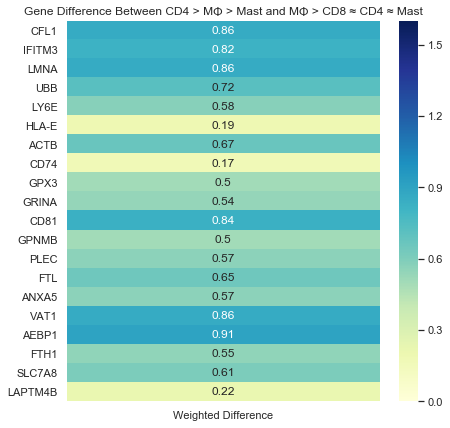

In [72]:
sns.set(rc={'figure.figsize':(7,7)}) #'CD4 > MΦ > Mast','MΦ > CD8 ≈ CD4 ≈ Mast',"MΦ > Mast > CD8"
graph_most_significant_gene_differences([immune_ids[0],immune_ids[2]],v_thresh=.001,num_top_genes=20,vmax=1.6,title="Gene Difference Between CD4 > MΦ > Mast and MΦ > CD8 ≈ CD4 ≈ Mast")

### All Patient Analysis

In [73]:
for c in combinations(list(patient_dict[list(patient_dict.keys())[0]].keys()),2):
    if c[0] != c[1]:
        x = []
        y = []
        for p in list(patient_dict.keys()):
             if not np.isnan(patient_dict[p][c[0]]) and not np.isnan(patient_dict[p][c[1]]):
                x.append(patient_dict[p][c[0]])
                y.append(patient_dict[p][c[1]])
        x = np.asarray(x)

        r, p = stats.pearsonr(x,y)
        if p < .05:
            print(c[0], " and ",c[1],": ", r, p)

BAP1_mutation  and  DSS_time :  0.2278673159062442 0.04206686149449625
BAP1_mutation  and  os_status :  0.48254014916570404 5.821534157653444e-06
BAP1_mutation  and  PFI_time :  0.3280670066872163 0.003161316359880518
BAP1_mutation  and  stage :  -0.32748887033017876 0.003024047330719037
BAP1_mutation  and  T :  -0.24799284109888797 0.028584292076066792
DSS_time  and  PFI_time :  0.8894680407258508 6.608004992932464e-28
DSS_time  and  age :  -0.23427182759731735 0.03647293153696037
os_status  and  PFI_time :  0.23852873885055376 0.034263493321814
os_status  and  stage :  -0.31182064265256193 0.004867393663632169
os_status  and  T :  -0.28931045076099376 0.010197462940063969
tumor_diameter  and  tumor_thickness :  0.45275554230325904 2.7963334543461177e-05
tumor_diameter  and  stage :  0.5659655811353972 5.4614013170540326e-08
tumor_diameter  and  T :  0.7089336820437722 3.79665342679481e-13
weight  and  stage :  0.37880537980427065 0.005157126759566066
weight  and  N :  0.5869873920972

In [74]:
gender_grouped_ids = [[],[]]
for p in list(patient_dict.keys()):
    if patient_dict[p]['gender'] == 0:
        gender_grouped_ids[0].append(p)
    else:
        gender_grouped_ids[1].append(p)

In [75]:
print_significant_immune_differences(immune_fractions_df,gender_grouped_ids)

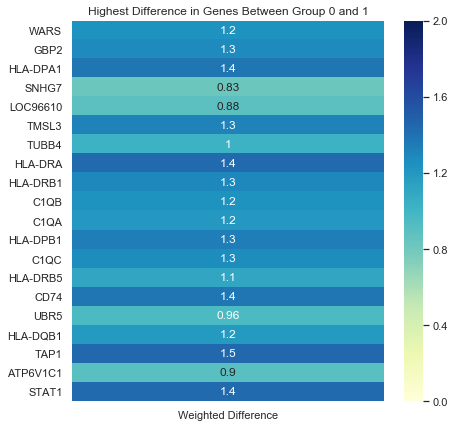

In [76]:
graph_most_significant_gene_differences([immune_ids[1],immune_ids[2]],v_thresh=.0001,num_top_genes=20,title="Highest Difference in Genes Between Group 0 and 1",vmax=2)

In [77]:
print_significant_phenotype_differences(gender_grouped_ids)

weight  difference between groups  0   1  p-value:  0.02619959123463816
tumor_thickness  difference between groups  0   1  p-value:  0.030324889542422684
gender  difference between groups  0   1  p-value:  3.2672101244356916e-19


In [78]:
print_most_significant_gene_differences(gender_grouped_ids,v_thresh=.0001)

[('XIST', -0.007711473018889937, -0.0017001446765932257, 6.622131898674535e-15), ('RPS4Y1', 0.017243699040449367, 0.010051381589249668, 9.801099991178442e-15), ('HLA-DRB5', 0.0005779388108176093, 0.000625728356279729, 0.04391578182399646)]


[('XIST',
  -0.007711473018889937,
  -0.0017001446765932257,
  6.622131898674535e-15),
 ('RPS4Y1', 0.017243699040449367, 0.010051381589249668, 9.801099991178442e-15),
 ('HLA-DRB5',
  0.0005779388108176093,
  0.000625728356279729,
  0.04391578182399646)]

### Find Genes Highly Correlated with Immune Fraction

In [79]:
l = []
grp = list(gene_expression.index)
for gene_name in list(most_variant.columns):
    for i in ['CD4 T cells']: #immune_fractions_df.columns:
        r, p = stats.pearsonr(immune_fractions_df.loc[grp,i],gene_expression.loc[grp,gene_name])
        
        if p < .05:
            l.append((gene_name,i,r,p))
            #print("|",gene_name,"|",i,"|",r,"|",p,"|")
            
l = sorted(l, key=lambda g: g[3], reverse=False)
print(l[:20])

[('FTL', 'CD4 T cells', -0.480203139045445, 6.554755780932701e-06), ('PFN1', 'CD4 T cells', -0.4449295492271925, 3.5483662502820363e-05), ('IFITM3', 'CD4 T cells', -0.4435056052774686, 3.784180769807233e-05), ('TMSB10', 'CD4 T cells', -0.4299742884672185, 6.876923155235688e-05), ('ARHGDIA', 'CD4 T cells', -0.42460033694526766, 8.657969441608614e-05), ('GPR143', 'CD4 T cells', -0.3975209420779078, 0.0002609567896315819), ('UBB', 'CD4 T cells', -0.39581252194917615, 0.00027890220474072983), ('ACTB', 'CD4 T cells', -0.38788954478443805, 0.00037790636293955223), ('LGALS3BP', 'CD4 T cells', -0.3864320823876205, 0.00039929686985963896), ('PPIB', 'CD4 T cells', -0.38228508319178767, 0.0004663720324348679), ('VAT1', 'CD4 T cells', -0.3809607333703606, 0.0004898717054551357), ('CYGB', 'CD4 T cells', -0.37895516105504523, 0.0005275259474655609), ('CFL1', 'CD4 T cells', -0.3784374742745147, 0.0005376656228126065), ('TMSL3', 'CD4 T cells', -0.3751160622328159, 0.0006070703664606377), ('ANXA2', 'CD

In [80]:
l2 = []
for c in combinations([i[0] for i in l[:20]],2):
    r, p = stats.pearsonr(gene_expression.loc[:,c[0]],gene_expression.loc[:,c[1]])
    l2.append((c[0],c[1],r,p))
l2 = sorted(l2, key=lambda g: g[3], reverse=False)
print(l2[:4])

[('PFN1', 'UBB', 0.9226278707044171, 5.190892952289626e-34), ('ACTB', 'ARF1', 0.9219485786906516, 7.204796884488747e-34), ('ACTB', 'CFL1', 0.9174137256746249, 5.973715411529587e-33), ('PFN1', 'ACTB', 0.9111989600883383, 8.974678085158305e-32)]


In [81]:
l = []
for gene_name in list(most_variant.columns):
    for i in ['tumor_thickness']:#list(patient_dict[list(patient_dict.keys())[0]].keys())[1:]: # list(patient_dict[list(patient_dict.keys())[0]].keys())[1:]
        inc = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p][i])] 
        r, p = stats.pearsonr([patient_dict[p][i] for p in inc],gene_expression.loc[inc,gene_name])
        
        if p < .05:
            l.append((gene_name,i,r,p))
            #print("|",gene_name,"|",i,"|",r,"|",p,"|")
            
l = sorted(l, key=lambda g: g[3], reverse=False)
print(l[:10])

[('IFITM3', 'tumor_thickness', 0.2829883280404505, 0.010974506759716073), ('GANAB', 'tumor_thickness', 0.2709887024457943, 0.015043522077346883), ('SILV', 'tumor_thickness', -0.2609491210902712, 0.01939089014187478), ('FKBP10', 'tumor_thickness', 0.2591041828170237, 0.02029712328646652), ('EEF1A2', 'tumor_thickness', 0.2535453958112336, 0.023249729543458445), ('TBC1D16', 'tumor_thickness', 0.2519075241927781, 0.024186544357296474), ('ENO1', 'tumor_thickness', 0.24222454642617636, 0.030405081423767456), ('LGALS3BP', 'tumor_thickness', 0.22942565308421298, 0.040644129378973146), ('TPP1', 'tumor_thickness', 0.22590110681246642, 0.043920694471525454)]


In [82]:
subsection = [p for p in bap1_cd8_grps[1] if not np.isnan(patient_dict[p]['tumor_diameter'])]#list(gene_expression.index)# list(gene_expression.index)   # immune_ids[1] 
#subsection =subsection.extend(bap1_cd8_grps[1])
sns.scatterplot(gene_expression.loc[subsection,"HLA-B"], gene_expression.loc[subsection,"BAT3"])
print(stats.pearsonr(gene_expression.loc[subsection,"HLA-B"], gene_expression.loc[subsection,"BAT3"]))
subsection = [p for p in bap1_cd8_grps[3] if not np.isnan(patient_dict[p]['tumor_diameter'])]#list(gene_expression.index)# list(gene_expression.index)   # immune_ids[1] 
#subsection =subsection.extend(bap1_cd8_grps[1])
sns.scatterplot(gene_expression.loc[subsection,"HLA-B"], gene_expression.loc[subsection,"BAT3"])
print(stats.pearsonr(gene_expression.loc[subsection,"HLA-B"], gene_expression.loc[subsection,"BAT3"]))

NameError: name 'bap1_cd8_grps' is not defined

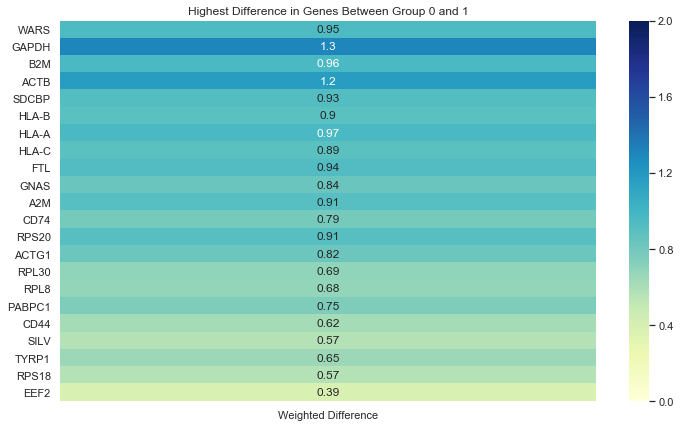

In [414]:
graph_most_significant_gene_differences(bap1_grouped_ids,num_top_genes=50,title="Highest Difference in Genes Between Group 0 and 1",vmax=2)

### Immune Clustering

In [ ]:
immune_dataframes = cluster_gene_variance(immune_fractions_df,variance_threshold=.0000001,pca_components=5,n_clusters=3)
immune_ids = [list(immune_dataframes[i].index) for i in range(len(immune_dataframes))]

In [83]:
print("Percentage of total BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/44 for i in range(len(immune_ids))])
print("Percentage of total BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/36 for i in range(len(immune_ids))])
print("Percentage of BAP1 -1 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == -1])/len(immune_ids[i]) for i in range(len(immune_ids))])
print("Percentage of BAP1 0 by cluster: ",[sum([1 for p in immune_ids[i] if patient_dict[p]['BAP1_mutation'] == 0])/len(immune_ids[i]) for i in range(len(immune_ids))])

Percentage of total BAP1 -1 by cluster:  [0.2727272727272727, 0.36363636363636365, 0.36363636363636365]
Percentage of total BAP1 0 by cluster:  [0.6388888888888888, 0.027777777777777776, 0.3333333333333333]
Percentage of BAP1 -1 by cluster:  [0.34285714285714286, 0.9411764705882353, 0.5714285714285714]
Percentage of BAP1 0 by cluster:  [0.6571428571428571, 0.058823529411764705, 0.42857142857142855]


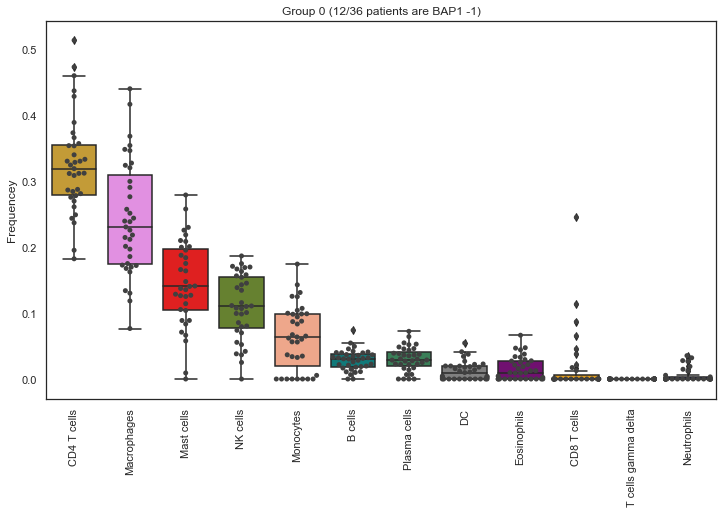

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [84]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[0]], "Group 0 (12/36 patients are BAP1 -1)")

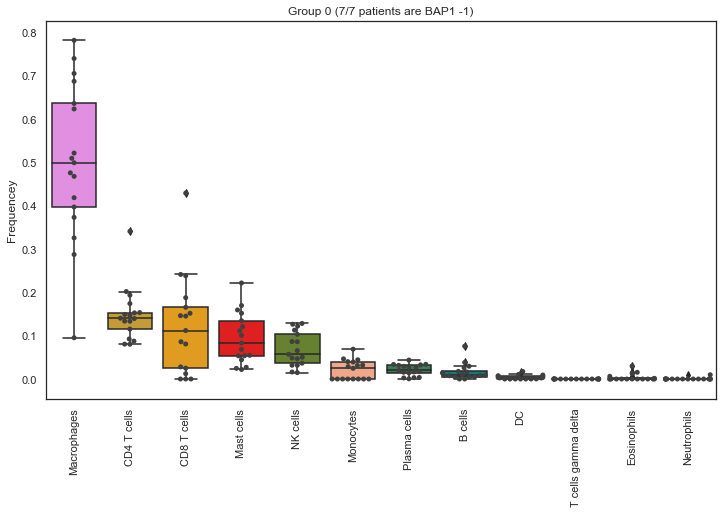

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [85]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[1]], "Group 0 (7/7 patients are BAP1 -1)")

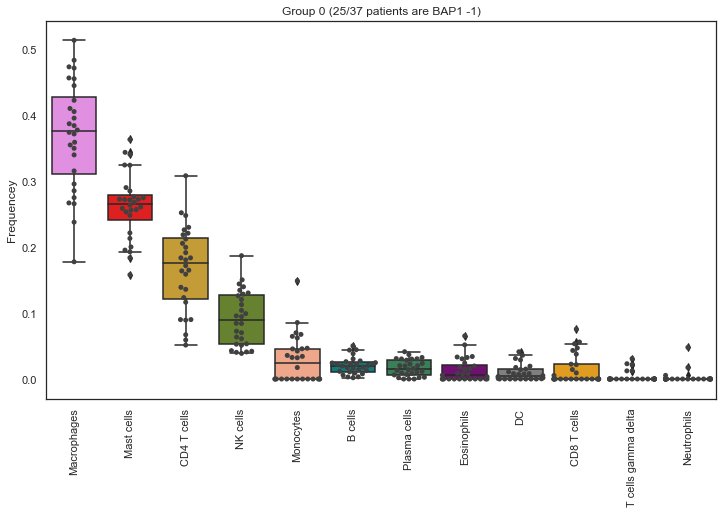

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [86]:
cell_frequency_boxplot(immune_fractions_df_uncombined.loc[immune_ids[2]], "Group 0 (25/37 patients are BAP1 -1)")

In [87]:
print_significant_immune_differences(immune_fractions_df,immune_ids)

Plasma cells  difference between groups  0   1  p-value:  0.03954250661782937
Plasma cells  difference between groups  0   2  p-value:  0.00232330104850755
CD8 T cells  difference between groups  0   1  p-value:  1.434171545762025e-05
CD8 T cells  difference between groups  1   2  p-value:  5.3892128594505404e-05
T cells gamma delta  difference between groups  0   2  p-value:  0.005126308160724938
T cells gamma delta  difference between groups  1   2  p-value:  0.03578269065526277
Monocytes  difference between groups  0   1  p-value:  0.0009415759965235146
Monocytes  difference between groups  0   2  p-value:  0.0018865822922472211
Eosinophils  difference between groups  0   1  p-value:  0.0035624234758239014
Eosinophils  difference between groups  1   2  p-value:  0.01800924953133214
Neutrophils  difference between groups  0   1  p-value:  0.02972378116793345
Neutrophils  difference between groups  0   2  p-value:  0.04821129973407405
B cells  difference between groups  0   1  p-value

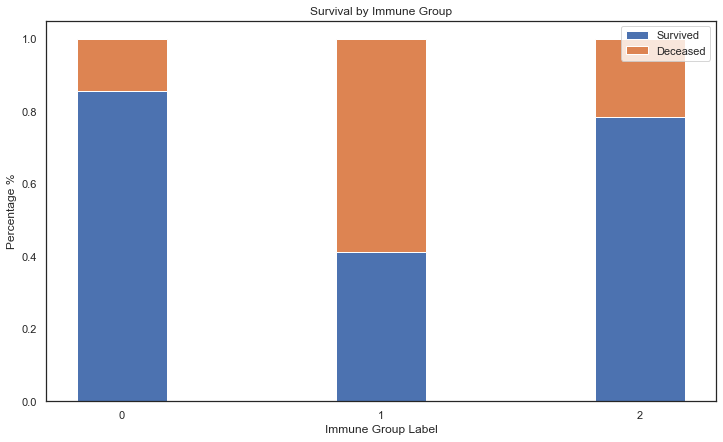

0 1 (3.325389884171072, 0.0008829496996181239)
0 2 (0.7420911673772301, 0.45803210097102054)
1 2 (-2.5407608716706225, 0.011061154229036864)


In [88]:
N = 3
living_group= [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 1])/len(immune_ids[i]) for  i in range(N)]
dead_group = [sum([1 for p in immune_ids[i] if patient_dict[p]['os_status'] == 0])/len(immune_ids[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Immune Group Label')
plt.title('Survival by Immune Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()

for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in immune_ids[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in immune_ids[c[1]] if patient_dict[p]['os_status'] == 1])],[len(immune_ids[c[0]]),len(immune_ids[c[1]])]))

In [89]:
sum([1 for p in bap1_grouped_ids[1] if patient_dict[p]['os_status'] == 0])/len(bap1_grouped_ids[1])

0.45454545454545453

In [90]:
def plot_important_immune_cells(groups,labels):
    #labels = ['CD4 ≈ CD8 < M','CD8 < M < CD4','CD4 < CD8 ≈ M','CD8 < CD4 < M']
    cells = ["Macrophages","CD4 T cells",'Mast cells',"CD8 T cells","B cells",'Plasma cells']
    all_means = [[np.mean(immune_fractions_df.loc[groups[i], c]) for i in range(len(groups))] for c in cells]
    all_errors = [[np.std(immune_fractions_df.loc[groups[i], c]) for i in range(len(groups))] for c in cells]

    x = np.arange(len(labels))  # the label locations
    width = 0.9  # the width of the bars

    fig, ax = plt.subplots()
    for i in range(len(cells)):
        ax.bar(x - ((i)-(len(cells)-1)/2)*width/len(cells), all_means[i], width/len(cells), label=cells[i],yerr=all_errors[i])


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency')
    ax.set_title('Immune Cell Fractions By Immune Cluster')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

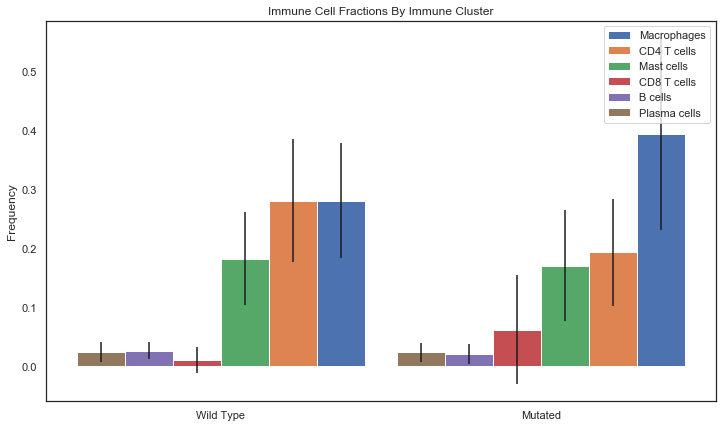

In [91]:
plot_important_immune_cells(bap1_grouped_ids,["Wild Type", "Mutated"])

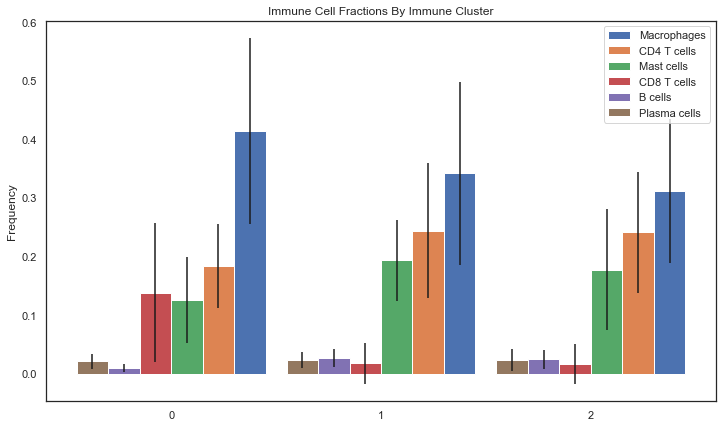

In [92]:
plot_important_immune_cells(grouped_ids,["0", "1","2"])

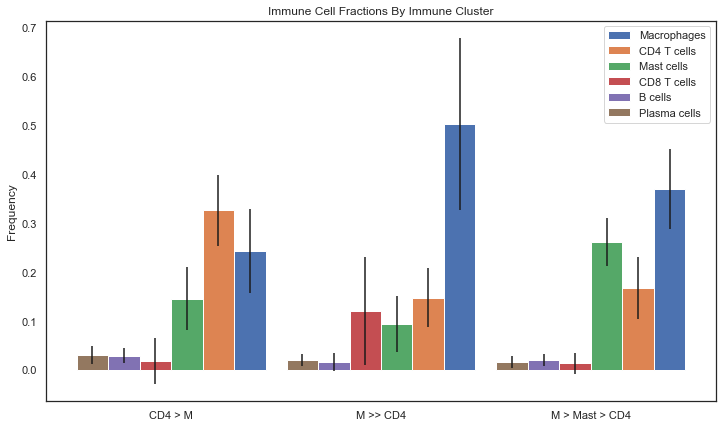

In [93]:
plot_important_immune_cells(immune_ids,["CD4 > M", "M >> CD4","M > Mast > CD4"])

In [94]:
def percent_in_group(group,groups):
    l = [0 for i in range(len(groups))]
    for p in group:
        for i in range(len(groups)):
            if p in groups[i]:
                l[i] += 1
    print([l[i] for i in range(len(l))])

In [95]:
percent_in_group(immune_ids[0],grouped_ids)
percent_in_group(immune_ids[1],grouped_ids)
percent_in_group(immune_ids[2],grouped_ids)

[2, 17, 16]
[10, 4, 3]
[2, 13, 13]


In [96]:
percent_in_group(grouped_ids[0],immune_ids)
percent_in_group(grouped_ids[1],immune_ids)
percent_in_group(grouped_ids[2],immune_ids)

[2, 10, 2]
[17, 4, 13]
[16, 3, 13]


### Causal Analysis

In [325]:
from causality.estimation.nonparametric import CausalEffect
# load the data into a dataframe:
p = [p for p in list(gene_expression.index) if not np.isnan(patient_dict[p]['DSS_time'])]
causal_dict = {}
#causal_dict['HLA-B'] = gene_expression.loc[p,"HLA-B"]
#causal_dict['HLA-A'] = gene_expression.loc[p,"HLA-A"]
#causal_dict['HLA-C'] = gene_expression.loc[p,"HLA-C"]
#causal_dict['CD74'] = gene_expression.loc[p,"CD74"]
#causal_dict['B2M'] = gene_expression.loc[p,"B2M"]
#causal_dict['BAP1'] = gene_expression.loc[p,"BAP1"]
#causal_dict['HLA-DRA'] = gene_expression.loc[p,"HLA-DRA"]
#causal_dict['HLA-E'] = gene_expression.loc[p,"HLA-E"]
#causal_dict['STAT1'] = gene_expression.loc[p,"STAT1"]
#causal_dict['TAP1'] = gene_expression.loc[p,"TAP1"]
#causal_dict['TTYH3'] = gene_expression.loc[p,"TTYH3"]
#causal_dict['Mast cells'] = immune_fractions_df.loc[p,"Mast cells"]
causal_dict['CD8 T cells'] = immune_fractions_df.loc[p,"CD8 T cells"]
causal_dict['CD4 T cells'] = immune_fractions_df.loc[p,"CD4 T cells"]
#causal_dict['Macrophages'] = immune_fractions_df.loc[p,"Macrophages"]
#causal_dict['PCDHGC3'] = gene_expression.loc[p,"PCDHGC3"]
causal_dict['BAP1'] = [0 if patient_dict[i]["BAP1_mutation"] == 0 else -1 for i in p]
#causal_dict['DSS_time'] = 
kmf = KaplanMeierFitter() 
kmf.fit([patient_dict[i]['DSS_time'] for i in p], [1 if patient_dict[i]["os_status"] == 0 else 0 for i in p])
causal_dict['Mortality Rate'] = kmf.survival_function_at_times([patient_dict[i]['DSS_time'] for i in p]).values


X = pd.DataFrame(causal_dict)

# define the variable types: 'c' is 'continuous'. The variables defined here
# are the ones the search is performed over -- NOT all the variables defined
# in the data frame.
variable_types = {'CD8 T cells':'c','CD4 T cells':'c','Mortality Rate':'c'}
#  'HLA-A' : 'c', 'HLA-C' : 'c', 'CD74' : 'c', 'B2M' : 'c','STAT1':'c', 'HLA-E' : 'c','HLA-DRA':'c', 'HLA-B' : 'c','CD8 T cells': 'c', 'Mortality Rate' : 'd'
# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)

In [326]:
graph.edges(data=True)

EdgeDataView([('CD8 T cells', 'Mortality Rate', {'marked': False, 'arrows': []}), ('CD4 T cells', 'Mortality Rate', {'marked': False, 'arrows': []})])

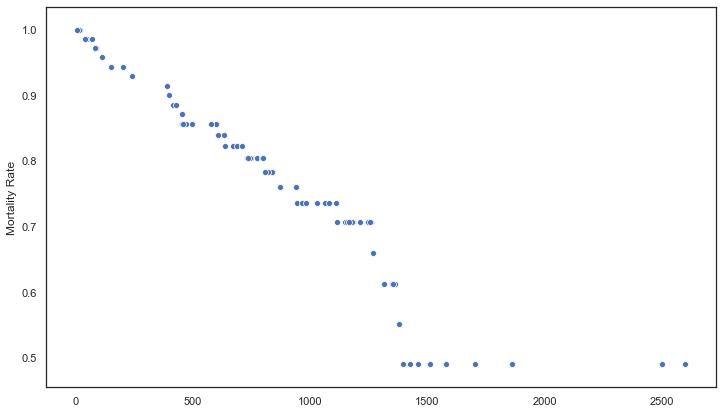

In [327]:
sns.scatterplot([patient_dict[i]['DSS_time'] for i in p],X['Mortality Rate'])

### Try to Find High Correlation Avenues

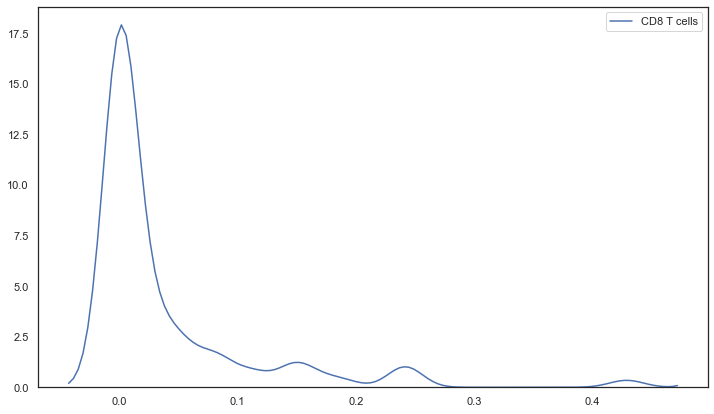

In [99]:
sns.kdeplot(immune_fractions_df.loc[:,"CD8 T cells"])

### Immune cell and BAP1 mutation conditional tests on mortality rate

In [100]:
cell = "B cells"
cd8_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
print(cd8_split)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cd8_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cd8_split]
bap11_and_cd8_high = [p for p in higher_cd8 if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

0.03246046783488349
0.18181818181818182 11
0.5454545454545454 33
0.0 9
0.037037037037037035 27


In [101]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.03593893057402259
0 2 0.17752985241215347
0 3 0.13334958351355689
1 2 0.003378453060406756
1 3 2.53360059274592e-05
2 3 0.5581846494226574


### Immune call conditional Tests on mortlaity rate

In [102]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.25) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

0.15384615384615385 13
1.0 7
0.19148936170212766 47
0.23076923076923078 13


In [103]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.000285623864453138
0 2 0.7562205107260063
0 3 0.6187565913004272
1 2 1.2397576264796144e-05
1 3 0.0010320139151629955
2 3 0.7540008879177454


### Immune cell tests on DSS_time

In [104]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['DSS_time'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

411.0 4
544.375 16
820.4375 16
945.5681818181819 44


In [105]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['DSS_time'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['DSS_time'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.2392604882720989
0 2 0.07151335763599936
0 3 0.041405256989182584
1 2 0.043186753517177684
1 3 0.007163317317048261
2 3 0.3472196414918941


In [106]:
cell = "CD4 T cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['PFI_time'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

233.5 2
nan 18
885.9444444444445 18
767.9761904761905 42


In [107]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['PFI_time'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['PFI_time'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.3763920663249235
0 2 0.04448650585090667
0 3 0.09749655291390957
1 2 0.016355791764910223
1 3 0.033558979871200906
2 3 0.2567721184992868


### Immune cell tests on tumor thickness

In [108]:
cell = "Mast cells"
cell2 ="Macrophages"
cell1_split = np.quantile(immune_fractions_df.loc[:,cell],.75) 
cell2_split = np.quantile(immune_fractions_df.loc[:,cell2],.75)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, cell] < cell1_split]
bap11_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap11_and_cd8_high]),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] > cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap11_and_cd8_low]),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap10_and_cd8_high]),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_cd8 if immune_fractions_df.loc[p, cell2] < cell2_split]
print(np.mean([patient_dict[p]['tumor_thickness'] for p in bap10_and_cd8_low]),len(bap10_and_cd8_low))

11.475 4
10.6375 16
10.875 16
10.08159090909091 44


In [109]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = [patient_dict[p]['tumor_thickness'] for p in bap1_cd8_grps[c[0]]]
    f2 = [patient_dict[p]['tumor_thickness'] for p in bap1_cd8_grps[c[1]]]
    z,p = mannwhitneyu(f1,f2)
    print(c[0],c[1],p)

0 1 0.4622176356093006
0 2 0.3878722570734663
0 3 0.17507855001361927
1 2 0.4773629259832669
1 3 0.2760770298441565
2 3 0.17626182593835116


In [110]:
cell1_split = np.quantile(immune_fractions_df.loc[:,"CD8 T cells"],.6) 
print(cell1_split)
higher_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, "CD8 T cells"] > cell1_split]
lower_cd8 = [p for p in list(immune_fractions_df.index) if immune_fractions_df.loc[p, "CD8 T cells"] < cell1_split]
print(sum([1 for p in higher_cd8 if patient_dict[p]['os_status'] == 0])/len(higher_cd8),len(higher_cd8))
print(sum([1 for p in lower_cd8 if patient_dict[p]['os_status'] == 0])/len(lower_cd8),len(lower_cd8))

0.010504558683694137
0.40625 32
0.16666666666666666 48


In [111]:
f1 = sum([1 for p in higher_cd8 if patient_dict[p]['os_status'] == 0])
f2 = sum([1 for p in lower_cd8 if patient_dict[p]['os_status'] == 0])
proportions_ztest([f1,f2],[len(higher_cd8),len(lower_cd8)])

(2.385951169009662, 0.01703501280047854)

### Differences in mortality rate between high and low size tumors

NameError: name 'notnan' is not defined

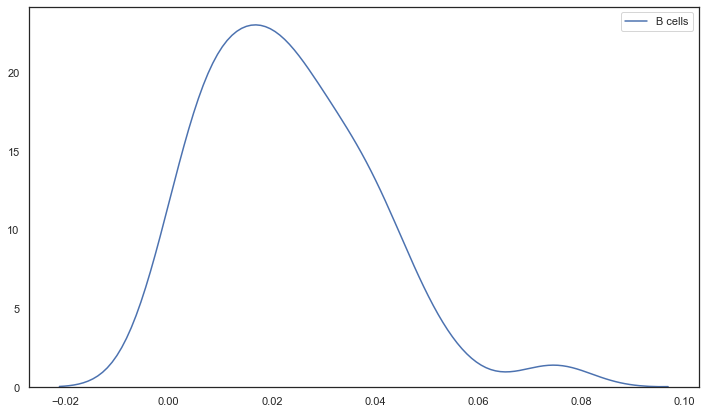

In [112]:
#sns.kdeplot([patient_dict[p]['tumor_thickness'] for p in notnan if patient_dict[p]['os_status'] == 0])
#sns.kdeplot([patient_dict[p]['tumor_thickness'] for p in notnan if patient_dict[p]['os_status'] == 1])
sns.kdeplot(immune_fractions_df.loc[:,"B cells"])
print(np.mean([patient_dict[p]['tumor_diameter'] for p in notnan if patient_dict[p]['os_status'] == 0]),np.std([patient_dict[p]['tumor_diameter'] for p in notnan if patient_dict[p]['os_status'] == 0]))

In [ ]:
notnan = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p]['tumor_thickness'])]
rad_split = np.quantile([patient_dict[p]['tumor_thickness'] for p in notnan],.75) 
print(rad_split)
higher_size = [p for p in list(immune_fractions_df.index) if patient_dict[p]['tumor_thickness'] > rad_split]
lower_size = [p for p in list(immune_fractions_df.index) if patient_dict[p]['tumor_thickness'] < rad_split]
bap11_and_cd8_high = [p for p in higher_size if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_high),len(bap11_and_cd8_high))
bap11_and_cd8_low = [p for p in lower_size if patient_dict[p]['BAP1_mutation'] == -1]
print(sum([1 for p in bap11_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap11_and_cd8_low),len(bap11_and_cd8_low))
bap10_and_cd8_high = [p for p in higher_size if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_high if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_high),len(bap10_and_cd8_high))
bap10_and_cd8_low = [p for p in lower_size if patient_dict[p]['BAP1_mutation'] == 0]
print(sum([1 for p in bap10_and_cd8_low if patient_dict[p]['os_status'] == 0])/len(bap10_and_cd8_low),len(bap10_and_cd8_low))

In [113]:
bap1_cd8_grps = [bap11_and_cd8_high,bap11_and_cd8_low,bap10_and_cd8_high,bap10_and_cd8_low]
for c in combinations(range(len(bap1_cd8_grps)),2):
    f1 = sum([1 for p in bap1_cd8_grps[c[0]] if patient_dict[p]['os_status'] == 0])
    f2 = sum([1 for p in bap1_cd8_grps[c[1]] if patient_dict[p]['os_status'] == 0])
    z,p = proportions_ztest([f1,f2],[len(bap1_cd8_grps[c[0]]),len(bap1_cd8_grps[c[1]])])
    print(c[0],c[1],p)

0 1 0.8221867672380183
0 2 0.19670560245894686
0 3 0.1782771654317089
1 2 0.12712442894245324
1 3 0.07115951417335281
2 3 0.8839462143248636


In [114]:
print_significant_immune_differences(immune_fractions_df,bap1_cd8_grps)

Plasma cells  difference between groups  1   3  p-value:  0.0005100392864026875
Plasma cells  difference between groups  2   3  p-value:  0.004430521517462644
CD8 T cells  difference between groups  1   2  p-value:  0.008734618890125985
CD8 T cells  difference between groups  1   3  p-value:  0.04283184152690466
T cells gamma delta  difference between groups  0   3  p-value:  0.000595040191727383
T cells gamma delta  difference between groups  1   3  p-value:  0.00969040760377443
T cells gamma delta  difference between groups  2   3  p-value:  0.00969040760377443
Monocytes  difference between groups  0   3  p-value:  0.03161358952721859
Monocytes  difference between groups  1   3  p-value:  0.00015848848245468927
Monocytes  difference between groups  2   3  p-value:  0.0008722956362582565
Eosinophils  difference between groups  0   2  p-value:  0.016589252624109253
Eosinophils  difference between groups  0   3  p-value:  0.015804861190533585
Eosinophils  difference between groups  1   

In [115]:
comp =  [bap1_cd8_grps[0],bap1_cd8_grps[1]]
t = print_most_significant_gene_differences(comp,v_thresh=.0001,num_top_genes=20)

[('APOC1', -0.01798405909480936, -0.01950743312941143, 0.0046815238187669726), ('P2RX7', -0.00992875977051726, -0.006004684889863486, 0.01319102342169012), ('GPM6B', -0.02320481447110112, -0.018106542248227046, 0.01674954156920702), ('KIAA1429', -0.010344327900154349, -0.0054029484972030325, 0.021099158310159762), ('UBA52', 0.02610338452569541, 0.012554324547237206, 0.021099158310159762), ('RPL13', 0.17873954375619952, 0.036090021242633386, 0.021099158310159762), ('MAL', 0.020408387877978683, 0.017447330157057676, 0.021099158310159762), ('WSB1', -0.015771027079292888, -0.00940888022702982, 0.021099158310159762), ('IARS', -0.010279700859099877, -0.005894744349429834, 0.02636852045955917), ('PTK2', -0.018943805147607483, -0.010301528109316196, 0.02636852045955917), ('RPL18A', 0.012962366755123376, 0.013699769289008588, 0.02636852045955917), ('HSPB1', 0.015360142045323433, 0.02118984053249985, 0.02636852045955917), ('UBR5', -0.023104004036920547, -0.012056493560614823, 0.02636852045955917

In [116]:
comp =  [bap1_cd8_grps[2],bap1_cd8_grps[3]]
t = print_most_significant_gene_differences(comp,v_thresh=.0001,num_top_genes=20)

[('HSPB1', 0.02464290841900372, 0.016163569919169847, 0.0008135154177255475), ('PRAME', 0.011062869983012216, 0.009321406703303892, 0.0017648454956617338), ('TPP1', 0.016967508310544485, 0.014935016776582016, 0.007503351024528332), ('ITPKB', 0.012719239263812888, 0.016545028267741166, 0.009006465821517175), ('CRYAB', 0.022738191563218366, 0.007729384440097343, 0.009006465821517175), ('LAMB2', 0.007432295371670849, 0.005381771796736764, 0.011251436365153286), ('CSRP1', 0.010500291524597843, 0.004480321053083151, 0.011251436365153286), ('TUBB4', 0.014948852559522115, 0.010576719068887776, 0.015203151282176534), ('AP2M1', 0.006422491086422913, 0.007599830974481858, 0.015855261630134045), ('HSPA1A', 0.01021426179948317, 0.013404974580904346, 0.015855261630134045), ('LGI3', 0.009529700434300691, 0.011347194251851274, 0.01723167928330702), ('GRINA', 0.01619749191816642, 0.014253514051750078, 0.01870891762241129), ('PLTP', 0.015920695238035132, 0.01290198413366607, 0.02029259067201552), ('SOR

In [117]:
t = print_most_significant_gene_differences(bap1_grouped_ids,v_thresh=.05,num_top_genes=20)

[('GAPDH', -0.29523001701927043, -0.2828211008132814, 9.244757457729609e-10), ('HLA-B', -0.23426687734168045, -0.10941266125821619, 8.600736417301874e-08), ('HLA-A', -0.23228257748074205, -0.16796629965207155, 6.169632324728207e-07), ('RPL8', -0.16054575172464958, -0.20830480959041953, 0.0006504308258421594), ('TYRP1', -0.1739461477704835, -0.08833552170516643, 0.0062095397733834155), ('EEF2', -0.09198940855935445, -0.09834684810443273, 0.046206909125838073)]


In [118]:
print("EIF1AX" in gene_expression.columns)

True


In [119]:
gene_name = "DPP7"
grp = bap1_cd8_grps[2]
for i in immune_fractions_df.columns: #immune_fractions_df.columns:
        r, p = stats.pearsonr(immune_fractions_df.loc[grp,i],gene_expression.loc[grp,gene_name])
        
       # if p < .1:
        print("|",gene_name,"|",i,"|",r,"|",p,"|")

| DPP7 | Plasma cells | 0.2594573268245118 | 0.3318475037520064 |
| DPP7 | CD8 T cells | 0.5114697894455581 | 0.042863460840156666 |
| DPP7 | T cells gamma delta | -0.06693265167058587 | 0.8054591181616304 |
| DPP7 | Monocytes | 0.29979614582264735 | 0.25927607660641633 |
| DPP7 | Eosinophils | -0.11905944056979184 | 0.6605352544179924 |
| DPP7 | Neutrophils | 0.3414081905945678 | 0.19560939172909148 |
| DPP7 | B cells | -0.19885175222049686 | 0.46032752009829264 |
| DPP7 | CD4 T cells | -0.25938403679041 | 0.33198900318561786 |
| DPP7 | NK cells | 0.06713174906681249 | 0.8048908072039582 |
| DPP7 | Macrophages | -0.0853309296545468 | 0.7533617433453822 |
| DPP7 | Mast cells | 0.29403356955150584 | 0.26898985331969616 |
| DPP7 | DC | -0.34337677749232287 | 0.19287734603173026 |


In [120]:
l = []
for c in combinations(immune_fractions_df.columns,2):
    x = []
    y = []
    for p in bap1_cd8_grps[3]:#bap1_grouped_ids[0]:#list(patient_dict.keys()): ##
        #if not np.isnan(patient_dict[p][k]):
        x.append(immune_fractions_df.loc[p,c[0]])
        y.append(immune_fractions_df.loc[p,c[1]])
    x = np.asarray(x)

    r, p = stats.pearsonr(x,y)
    if p < .05:
        l.append((c[0],c[1], r, p))
        #print(immune_fractions_df.columns[i], " and ",k,": ", r, p)
l = sorted(l,key= lambda g: g[3], reverse=False)
print(l)
for o in l[:6]:
    print(o[0],"vs.",o[1],"&",o[2],"&",o[3])

[('CD8 T cells', 'CD4 T cells', -0.506024141413948, 0.00045782774343041066), ('Eosinophils', 'NK cells', 0.4395881417390455, 0.00283038442384059), ('Monocytes', 'Eosinophils', 0.4117723004552556, 0.005483970936878826), ('Monocytes', 'Macrophages', -0.4084337181273221, 0.005915636271132434), ('CD4 T cells', 'Macrophages', -0.3782173853030914, 0.011360916719660396), ('Monocytes', 'NK cells', 0.37610133643956967, 0.011866448418208572), ('NK cells', 'Macrophages', -0.34598133747021054, 0.02142180782852089), ('Plasma cells', 'Eosinophils', 0.308552513408062, 0.04156947438241365), ('B cells', 'DC', 0.3074341534725235, 0.042352688711144414), ('NK cells', 'Mast cells', -0.29985079670055725, 0.04798631374770377)]
CD8 T cells vs. CD4 T cells & -0.506024141413948 & 0.00045782774343041066
Eosinophils vs. NK cells & 0.4395881417390455 & 0.00283038442384059
Monocytes vs. Eosinophils & 0.4117723004552556 & 0.005483970936878826
Monocytes vs. Macrophages & -0.4084337181273221 & 0.005915636271132434
CD4

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

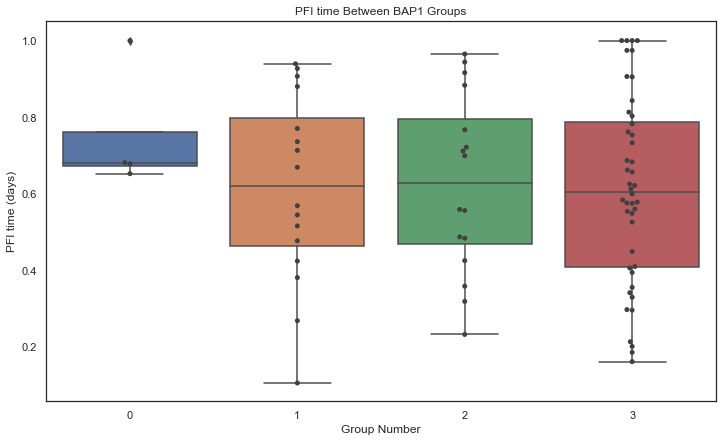

In [121]:
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[0],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[1],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[2],"CD8 T cells"])
#sns.kdeplot(immune_fractions_df.loc[bap1_cd8_grps[3],"CD8 T cells"])
fix,ax = plt.subplots()
y = [gene_expression.loc[bap1_cd8_grps[i],"EEF2"].values for i in range(4)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group Number")
#plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'PFI time (days)')

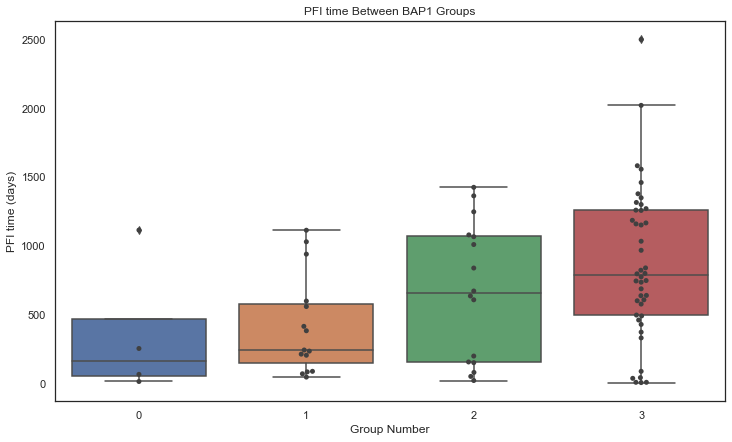

In [122]:
y = [[patient_dict[p]['PFI_time'] for p in bap1_cd8_grps[i]] for i in range(4)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("PFI time Between BAP1 Groups")
plt.xlabel("Group Number")
#plt.xticks([0, 1], ['Wild Type', "Mutated"])
plt.ylabel("PFI time (days)")

In [123]:
print_significant_phenotype_differences(bap1_cd8_grps)

DSS_time  difference between groups  0   3  p-value:  0.041405256989182584
DSS_time  difference between groups  1   2  p-value:  0.043186753517177684
DSS_time  difference between groups  1   3  p-value:  0.007163317317048261
PFI_time  difference between groups  0   3  p-value:  0.04481967548460033
PFI_time  difference between groups  1   3  p-value:  0.009210146175693702
tumor_diameter  difference between groups  0   3  p-value:  0.018203982998968218


In [124]:
print_significant_phenotype_differences([[p for p in list(patient_dict.keys()) if patient_dict[p]['os_status'] == i] for i in [0,1]])

os_status  difference between groups  0   1  p-value:  3.312480150904757e-19
tumor_diameter  difference between groups  0   1  p-value:  0.027623717705030137
tumor_thickness  difference between groups  0   1  p-value:  0.03613983398023606
T  difference between groups  0   1  p-value:  0.0009811369142748603


In [125]:
mort_grouped_ids = [[p for p in list(patient_dict.keys()) if patient_dict[p]['os_status'] == i] for i in [0,1]]
print_significant_immune_differences(immune_fractions_df,mort_grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.0022764822959853016
Monocytes  difference between groups  0   1  p-value:  0.029891791414375885
Eosinophils  difference between groups  0   1  p-value:  0.044262466503300284
B cells  difference between groups  0   1  p-value:  0.003938208370186416
CD4 T cells  difference between groups  0   1  p-value:  0.02783582655768996
NK cells  difference between groups  0   1  p-value:  0.04009588055695323
Macrophages  difference between groups  0   1  p-value:  0.01519007303248467
Mast cells  difference between groups  0   1  p-value:  0.014372424983396814


In [126]:
print(immune_fractions_df.loc[mort_grouped_ids[0],"B cells"].mean(), immune_fractions_df.loc[mort_grouped_ids[0],"B cells"].std())
print(immune_fractions_df.loc[mort_grouped_ids[1],"B cells"].mean(), immune_fractions_df.loc[mort_grouped_ids[1],"B cells"].std())

0.015565856987958284 0.011732003222459495
0.02590809189219251 0.01656417236775733


### Other important mutations

In [127]:
f = []
for gene in presence_df.columns:
    f.append((gene, sum([1 for i in presence_df.loc[:,gene].values if i != 0])))
    
f = sorted(f, key= lambda g:g[1], reverse=True)

In [128]:
print(f[300:350])

[('ODF1', 60), ('KLF10', 60), ('AZIN1', 60), ('ATP6V1C1', 60), ('C8orf56', 60), ('BAALC', 60), ('MIR3151', 60), ('FZD6', 60), ('CTHRC1', 60), ('SLC25A32', 60), ('DCAF13', 60), ('RIMS2', 60), ('snoU13|ENSG00000238687.1', 60), ('DPYS', 60), ('DCSTAMP', 60), ('MIR548A3', 60), ('LRP12', 60), ('ZFPM2', 60), ('OXR1', 60), ('ABRA', 60), ('ANGPT1', 60), ('RNA5SP275', 60), ('RSPO2', 60), ('EIF3E', 60), ('EMC2', 60), ('TMEM74', 60), ('TRHR', 60), ('NUDCD1', 60), ('ENY2', 60), ('PKHD1L1', 60), ('EBAG9', 60), ('SYBU', 60), ('SNORD112|ENSG00000252559.1', 60), ('KCNV1', 60), ('CSMD3', 60), ('snoU13|ENSG00000238656.1', 60), ('MIR2053', 60), ('LINC00534', 59), ('RNA5SP273', 59), ('TMEM64', 59), ('NECAB1', 59), ('TMEM55A', 59), ('OTUD6B', 59), ('LRRC69', 59), ('RN7SL777P', 59), ('MIR4661', 59), ('SLC26A7', 59), ('snoU13|ENSG00000239134.1', 59), ('RN7SKP231', 59), ('RUNX1T1', 59)]


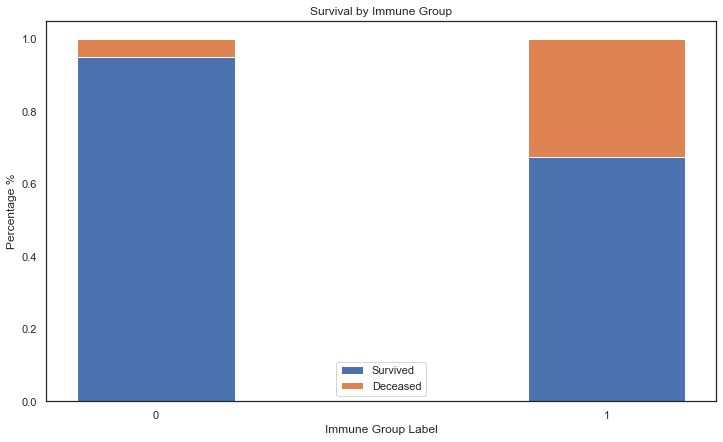

0 1 (2.4185477483032645, 0.015582600305939135)


In [129]:
rnd_grps = [[p for p in list(presence_df.index) if presence_df.loc[p,"GEM"] == i] for i in list(Counter(presence_df.loc[bap1_grouped_ids[1],'SF3B1']).keys())]
N = len(rnd_grps)
living_group= [sum([1 for p in rnd_grps[i] if patient_dict[p]['os_status'] == 1])/len(rnd_grps[i]) for  i in range(N)]
dead_group = [sum([1 for p in rnd_grps[i] if patient_dict[p]['os_status'] == 0])/len(rnd_grps[i]) for  i in range(N)]
v = [living_group,dead_group]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, v[0], width, label='Survived')
plt.bar(ind, v[1], width,
    label='Deceased',bottom=v[0])

plt.ylabel('Percentage %')
plt.xlabel('Immune Group Label')
plt.title('Survival by Immune Group')

plt.xticks(ind, ('0', '1','2'))
plt.legend(loc='best')
plt.show()

for c in combinations(range(N),2):
    print(c[0],c[1],proportions_ztest([sum([1 for p in rnd_grps[c[0]] if patient_dict[p]['os_status'] == 1]),sum([1 for p in rnd_grps[c[1]] if patient_dict[p]['os_status'] == 1])],[len(rnd_grps[c[0]]),len(rnd_grps[c[1]])]))

### Find Genes whos mutations have a high correlation with M

In [130]:
notnan = [p for p in list(patient_dict.keys()) if not np.isnan(patient_dict[p]['M'])]
x = [patient_dict[p]['M'] for p in notnan]
l = []
for g in presence_df.columns:
    r,p = stats.pearsonr(x,[0 if i == 0 else 1 for i in presence_df.loc[notnan,g].values])
    if p < .05:
        l.append((g,r,p))


### Try To Predict The Tumor Thickness

In [131]:
include = [p for p in list(immune_fractions_df.index) if not np.isnan(patient_dict[p]['tumor_thickness'])]
#X= immune_fractions_df.loc[include,:]
X = pd.DataFrame()
X['age'] = [patient_dict[p]['age'] for p in include]
X['age'] = (X['age']-X['age'].min())/(X['age'].max()-X['age'].min())
X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
X['gender'] = [patient_dict[p]['gender'] for p in include]
X['stage'] = [patient_dict[p]['stage'] for p in include]
y= [patient_dict[p]['tumor_thickness'] for p in include]
pca = PCA(n_components=6).fit(gene_expression.loc[include,:])
print(sum(pca.explained_variance_ratio_))
#transformed = pca.transform(gene_expression.loc[include,:])
X['1'] = transformed[:,0]
X['2'] = transformed[:,1]
X['3'] = transformed[:,2]
X['4'] = transformed[:,3]
X['5'] = transformed[:,4]
X['6'] = transformed[:,5]

X['CD8 T cells']= immune_fractions_df.loc[include,'CD8 T cells'].values
X['Macrophages']= immune_fractions_df.loc[include,'Macrophages'].values
X['CD4 T cells']= immune_fractions_df.loc[include,'CD4 T cells'].values
X['Mast cells']= immune_fractions_df.loc[include,'Mast cells'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

0.8000980930524498


NameError: name 'transformed' is not defined

In [ ]:
print(grid.best_estimator_.predict(X_test)[0],y_test[0])
sns.kdeplot(grid.best_estimator_.apply(X_test)[0])
sns.kdeplot([patient_dict[p]['tumor_thickness'] for p in include])
print(np.std([patient_dict[p]['tumor_thickness'] for p in include]))

In [ ]:
#parameters = {'C':[1,10,100],'kernel':['rbf','linear'],'epsilon':[.1,.01,.5],'gamma':['auto','scale']} # SVR
parameters = {'n_estimators':[500], 'min_samples_split':[4,8],'max_features':[2,3,4,5],'criterion':['mse','mae']}
#parameters = {'loss':['huber'],'learning_rate':[.01,.05,.001],'n_estimators':[50,100],"max_depth":[1,2,3],"max_features":['auto','sqrt','log2']}
grid = GridSearchCV(ExtraTreesRegressor(),parameters, cv=10,iid=False)
grid.fit(X_train,y_train)
thickness_pred = grid.predict(X_test)

In [ ]:
print(grid.best_params_)

In [ ]:
srt = [(X.columns[i],grid.best_estimator_.feature_importances_[i]) for i in range(len(grid.best_estimator_.feature_importances_))]
srt = sorted(srt, key=lambda g:g[1],reverse=True)
print(srt)

In [ ]:
def lies_within_ci(est, X_test, y_test,num_std=2):
    bools = []
    for i in range(len(X_test)):
        l = []
        for t in est.estimators_:
            l.append(t.predict([X_test[i]]))
        mean = np.mean(l)
        std = np.std(l)
        if y_test[i] < mean+num_std*std and y_test[i] > mean-num_std*std:
            bools.append(True)
        else:
            bools.append(False)
    return bools

In [ ]:
x = np.linspace(4, 15, 10)
plt.plot(x,x)
sns.scatterplot(y_test,thickness_pred,hue=["In CI" if i else "Not in CI" for i in lies_within_ci(grid.best_estimator_,X_test.values,y_test,num_std=1)])
plt.gca().set_aspect('equal', adjustable='box')
print(grid.best_estimator_.score(X_test,y_test))
print("MSE:",mean_squared_error(thickness_pred,y_test),"MAE:",median_absolute_error(thickness_pred,y_test))

### Predicting mortality Rate

In [ ]:
from sklearn.metrics import accuracy_score
acc = []
for i in range(20):    
    include = [p for p in list(immune_fractions_df.index) if not np.isnan(patient_dict[p]['tumor_thickness'])]
    X = immune_fractions_df.loc[include,:]
    X['age'] = [patient_dict[p]['age'] for p in include]
    X['tumor_thickness'] = [patient_dict[p]['tumor_thickness'] for p in include]
    X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
    transformed = pca.transform(gene_expression.loc[include,:])
    X['1'] = transformed[:,0]
    X['2'] = transformed[:,1]
    X['3'] = transformed[:,2]
    X['4'] = transformed[:,3]
    X['5'] = transformed[:,4]
    X['6'] = transformed[:,5]
    y = [patient_dict[p]['os_status'] for p in include]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
    #parameters1= {'kernel':['linear','rbf'], 'C':[1,10,100],'gamma':['auto','scale']}
    parameters1 = {'n_estimators':[50,100], 'max_depth':[3,4],'class_weight':["balanced","balanced_subsample",None]}
    grid2 = GridSearchCV(RandomForestClassifier(),parameters1,cv=5,iid=False).fit(X_train,y_train)
    #srt = [(X.columns[i],grid2.best_estimator_.feature_importances_[i]) for i in range(len(grid2.best_estimator_.feature_importances_))]
    #srt = sorted(srt, key=lambda g:g[1],reverse=True)
    #print(srt)
    mort_pred = grid2.predict(X_test)
    #print(grid2.best_estimator_.get_params())
    #print(y_test,mort_pred)
    acc.append(accuracy_score(y_test,mort_pred))
    #print(balanced_accuracy_score(y_test,mort_pred))

In [ ]:
print(np.mean(acc),2*np.std(acc)/20**.5)

### Try to predict DSS_time

In [ ]:
avg = []
include = [p for p in list(immune_fractions_df.index) if not np.isnan(patient_dict[p]['DSS_time'])]
#X= immune_fractions_df.loc[include,:]
X = pd.DataFrame()
X['age'] = [patient_dict[p]['age'] for p in include]
X['age'] = (X['age']-X['age'].min())/(X['age'].max()-X['age'].min())
X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
#X['gender'] = [patient_dict[p]['gender'] for p in include]
X['stage'] = [patient_dict[p]['stage'] for p in include]
y= [patient_dict[p]['DSS_time'] for p in include]
pca = PCA(n_components=6).fit(gene_expression.loc[include,:])
transformed = pca.transform(gene_expression.loc[include,:])
X['1'] = transformed[:,0]
X['2'] = transformed[:,1]
#X['3'] = transformed[:,2]
#X['4'] = transformed[:,3]
X['5'] = transformed[:,4]
#X['6'] = transformed[:,5]

X['CD8 T cells']= immune_fractions_df.loc[include,'CD8 T cells'].values
X['Macrophages']= immune_fractions_df.loc[include,'Macrophages'].values
X['CD4 T cells']= immune_fractions_df.loc[include,'CD4 T cells'].values
X['Mast cells']= immune_fractions_df.loc[include,'Mast cells'].values
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
    parameters = {'n_estimators':[200], 'min_samples_split':[4,8],'max_features':[2,3,4],'criterion':['mae'], 'max_depth':[3]}
    #parameters = {'loss':['huber'],'learning_rate':[.01,.05,.001],'n_estimators':[50,100],"max_depth":[1,2,3],"max_features":['auto','sqrt','log2']}
    grid = GridSearchCV(RandomForestRegressor(),parameters, cv=10,iid=False)
    grid.fit(X_train,y_train,sample_weight=[1/(j**2) for j in y_train])
    thickness_pred = grid.predict(X_test)
    avg.append(mean_squared_error(thickness_pred,y_test))
    #print("RMSE:",mean_squared_error(thickness_pred,y_test)**.5,"MAE:",median_absolute_error(thickness_pred,y_test))
print(np.mean(avg))

In [ ]:
parameters = {'n_estimators':[200], 'min_samples_split':[4,8],'max_features':[1,2,3,4],'criterion':['mae'], 'max_depth':[3]}
#parameters = {'loss':['huber'],'learning_rate':[.01,.05,.001],'n_estimators':[50,100],"max_depth":[1,2,3],"max_features":['auto','sqrt','log2']}
grid = GridSearchCV(RandomForestRegressor(),parameters, cv=10,iid=False)
grid.fit(X_train,y_train,sample_weight=[1/(j**2) for j in y_train])
thickness_pred = grid.predict(X_test)

In [ ]:
print(grid.best_params_)
srt = [(X.columns[i],grid.best_estimator_.feature_importances_[i]) for i in range(len(grid.best_estimator_.feature_importances_))]
srt = sorted(srt, key=lambda g:g[1],reverse=True)
print(srt)

In [ ]:
x = np.linspace(4, 1800, 10)
plt.plot(x,x)
sns.scatterplot(y_test,thickness_pred,hue=["In CI" if i else "Not in CI" for i in lies_within_ci(grid.best_estimator_,X_test.values,y_test,num_std=1)])
plt.gca().set_aspect('equal', adjustable='box')
print(grid.best_estimator_.score(X_test,y_test))
print("RMSE:",mean_squared_error(thickness_pred,y_test)**.5,"MAE:",median_absolute_error(thickness_pred,y_test))

### What gene expressions are best at classifying BAP1 mutation

In [ ]:
stuff = []
for i in range(40):
    X = gene_expression
    y = presence_df.loc[gene_expression.index,"BAP1"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
    estimator = DecisionTreeClassifier()
    estimator.fit(X_train,y_train)
    stuff.extend([j for j in list(X.columns[[i for i in estimator.tree_.feature if i != -2]]) if j not in stuff])
print(stuff)

In [ ]:
list(most_variant.columns)

In [ ]:
sns.kdeplot(gene_expression.loc[gender_grouped_ids[0],"GPR143"])
sns.kdeplot(gene_expression.loc[gender_grouped_ids[1],"GPR143"])

In [ ]:
mannwhitneyu(gene_expression.loc[gender_grouped_ids[0],"GPR143"],gene_expression.loc[gender_grouped_ids[1],"GPR143"])

In [ ]:
l = []
for g in gene_expression2.columns:
    if set(gene_expression2.loc[gender_grouped_ids[0],g]) != set(gene_expression2.loc[gender_grouped_ids[1],g]):
        l.append((g, mannwhitneyu(gene_expression2.loc[gender_grouped_ids[0],g],gene_expression2.loc[gender_grouped_ids[1],g])[1]))


In [ ]:
l = sorted(l, key=lambda g:g[1],reverse=False)
print(l[:20])

In [ ]:
print(gender_grouped_ids)

In [ ]:
gene_expression2 = pd.read_csv('C:/Users/NathanGrant/Programs/TripodsREU/data/Xena_data/HiSeqV2.txt',index_col="Hugo_Symbol",delimiter='\t').T

In [ ]:
most_variant.columns

### Gene for leili

In [ ]:
met = [(patient_dict[p]['M'],p) for p in patient_dict.keys()]
metastis_grps = [[],[]]
for m in met:
    if m[0] == 0:
        metastis_grps[0].append(m[1])
    elif m[0] ==1:
        metastis_grps[1].append(m[1])

In [ ]:
Counter([patient_dict[p]['M'] for p in patient_dict.keys()])

In [ ]:
y = [gene_expression.loc[metastis_grps[i],"SLC25A38"].values for i in range(2)]
temp_df = pd.DataFrame(data=y)
sns.swarmplot( data=temp_df.T,color=".25")
sns.boxplot(data=temp_df.T)
plt.title("SLC25A38 Gene Expression Between Patients With and Without Metastasized Tumors")
plt.xlabel("Group")
plt.xticks([0, 1], ['Not Metastasized (73/80), 38/73 BAP1 Mutated', "Metastasized (7/80), 6/7 BAP1 Mutated"])
plt.ylabel("Gene Expression")
plt.text(.75,.01,'MWW p-value: 0.008973', fontsize=20)
print(mannwhitneyu(y[0],y[1]))

In [510]:
f = print_most_significant_gene_differences(bap1_grouped_ids,num_top_genes=100)
[print(i[1]) for i in f]

[('WARS', -0.10121502061106641, -0.04927000549940058, 4.177570599789809e-11), ('GAPDH', -0.29523001701927043, -0.2828211008132814, 9.244757457729609e-10), ('B2M', -0.1702682487089788, -0.11297775363997081, 1.4588272767983259e-08), ('ACTB', -0.16799983072189636, -0.15192851353951953, 1.9211304847366003e-08), ('SDCBP', -0.1353032432544728, -0.0789747929982133, 4.328073459599528e-08), ('HLA-B', -0.23426687734168045, -0.10941266125821619, 8.600736417301874e-08), ('HLA-A', -0.23228257748074205, -0.16796629965207155, 6.169632324728207e-07), ('HLA-C', -0.1383267435050934, -0.07425596484443134, 1.2109112831092635e-06), ('FTL', -0.10888782539418077, -0.14694588812727394, 5.285979134513912e-06), ('GNAS', -0.11336025510332517, -0.11033483611823716, 6.040557873516228e-06), ('A2M', -0.1608237430513635, -0.1367602444524551, 1.5028882619542957e-05), ('CD74', -0.13990551780706995, -0.04550813430883625, 2.5905300823370957e-05), ('RPS20', -0.10518109338735543, -0.09372893701050938, 5.370166554651238e-05

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Find genes highly correlated with mortality

In [137]:
import scipy.spatial as spatial

def moving_average(a,num_pts, n=3) :
    mov_avg = [i for i in a[:n]]
    for i in range(n,len(a)):
        mov_avg.append(sum(a[i-n:i]*(num_pts[i-n:i]/sum(num_pts[i-n:i]))))
    
    mov_avg =np.asarray(mov_avg)
    mov_avg = np.nan_to_num(mov_avg)
    next_pts = np.sum(num_pts[:-n])
    #num_pts[n:] = num_pts[n:]/np.sum(num_pts[:-n])
    #ret = np.cumsum(a, dtype=float)
    #print(b[n - 1:]/n)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return mov_avg , ret[n - 1:] / n

def calculate_mortality_score(gene,patients=list(gene_expression.index),n=3):
    expressions = gene_expression.loc[patients,gene]
    mortality_arr = np.asarray([patient_dict[p]['os_status'] for p in patients])
    points = np.asarray([(i,0) for i in expressions])
    points_tree = spatial.cKDTree(points)
    x_start = np.min(expressions)
    x_end = np.max(expressions)
    num_increments = len(patients)
    increment = (x_end-x_start)/num_increments
    
    mort_rates = []
    radius = np.std(expressions)
    num_pts = []
    for i in range(num_increments):
        in_range = points_tree.query_ball_point([x_start+increment*i,0],radius)
        if len(in_range) > 0:
            mort_rates.append(1-(sum(mortality_arr[in_range])/len(in_range)))
            num_pts.append(len(in_range))
        else:
            mort_rates.append(mort_rates[i-1])
            num_pts.append(0)
    w,nw = moving_average(np.asarray(mort_rates),np.asarray(num_pts),n=n)
    r,p = stats.pearsonr(sorted(expressions,reverse=False),w)
    return (r,p), (w,nw), np.max(w)-np.min(w)



def calculate_immune_mortality_score(immune_cell,patients=list(gene_expression.index),n=3):
    expressions = immune_fractions_df.loc[patients,immune_cell]
    mortality_arr = np.asarray([patient_dict[p]['os_status'] for p in patients])
    points = np.asarray([(i,0) for i in expressions])
    points_tree = spatial.cKDTree(points)
    x_start = np.min(expressions)
    x_end = np.max(expressions)
    num_increments = len(patients)
    increment = (x_end-x_start)/num_increments
    
    mort_rates = []
    radius = np.std(expressions)
    num_pts = []
    for i in range(num_increments):
        in_range = points_tree.query_ball_point([x_start+increment*i,0],radius)
        if len(in_range) > 0:
            mort_rates.append(1-(sum(mortality_arr[in_range])/len(in_range)))
            num_pts.append(len(in_range))
        else:
            mort_rates.append(mort_rates[i-1])
            num_pts.append(0)
    w,nw = moving_average(np.asarray(mort_rates),np.asarray(num_pts),n=n)
    r,p = stats.pearsonr(sorted(expressions,reverse=False),w)
    return (r,p), (w,nw), np.max(w)-np.min(w)
 

In [138]:
gene = "NME2"
s, p,score  =calculate_mortality_score(gene,n=2)
print(s)

(0.9378694916495844, 1.3371073197424339e-37)


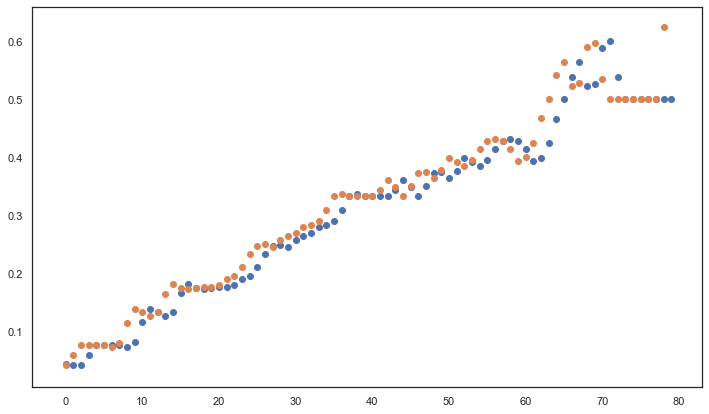

In [139]:
plt.scatter([i for i in range(len(p[0]))],[i for i in p[0]])
plt.scatter([i for i in range(len(p[1]))],[i for i in p[1]])

MannwhitneyuResult(statistic=82.0, pvalue=0.026880435568062487)
MannwhitneyuResult(statistic=8.0, pvalue=0.45935370271414444)
MannwhitneyuResult(statistic=35.0, pvalue=0.002487546898950207)


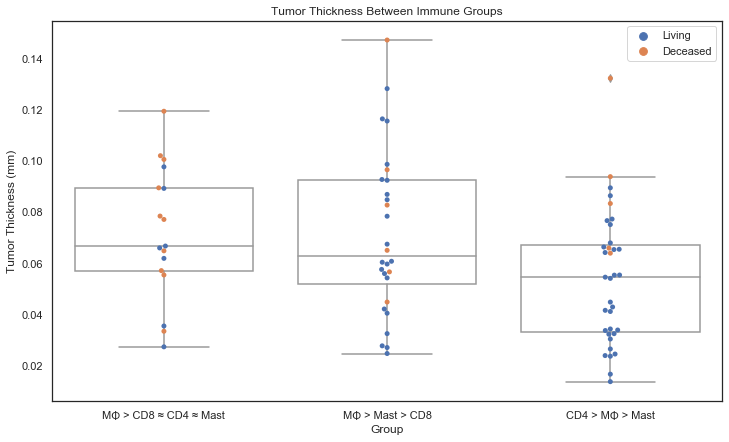

In [140]:
y = [[gene_expression.loc[p,gene], 'CD4 > MΦ > Mast' if p in immune_ids[0] else 'MΦ > CD8 ≈ CD4 ≈ Mast' if p in immune_ids[1] else "MΦ > Mast > CD8"] for p in list(immune_fractions_df.index)]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['os_status'] == 1:
        h.append("Living")
    else:
        h.append("Deceased")
#palette = sns.light_palette("orange", reverse=False,  n_colors=2)
ax=sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w",ax=ax)
plt.title("Tumor Thickness Between Immune Groups")
plt.xlabel("Group")
plt.xticks([0, 1,2], ['MΦ > CD8 ≈ CD4 ≈ Mast', "MΦ > Mast > CD8",'CD4 > MΦ > Mast'])
plt.ylabel("Tumor Thickness (mm)")
for i in range(3):
    print(mannwhitneyu(gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == -1],gene],gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == 0],gene]))

In [141]:
level = [np.percentile(gene_expression.loc[:,gene],i) for i in [10,50,90]]
rates_at_level = [1-(sum([patient_dict[p]['os_status'] for p in list(gene_expression.index) if gene_expression.loc[p,gene] < level[i]])/len([patient_dict[p]['os_status'] for p in list(gene_expression.index) if gene_expression.loc[p,gene] < level[i]])) for i in range(len(level))]
print(rates_at_level)

[0.0, 0.125, 0.2222222222222222]


In [142]:
l = []
for g in most_variant.columns:
    s ,_,score =calculate_mortality_score(g,n=3)
    l.append((g,s[1],s[0],score))
l = sorted(l,key=lambda g: g[2],reverse=True)
print(l[:20])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


[('PTMA', 6.107516311678511e-53, 0.97533552764288, 0.4540942928039703), ('RPL19', 1.5164310525654629e-50, 0.9715374007927751, 0.4514285714285714), ('CTSD', 3.0776423633458214e-50, 0.9710087419599309, 0.5397301349325337), ('EIF4A1', 5.4548525621887386e-46, 0.962591623227663, 0.7037037037037037), ('ABR', 1.8021780942858167e-44, 0.9590106803082961, 0.9210526315789473), ('MMP14', 1.6547238121943216e-42, 0.9538589540283489, 0.6807692307692308), ('EEF2', 2.9636364049920154e-42, 0.9531481093852854, 0.19166666666666662), ('UBA52', 6.007141363640021e-42, 0.9522712637388919, 0.32843137254901955), ('YWHAE', 6.322382935983915e-41, 0.9492269082309591, 0.6357142857142857), ('NME2', 9.423239512461814e-39, 0.9420738709522227, 0.5416666666666666), ('MYH9', 1.6772070257080868e-38, 0.941185673178564, 0.5933734939759037), ('MITF', 1.9537580056957028e-38, 0.9409482023083884, 0.5488826815642458), ('RPL6', 2.213887225784567e-38, 0.9407529847588314, 0.42000000000000004), ('TPP1', 8.659204643264867e-37, 0.9347

In [143]:
l = []
for g in most_variant.columns:
    level = [np.percentile(gene_expression.loc[:,gene],i) for i in [10,50,90]]
    if len([patient_dict[p]['os_status'] for p in list(gene_expression.index) if gene_expression.loc[p,g] < level[0]]) > 0:
        rates_at_level = [1-(sum([patient_dict[p]['os_status'] for p in list(gene_expression.index) if gene_expression.loc[p,g] < level[i]])/len([patient_dict[p]['os_status'] for p in list(gene_expression.index) if gene_expression.loc[p,g] < level[i]])) for i in range(len(level))]
        l.append((g,rates_at_level[2]-rates_at_level[0]))
l = sorted(l,key=lambda g: g[1],reverse=True)
print(l[:20])

[('RPL29', 0.31481481481481477), ('GLTSCR2', 0.2962962962962963), ('RPL36', 0.276595744680851), ('RPL10A', 0.2727272727272727), ('EFHD1', 0.2702702702702703), ('RPS5', 0.2692307692307693), ('RPL35', 0.2666666666666667), ('ATP5G2', 0.26315789473684215), ('PTTG1IP', 0.26086956521739135), ('GPI', 0.2564102564102564), ('RPS14', 0.2564102564102564), ('RPL27A', 0.2564102564102564), ('RPL27', 0.2535211267605634), ('HSPB1', 0.2533333333333333), ('RPL11', 0.25), ('RPS15', 0.2432432432432432), ('SERF2', 0.24285714285714288), ('EIF1', 0.23943661971830987), ('MIF', 0.23943661971830987), ('ARHGDIA', 0.23611111111111116)]


In [144]:
l = []
for g in immune_fractions_df.columns:
    s ,_,score =calculate_immune_mortality_score(g,n=3)
    l.append((g,s[1],s[0],score))
l = sorted(l,key=lambda g: g[1],reverse=False)
print(l[:20])

[('CD4 T cells', 4.688411179821047e-41, -0.9496244308731987, 0.4), ('B cells', 3.9927530453176967e-35, -0.9277348597247667, 0.4242424242424242), ('NK cells', 4.64330937528935e-30, -0.9012564918979332, 0.271190781049936), ('Macrophages', 2.805629439396216e-28, 0.8896694950360842, 0.6833333333333333), ('DC', 3.4462394367983614e-27, -0.8818793083535328, 0.31034482758620685), ('Mast cells', 2.427574252743908e-23, -0.8492797341122512, 0.3619909502262443), ('Monocytes', 4.471030558683741e-11, -0.6547203934990288, 0.20153061224489802), ('Neutrophils', 1.0647582523378874e-10, -0.6449933348028782, 0.4375), ('CD8 T cells', 8.699012817113718e-07, 0.5178139299741011, 1.0), ('Plasma cells', 2.8305418737219965e-06, 0.49638784844192313, 0.43333333333333346), ('Eosinophils', 0.0009676375884454393, 0.36202437279028227, 0.34), ('T cells gamma delta', 0.02119661993323745, -0.257341374396175, 0.5)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(-0.9484881671781085, 1.095094299363645e-40)


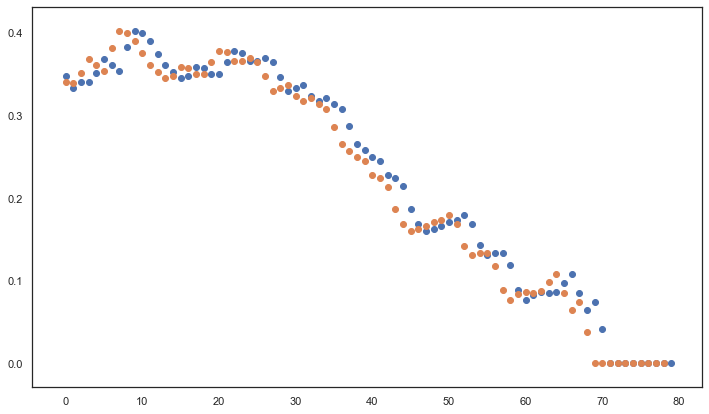

In [145]:
gene = "CD4 T cells"
s, p,score  =calculate_immune_mortality_score(gene,n=2)
print(s)
plt.scatter([i for i in range(len(p[0]))],[i for i in p[0]])
plt.scatter([i for i in range(len(p[1]))],[i for i in p[1]])

Differences between bap1
MannwhitneyuResult(statistic=90.0, pvalue=0.049395928951292495)
MannwhitneyuResult(statistic=0.0, pvalue=0.06289321231947)
MannwhitneyuResult(statistic=58.0, pvalue=0.040851098252477736)
Differences between living and dead
MannwhitneyuResult(statistic=26.0, pvalue=0.011118008343902969)
MannwhitneyuResult(statistic=12.0, pvalue=0.014054020073575896)
MannwhitneyuResult(statistic=65.0, pvalue=0.4888332188300103)


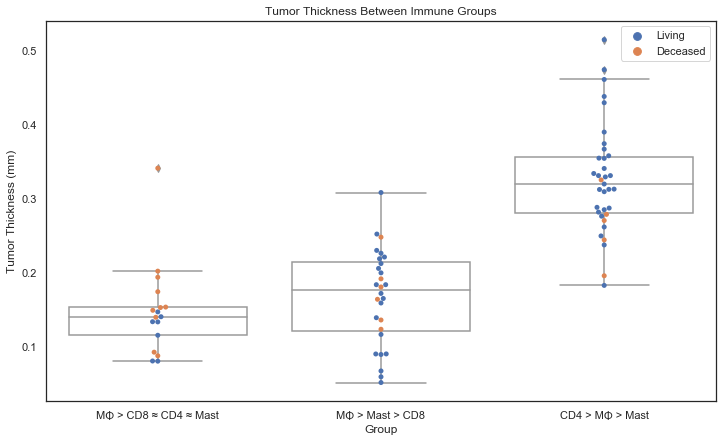

In [146]:
y = [[immune_fractions_df.loc[p,gene], 'CD4 > MΦ > Mast' if p in immune_ids[0] else 'MΦ > CD8 ≈ CD4 ≈ Mast' if p in immune_ids[1] else "MΦ > Mast > CD8"] for p in list(immune_fractions_df.index)]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['os_status'] == 1:
        h.append("Living")
    else:
        h.append("Deceased")
#palette = sns.light_palette("orange", reverse=False,  n_colors=2)
ax=sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w",ax=ax)
plt.title("Tumor Thickness Between Immune Groups")
plt.xlabel("Group")
plt.xticks([0, 1,2], ['MΦ > CD8 ≈ CD4 ≈ Mast', "MΦ > Mast > CD8",'CD4 > MΦ > Mast'])
plt.ylabel("Tumor Thickness (mm)")
print("Differences between bap1")
for i in range(3):
    print(mannwhitneyu(immune_fractions_df.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == -1],gene],immune_fractions_df.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == 0],gene]))
print("Differences between living and dead")    
for i in range(3):
    print(mannwhitneyu(immune_fractions_df.loc[[p for p in immune_ids[i] if patient_dict[p]["os_status"] == 1],gene],immune_fractions_df.loc[[p for p in immune_ids[i] if patient_dict[p]["os_status"] == 0],gene]))

### Predicting Survival Rates
What I want to do is take all of teh patients attributes and cluster tehm all together using PCA, so take immune fractions,gene expression, age,tumor thickness, everything, and then PCA it and then get teh K nearest neighbors using the ball point tree. This will be one of the hyperparameters. So using those neighbors calculate the surrounding mortlaity rate and call it the y value for the said patient. Use models with increasing amount of information about each patient to try to predict the mortaltiy rate and see how it works.

In [147]:
from sklearn.neighbors import NearestNeighbors

def make_y_values(k=3,n_components=8):
    T = pd.merge(gene_expression,immune_fractions_df,on=gene_expression.index) 
    T.index = gene_expression.index
    patients = np.asarray(list(T.index))
    for pheno in ['age','tumor_thickness','weight','tumor_diameter','gender','BAP1_mutation']:
        T[pheno] = [patient_dict[p][pheno] for p in patients]
        T[pheno]= T[pheno].fillna(T[pheno].mean())
        T[pheno] = (T[pheno]-T[pheno].min())/(T[pheno].max()-T[pheno].min())
    del T['key_0']
    pca = PCA(n_components=n_components)
    t = pca.fit_transform(T.values)
    print("Sum of explained variance:",sum(pca.explained_variance_ratio_))
    
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(t)
    y = []
    for i in range(len(patients)):
        dist, indexes = knn.kneighbors([t[i]], return_distance=True)
        weights = [(1-(w/sum(dist[0])))/k for w in dist[0]]
        pat = patients[indexes][0]
        y.append(1-sum([patient_dict[pat[i]]['os_status']*weights[i] for i in range(len(pat))]))
    
    return np.asarray(y), patients

Sum of explained variance: 0.9405481159661364
0.27504645824754925


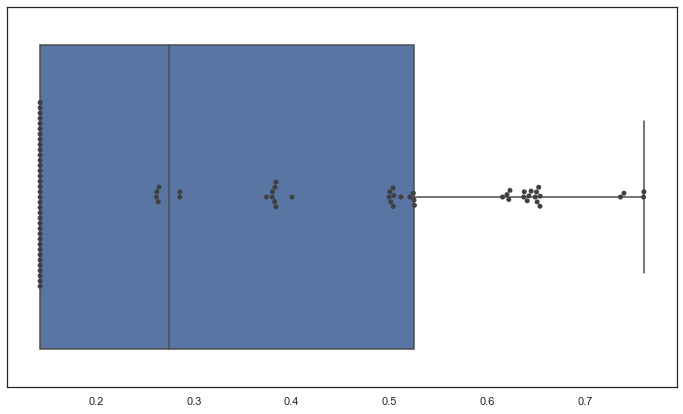

In [148]:
y,_ = make_y_values(k=7,n_components=20)
print(np.median(y))
sns.boxplot(y)
sns.swarmplot(y, color=".25")

In [149]:
print(sum([1 for p in list(patient_dict.keys()) if patient_dict[p]['os_status'] == 0])/80)

0.2625


In [150]:
X = pd.DataFrame()
y, include = make_y_values(k=7,n_components=20)
X['age'] = [patient_dict[p]['age'] for p in include]
X['age'] = (X['age']-X['age'].min())/(X['age'].max()-X['age'].min())
X['tumor_thickness'] = [patient_dict[p]['tumor_thickness'] for p in include]
X['tumor_thickness'] = (X['tumor_thickness']-X['tumor_thickness'].min())/(X['tumor_thickness'].max()-X['tumor_thickness'].min())
X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
#X['gender'] = [patient_dict[p]['gender'] for p in include]
#X['stage'] = [patient_dict[p]['stage'] for p in include]
#pca = PCA(n_components=6).fit(gene_expression.loc[include,:])
#transformed = pca.transform(gene_expression.loc[include,:])
#X['1'] = transformed[:,0]
#X['2'] = transformed[:,1]
#X['3'] = transformed[:,2]
#X['4'] = transformed[:,3]
#X['5'] = transformed[:,4]
#X['6'] = transformed[:,5]

X['ABR'] = gene_expression.loc[include,"ABR"].values

X['CD8 T cells']= immune_fractions_df.loc[include,'CD8 T cells'].values
X['Macrophages']= immune_fractions_df.loc[include,'Macrophages'].values
X['CD4 T cells']= immune_fractions_df.loc[include,'CD4 T cells'].values
X['B cells']= immune_fractions_df.loc[include,'B cells'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

Sum of explained variance: 0.9405481840910846


In [151]:
#parameters = {'n_estimators':[200], 'min_samples_split':[4,8],'max_features':[1,2,3,4],'criterion':['mae','mse'], 'max_depth':[3]}
#parameters = {'loss':['huber'],'learning_rate':[.01,.05,.001],'n_estimators':[50,100],"max_depth":[1,2,3],"max_features":['auto','sqrt','log2']}
parameters = {"kernel":['linear'],"gamma":['scale','auto'],'C':[1,10,100],"epsilon":[.1,.01,.5]}
grid = GridSearchCV(SVR(),parameters, cv=10,iid=False)
grid.fit(X_train,y_train,sample_weight=[(i+.1)/max(y_train) for i in y_train])
thickness_pred = grid.predict(X_test)

#### SVR Results

In [152]:
grid.best_estimator_.coef_,X.columns,grid.best_estimator_.get_params()

(array([[ 0.04710488,  0.1230366 , -0.31021557,  0.55306893,  0.41654711,
          0.29733784,  0.09788203, -0.19650195]]),
 Index(['age', 'tumor_thickness', 'BAP1_mutation', 'ABR', 'CD8 T cells',
        'Macrophages', 'CD4 T cells', 'B cells'],
       dtype='object'),
 {'C': 10,
  'cache_size': 200,
  'coef0': 0.0,
  'degree': 3,
  'epsilon': 0.01,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': -1,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False})

0.8944649023864608
MSE: 0.004470673097492462 MAE: 0.034587215097154456


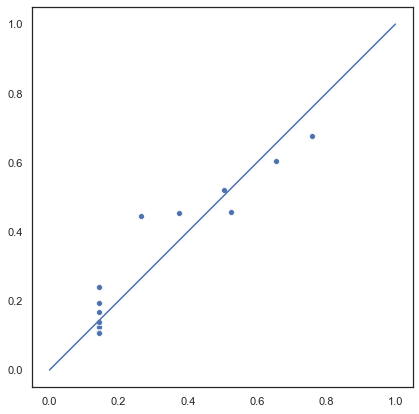

In [153]:
x = np.linspace(0, 1, 10)
plt.plot(x,x)
sns.scatterplot(y_test,thickness_pred)
plt.gca().set_aspect('equal', adjustable='box')
print(grid.best_estimator_.score(X_test,y_test))
print("MSE:",mean_squared_error(thickness_pred,y_test),"MAE:",median_absolute_error(thickness_pred,y_test))

#### RF Results

In [154]:
print(grid.best_params_)
srt = [(X.columns[i],grid.best_estimator_.feature_importances_[i]) for i in range(len(grid.best_estimator_.feature_importances_))]
srt = sorted(srt, key=lambda g:g[1],reverse=True)
print(srt)

{'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [ ]:
x = np.linspace(0, 1, 10)
plt.plot(x,x)
sns.scatterplot(y_test,thickness_pred,hue=["In CI" if i else "Not in CI" for i in lies_within_ci(grid.best_estimator_,X_test.values,y_test,num_std=2)])
plt.gca().set_aspect('equal', adjustable='box')
print(grid.best_estimator_.score(X_test,y_test))
print("MSE:",mean_squared_error(thickness_pred,y_test),"MAE:",median_absolute_error(thickness_pred,y_test))

#### Testing models

In [ ]:
X = pd.DataFrame()
y, include = make_y_values(k=7,n_components=8)
X['age'] = [patient_dict[p]['age'] for p in include]
X['age'] = (X['age']-X['age'].min())/(X['age'].max()-X['age'].min())
X['tumor_thickness'] = [patient_dict[p]['tumor_thickness'] for p in include]
X['tumor_thickness'] = (X['tumor_thickness']-X['tumor_thickness'].min())/(X['tumor_thickness'].max()-X['tumor_thickness'].min())
X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
#X['gender'] = [patient_dict[p]['gender'] for p in include]
#X['stage'] = [patient_dict[p]['stage'] for p in include]

X['VIM'] = gene_expression.loc[include,"ABR"].values
X['PTMA'] = gene_expression.loc[include,"PTMA"].values
X['MSN'] = gene_expression.loc[include,"MSN"].values

X['CD8 T cells']= immune_fractions_df.loc[include,'CD8 T cells'].values
X['Macrophages']= immune_fractions_df.loc[include,'Macrophages'].values
X['CD4 T cells']= immune_fractions_df.loc[include,'CD4 T cells'].values
X['B cells']= immune_fractions_df.loc[include,'B cells'].values

scores = []
for i in range(50):
    #X['Mast cells']= immune_fractions_df.loc[include,'Mast cells'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)
    parameters = {"kernel":['linear'],"gamma":['scale'],'C':[1,10,100],"epsilon":[.1,.01]}
    grid = GridSearchCV(SVR(),parameters, cv=10,iid=False)
    grid.fit(X_train,y_train)
    thickness_pred = grid.predict(X_test)
    thickness_pred[thickness_pred<0] = 0
    scores.append(median_absolute_error(thickness_pred,y_test))
    plt.scatter(y_test,thickness_pred)
print(np.mean(scores))
plt.plot([0,.8],[0,.8])

### Kaplan Meier Stuff

In [155]:
cut = np.median(immune_fractions_df.loc[:,"CD4 T cells"])

In [491]:
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.statistics import logrank_test

def km_plot(X,y,label='Kaplan Meier Estimate'):
    ## create a kmf object
    kmf = KaplanMeierFitter() 

    ## Fit the data into the model
    kmf.fit(X, y,label=label)

    ## Create an estimate
    kmf.plot(ci_show=True) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
    
def km_expression_impact(gene, patients=list(gene_expression.index),plot=False):
    T1 = gene_expression.loc[patients, gene]
    O1 =[1 if patient_dict[p]['os_status'] == 0 else 0 for p in patients]
    kmf = KaplanMeierFitter()
    kmf.fit(T1, event_observed=O1)
    hzrd = NelsonAalenFitter()
    hzrd.fit(T1,event_observed=O1)
    if plot:
        kmf.plot()
        hzrd.plot()
    CDF = kmf.cumulative_density_at_times(gene_expression.loc[patients, gene]).values
    #print(hzrd.predict(T1))
    hazard = hzrd.predict(T1)
    return stats.pearsonr(gene_expression.loc[patients, gene].values,hazard),np.max(hazard)

def km_immune_impact(gene, patients=list(gene_expression.index),plot=False):
    T1 = immune_fractions_df.loc[patients, gene]
    O1 =[1 if patient_dict[p]['os_status'] == 0 else 0 for p in patients]
    kmf = KaplanMeierFitter()
    kmf.fit(T1, event_observed=O1)
    hzrd = NelsonAalenFitter()
    hzrd.fit(T1,event_observed=O1)
    if plot:
        kmf.plot()
        hzrd.plot()
    CDF = kmf.cumulative_density_at_times(immune_fractions_df.loc[patients, gene].max()).values
    #cum_hzrd = hzrd.cumulative_hazard_at_times(immune_fractions_df.loc[patients, gene]).values
    #print(CDF)
    hazard = hzrd.predict(T1)
    #print(type(hazard))
    return stats.pearsonr(immune_fractions_df.loc[patients, gene].values,hazard),CDF[0]

In [520]:
Counter(presence_df.loc[:,'PRKDC'])

Counter({2: 6, 1: 41, 0: 33})

Differences between bap1
MannwhitneyuResult(statistic=25.0, pvalue=4.6215879080500285e-05)
MannwhitneyuResult(statistic=2.0, pvalue=0.13078611800697465)
MannwhitneyuResult(statistic=21.0, pvalue=0.0002715198493044086)
Differences between living and dead
MannwhitneyuResult(statistic=19.0, pvalue=0.0044444849719571505)
MannwhitneyuResult(statistic=28.0, pvalue=0.26293109434238304)
MannwhitneyuResult(statistic=23.0, pvalue=0.008667056211236404)


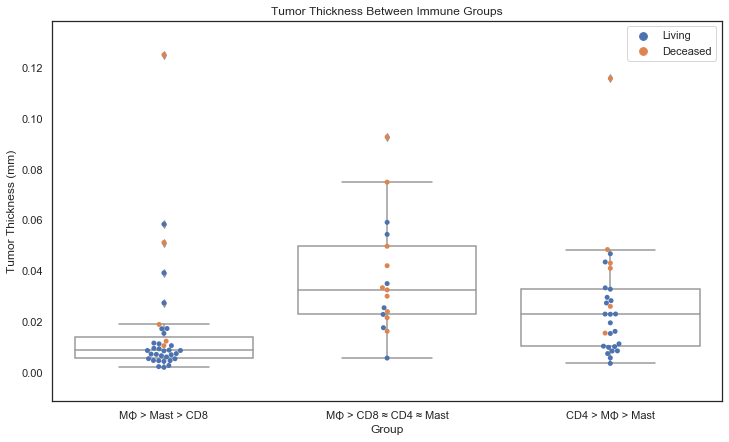

In [654]:
gene = 'COL18A1'
y = [[gene_expression.loc[p,gene], 0 if p in immune_ids[0] else 1 if p in immune_ids[1] else 2] for p in list(immune_fractions_df.index)]
temp_df = pd.DataFrame(data=y)
temp_df.columns= ['y','x']
h = []
for p in list(patient_dict.keys()):
    if patient_dict[p]['os_status'] == 1:
        h.append("Living")
    else:
        h.append("Deceased")
#palette = sns.light_palette("orange", reverse=False,  n_colors=2)
ax=sns.swarmplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,hue=h)
sns.boxplot(x=temp_df["x"],y=temp_df["y"],data=temp_df,color="w",ax=ax)
plt.title("Tumor Thickness Between Immune Groups")
plt.xlabel("Group")
plt.xticks([0, 1,2], ["MΦ > Mast > CD8",'MΦ > CD8 ≈ CD4 ≈ Mast','CD4 > MΦ > Mast'])
plt.ylabel("Tumor Thickness (mm)")
print("Differences between bap1")
for i in range(3):
    print(mannwhitneyu(gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == -1],gene],gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["BAP1_mutation"] == 0],gene]))
print("Differences between living and dead")    
for i in range(3):
    print(mannwhitneyu(gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["os_status"] == 1],gene],gene_expression.loc[[p for p in immune_ids[i] if patient_dict[p]["os_status"] == 0],gene]))

In [530]:
def percentage_mutated(gene, patients=list(immune_fractions_df.index)):
    if gene in presence_df.columns:
        c = Counter(presence_df.loc[patients,gene].values)
        g = [0,0]
        for k in c.keys():
            if k != 0:
                g[1]+= c[k]
            else:
                g[0]+= c[k]
        return g[1]/sum(g)
    else:
        return 0

((0.9773670204085936, 2.2208584875141825e-54), 2.152594461983411)

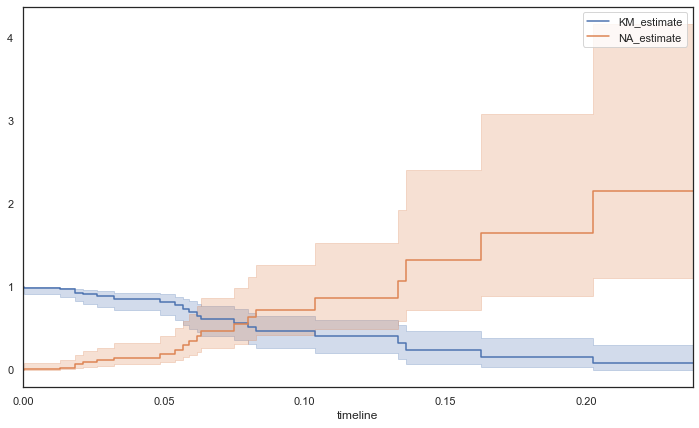

In [647]:
km_expression_impact("MET",plot=True)

In [516]:
l = []
for g in most_variant.columns:
    s,h =km_expression_impact(g)
    l.append((g,s[0],s[1],h))
l = sorted(l,key=lambda g: g[1],reverse=True)
print(l[:20])
#km_expression_impact("BAP1")

[('TMSL3', 0.9925868746474873, 3.672625995246956e-73, 1.6611906587705962), ('ZFP106', 0.988470392797296, 1.029015370841366e-65, 1.992347245634487), ('LAPTM4B', 0.9877917291829517, 9.455333520722624e-65, 2.0083497057945285), ('GNS', 0.9870499133653781, 9.30668479585834e-64, 1.7646976796288), ('PRKDC', 0.98427135481712, 1.732263768442993e-60, 2.074034351531597), ('WARS', 0.9837408499529208, 6.254140289014352e-60, 1.9207310517927738), ('GSN', 0.9833101062670508, 1.7200787448620508e-59, 2.603191321308883), ('TRAM1', 0.9824857838333271, 1.1102229479446775e-58, 2.516548740531353), ('GAS5', 0.9818930532302756, 4.020934279434355e-58, 2.008687574008631), ('RPL18', 0.9814711499780907, 9.795558007079466e-58, 1.8732988324351763), ('FKBP10', 0.9810213254427451, 2.4754644826427545e-57, 2.6520998329392795), ('SDCBP', 0.9800221436476423, 1.7971322326766664e-56, 2.778925606429693), ('CCND1', 0.9781914522287394, 5.3056693985468015e-55, 2.6670828543045793), ('PLEC', 0.9780061644620291, 7.354084416365201e

((0.9600680039655585, 7.413607055569963e-25), 0.6620133160022608)

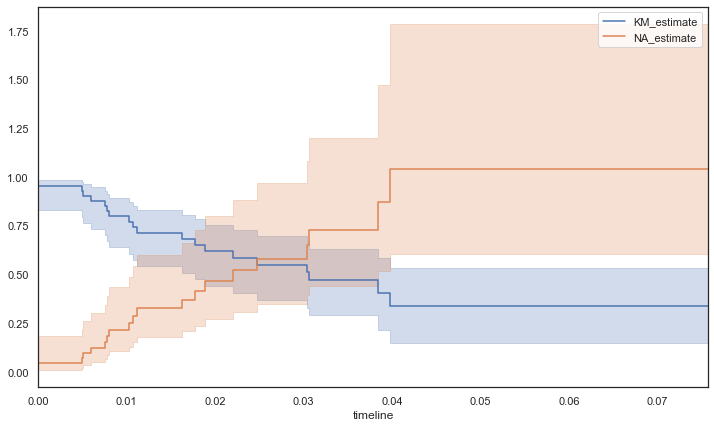

In [557]:
#km_immune_impact('Macrophages',plot=True)
km_immune_impact('B cells',plot=True,patients=bap1_grouped_ids[1])

In [662]:
l = []
for g in most_variant.columns:
    s =percentage_mutated(g)
    l.append((g,s))
l = sorted(l,key=lambda g: g[1],reverse=True)
print(l[:20])

[('CYC1', 0.7625), ('EIF3H', 0.7625), ('GPAA1', 0.7625), ('ST3GAL1', 0.7625), ('PLEC', 0.7625), ('MTSS1', 0.7625), ('PTP4A3', 0.7625), ('GRINA', 0.7625), ('LY6E', 0.7625), ('EEF1D', 0.7625), ('RPL8', 0.7625), ('UQCRB', 0.75), ('EIF3E', 0.75), ('LAPTM4B', 0.75), ('YWHAZ', 0.75), ('RPL30', 0.75), ('PABPC1', 0.75), ('TRAM1', 0.675), ('SDCBP', 0.6125), ('RPS20', 0.6)]


In [663]:
percentage_mutated("COL18A1"),percentage_mutated("MET")

(0.2125, 0.0875)

In [664]:
l = []
for g in immune_fractions_df.columns:
    s,h =km_immune_impact(g)
    l.append((g,s[0],s[1],h))
l = sorted(l,key=lambda g: g[3],reverse=False)
print(l[:20])
#km_expression_impact("BAP1")

[('T cells gamma delta', 0.9395655231390829, 4.6928373390137535e-38, 0.3999999999999999), ('CD4 T cells', 0.9687768119414575, 5.323505656598705e-49, 0.41634354800089646), ('B cells', 0.9497774042082596, 4.1761394478219677e-41, 0.4178329903590833), ('NK cells', 0.9782237027095979, 5.011141646367127e-55, 0.4278572705510685), ('DC', 0.9624392745612139, 6.373445458999492e-46, 0.4976264992252709), ('Neutrophils', 0.9664772637592034, 8.147682006771727e-48, 0.5217142857142855), ('Mast cells', 0.9033938387811156, 2.0616489288958185e-30, 0.524916681532763), ('Monocytes', 0.9386717405886491, 8.178795501532605e-38, 0.55041984298555), ('Eosinophils', 0.9073379382387495, 4.37953979544716e-31, 0.7476155264060357), ('Plasma cells', 0.9065930136473732, 5.898977998987364e-31, 1.0), ('CD8 T cells', 0.9640419237763436, 1.1993176628839865e-46, 1.0), ('Macrophages', 0.8175314428809626, 2.215495636392795e-20, 1.0)]


In [658]:
from lifelines import CoxPHFitter

cox = pd.DataFrame()
cox['DSS_time'] = [patient_dict[p]['DSS_time'] for p in list(immune_fractions_df.index)]
cox['OS'] = [1 if patient_dict[p]['os_status'] == 0 else 0 for p in list(immune_fractions_df.index)]
cox['age'] = [patient_dict[p]['age'] for p in list(immune_fractions_df.index)]
cox['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in list(immune_fractions_df.index)]
#cox['BAP1_expression'] = gene_expression.loc[list(immune_fractions_df.index),"BAP1"].values
#cox['tumor_thickness'] = [patient_dict[p]['tumor_thickness'] for p in list(immune_fractions_df.index)]
cox['CD4 T cells'] = immune_fractions_df.loc[:,"CD4 T cells"].values
cox['CD8 T cells'] = immune_fractions_df.loc[:,"CD8 T cells"].values
#cox['Macrophages'] = immune_fractions_df.loc[:,"Macrophages"].values
cox['B cells'] = immune_fractions_df.loc[:,"B cells"].values

cph = CoxPHFitter()
cph.fit(cox, duration_col='DSS_time', event_col='OS',robust=True)
cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 80 total observations, 59 right-censored observations>
             duration col = 'DSS_time'
                event col = 'OS'
          robust variance = True
      baseline estimation = breslow
   number of observations = 80
number of events observed = 21
   partial log-likelihood = -57.19
         time fit was run = 2020-08-22 03:15:11 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
age             0.07       1.08       0.02             0.03             0.12                 1.03                 1.12
BAP1_mutation  -2.81       0.06       1.05            -4.87            -0.76                 0.01                 0.47
CD4 T cells    -7.71       0.00       3.34           -14.26            -1.16                 0.00                 0.31
CD8 T cells    -2.53       0.08       1.94            -6.34             1.29                 0.00                 3.62
B cells       -45.55       0.00      18.53           -81.87            -9.23                 0.00                 0.00
                  z      p   -log2(p)
covariate                            
age            3.57 <0.005      11.45
BAP1_mutation -2.68   0.01       7.10
CD4 T cells   -2.31   0.02       5.57
CD8 T cells   -1.30   0.19       2.37
B cells       -2.46   0.01       6.16
---
Concordance = 0.85
Partial AIC = 124.37
log-likelihood ratio test = 39.89 on 5 df
-log2(p) of ll-ratio test = 22.60

In [646]:
cph.concordance_index_

0.8483263598326359

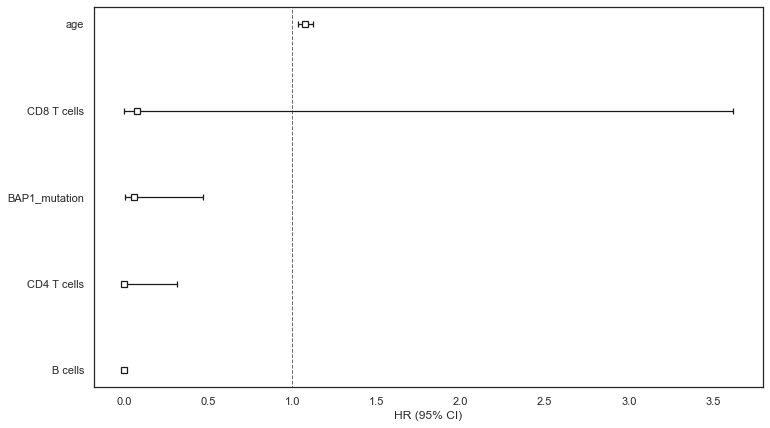

In [630]:
cph.plot(hazard_ratios=True)

In [631]:
cph.check_assumptions(cox, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


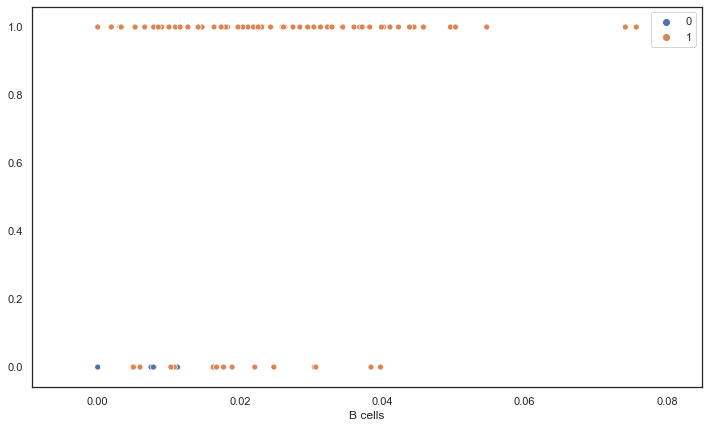

In [436]:
#sns.boxplot(cph.predict_cumulative_hazard(cox,times=[2600]).T)
tl = cph.predict_cumulative_hazard(cox,times=[2600]).T
tl.index = immune_fractions_df.index
#print(tl['2600.0'])tl.loc[:,tl.columns[0]].values
over = [0  if immune_fractions_df.loc[p,"CD8 T cells"] > .2 else 1 for p in list(immune_fractions_df.index)]
sns.scatterplot(immune_fractions_df.loc[:,"B cells"],[0 if patient_dict[p]['os_status'] == 0 else 1 for p in list(immune_fractions_df.index)],hue=over)

In [434]:
print_significant_immune_differences(immune_fractions_df,mort_grouped_ids)

CD8 T cells  difference between groups  0   1  p-value:  0.0022764822959853016
Monocytes  difference between groups  0   1  p-value:  0.029891791414375885
Eosinophils  difference between groups  0   1  p-value:  0.044262466503300284
B cells  difference between groups  0   1  p-value:  0.003938208370186416
CD4 T cells  difference between groups  0   1  p-value:  0.02783582655768996
NK cells  difference between groups  0   1  p-value:  0.04009588055695323
Macrophages  difference between groups  0   1  p-value:  0.01519007303248467
Mast cells  difference between groups  0   1  p-value:  0.014372424983396814


In [385]:
mannwhitneyu(tl.loc[immune_ids[1],tl.columns[0]],tl.loc[immune_ids[2],tl.columns[0]])

MannwhitneyuResult(statistic=138.0, pvalue=0.009920753754583712)

Text(0.5, 1.0, 'B cells Partial Effect')

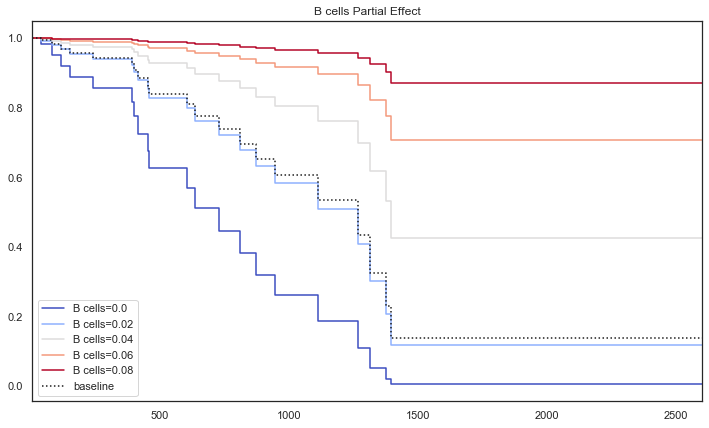

In [593]:
cph.plot_partial_effects_on_outcome('B cells', values=np.arange(0, .09, .02), cmap='coolwarm')
plt.title("B cells Partial Effect")

Text(0.5, 1.0, 'CD8 T cells Partial Effect')

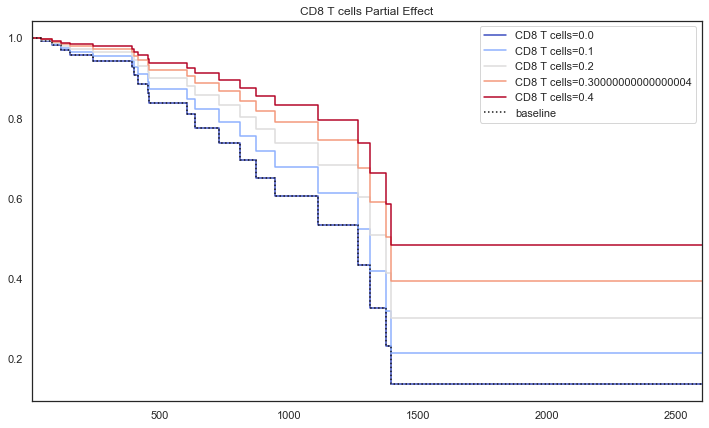

In [594]:
cph.plot_partial_effects_on_outcome('CD8 T cells', values=np.arange(0, .43, .1), cmap='coolwarm')
plt.title("CD8 T cells Partial Effect")

Text(0.5, 1.0, 'CD4 T cells Partial Effect')

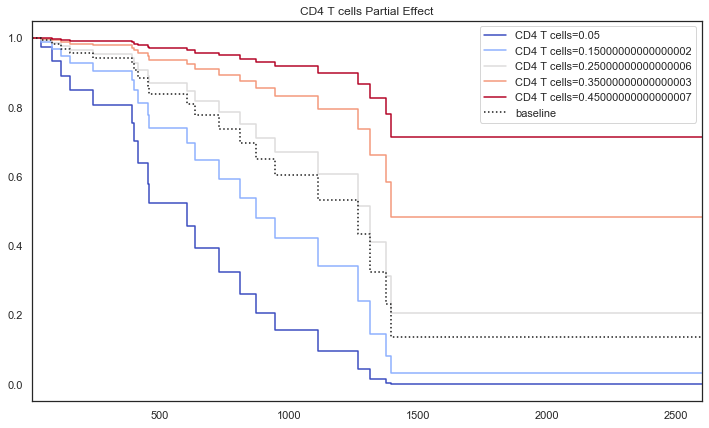

In [595]:
cph.plot_partial_effects_on_outcome('CD4 T cells', values=np.arange(0.05, .52, .1), cmap='coolwarm')
plt.title("CD4 T cells Partial Effect")

Text(0.5, 1.0, 'Age Partial Effect')

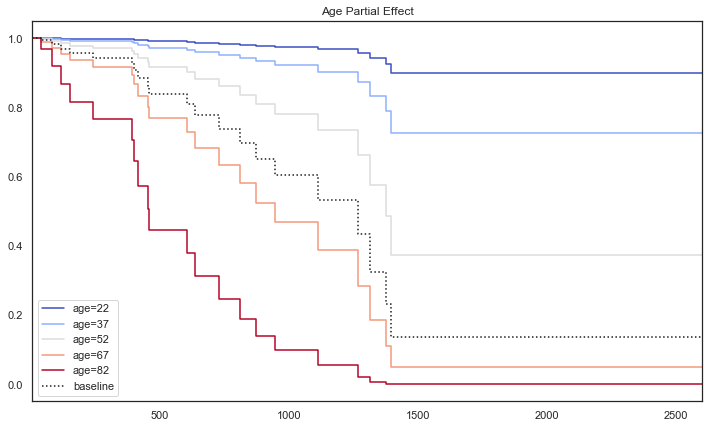

In [597]:
cph.plot_partial_effects_on_outcome('age', values=np.arange(22, 86, 15), cmap='coolwarm')
plt.title("Age Partial Effect")

In [590]:
min([patient_dict[p]['age'] for p in list(immune_fractions_df.index)])

22

Text(0.5, 1.0, 'BAP1 mutation Partial Effect')

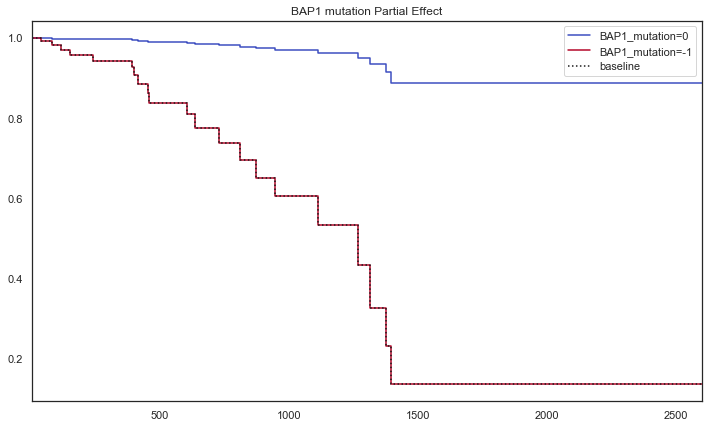

In [596]:
cph.plot_partial_effects_on_outcome('BAP1_mutation', values=[[0],[-1]], cmap='coolwarm')
plt.title("BAP1 mutation Partial Effect")

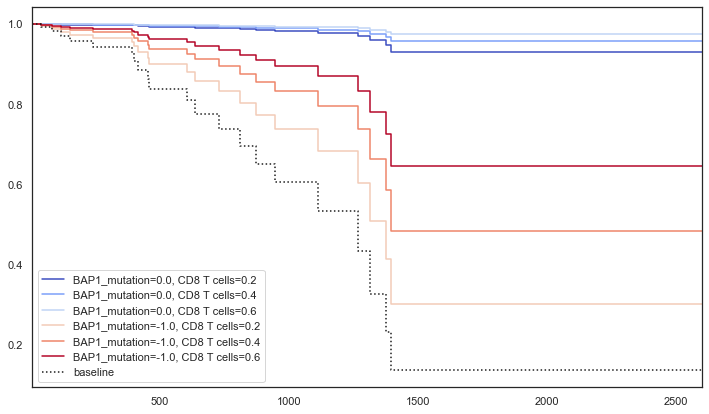

In [455]:
cph.plot_partial_effects_on_outcome(['BAP1_mutation', 'CD8 T cells'], values=[
 [0,  .2],
 [0, .4],
 [0,  .6],
 [-1,  .2],
 [-1, .4],
 [-1,  .6],   
], cmap='coolwarm')

### Gene Highest Concordance Finder

In [643]:
ci_genes = []
for gene in most_variant.columns:
    if len(set(gene_expression.loc[immune_fractions_df.index,gene].values)) > 1 and gene not in ['LOC96610','COL18A1','MET']:
        cox2 = pd.DataFrame()
        cox2['DSS_time'] = [patient_dict[p]['DSS_time'] for p in list(immune_fractions_df.index)]
        cox2['OS'] = [1 if patient_dict[p]['os_status'] == 0 else 0 for p in list(immune_fractions_df.index)]
        cox2['age'] = [patient_dict[p]['age'] for p in list(immune_fractions_df.index)]
        cox2['COL18A1'] = gene_expression.loc[immune_fractions_df.index,'COL18A1'].values
        cox2['MET'] = gene_expression.loc[immune_fractions_df.index,'MET'].values
        cox2[gene] = gene_expression.loc[immune_fractions_df.index,gene].values

        cph2 = CoxPHFitter()
        cph2.fit(cox2, duration_col='DSS_time', event_col='OS',robust=True)
        ci_genes.append((gene,cph2.concordance_index_))

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
ci_genes = sorted(ci_genes,key=lambda g: g[1],reverse=True)
print(ci_genes[:20])

### CD4 T cell Prediction

In [269]:
l = []
grp = bap1_grouped_ids[0]#list(gene_expression.index)
for gene_name in list(most_variant.columns):
    for i in ['CD8 T cells']: #immune_fractions_df.columns:
        r, p = stats.pearsonr(immune_fractions_df.loc[grp,i],gene_expression.loc[grp,gene_name])
        
        if p < .05:
            l.append((gene_name,i,r,p))
            #print("|",gene_name,"|",i,"|",r,"|",p,"|")
            
l = sorted(l, key=lambda g: g[3], reverse=False)
print(l[:20])

[('LOC96610', 'CD8 T cells', 0.8396495239924059, 1.55125693290185e-10), ('HLA-E', 'CD8 T cells', 0.7422122866920657, 2.204428718658864e-07), ('TAP1', 'CD8 T cells', 0.7202796493703862, 7.318450597031055e-07), ('HLA-DRA', 'CD8 T cells', 0.6965489161689615, 2.3778143601538186e-06), ('CD74', 'CD8 T cells', 0.6898464884365461, 3.2510218594813223e-06), ('ADAM6', 'CD8 T cells', 0.6779285219605423, 5.5581506578538165e-06), ('WARS', 'CD8 T cells', 0.6361531460827448, 3.0463228871933297e-05), ('TTYH3', 'CD8 T cells', 0.6323934433526682, 3.5072207032395634e-05), ('TMSL3', 'CD8 T cells', 0.6281521051467244, 4.1023086995623694e-05), ('FTL', 'CD8 T cells', 0.6239712237845688, 4.776917039200285e-05), ('TMSB10', 'CD8 T cells', 0.5987806364039554, 0.00011432622790775172), ('STAT1', 'CD8 T cells', 0.5665459918278749, 0.0003156101030485536), ('MXRA7', 'CD8 T cells', 0.5605105522148334, 0.0003773528147804728), ('ARF1', 'CD8 T cells', 0.5520402774177368, 0.00048214561507529605), ('UBC', 'CD8 T cells', 0.5

In [276]:
include = [p for p in list(immune_fractions_df.index) if not np.isnan(patient_dict[p]['tumor_thickness'])]
#X= immune_fractions_df.loc[include,:]
X = pd.DataFrame()
X['age'] = [patient_dict[p]['age'] for p in include]
X['age'] = (X['age']-X['age'].min())/(X['age'].max()-X['age'].min())
X['BAP1_mutation'] = [patient_dict[p]['BAP1_mutation'] for p in include]
#X['gender'] = [patient_dict[p]['gender'] for p in include]
X['ENO2'] = gene_expression.loc[include,"ENO2"].values
#X['GNAT1'] = gene_expression.loc[include,"GNAT1"].values
#X['ARF1'] = gene_expression.loc[include,'ARF1'].values
#X['CALR'] = gene_expression.loc[include,'CALR'].values
X['CD74'] = gene_expression.loc[include,'CD74'].values
X['HLA-A'] = gene_expression.loc[include,'HLA-A'].values
#X['stage'] = [patient_dict[p]['stage'] for p in include]
y= immune_fractions_df.loc[include,"CD4 T cells"]
pca = PCA(n_components=6).fit(gene_expression.loc[include,:])
print(sum(pca.explained_variance_ratio_))
#transformed = pca.transform(gene_expression.loc[include,:])
#X['1'] = transformed[:,0]
#X['2'] = transformed[:,1]
#X['3'] = transformed[:,2]
#X['4'] = transformed[:,3]
#X['5'] = transformed[:,4]
#X['6'] = transformed[:,5]

#X['CD8 T cells']= immune_fractions_df.loc[include,'CD8 T cells'].values
#X['Macrophages']= immune_fractions_df.loc[include,'Macrophages'].values
#X['CD4 T cells']= immune_fractions_df.loc[include,'CD4 T cells'].values
#X['Mast cells']= immune_fractions_df.loc[include,'Mast cells'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15)

0.8000980930524256


In [277]:
parameters = {"kernel":['linear'],"gamma":['scale','auto'],'C':[1,10,100],"epsilon":[.1,.01,.5]}
grid = GridSearchCV(SVR(),parameters, cv=20,iid=False)
grid.fit(X_train,y_train) #,sample_weight=[(i+.1)/max(y_train) for i in y_train]
thickness_pred = grid.predict(X_test)

[[ 0.02874818  0.10090396  0.25267809 -0.11769275 -0.00123687]] Index(['age', 'BAP1_mutation', 'ENO2', 'CD74', 'HLA-A'], dtype='object') {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
-0.26545158560622406
MSE: 0.014158421796171225 MAE: 0.0868932149777854


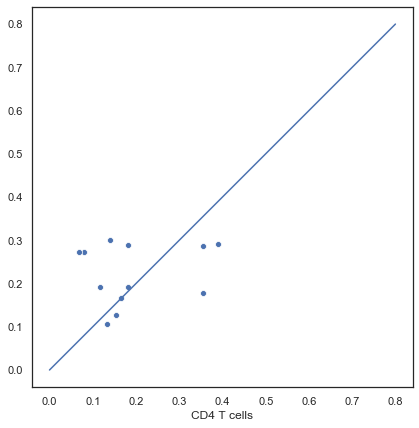

In [278]:
print(grid.best_estimator_.coef_,X.columns,grid.best_estimator_.get_params())
x = np.linspace(0, .8, 10)
plt.plot(x,x)
sns.scatterplot(y_test,thickness_pred)
plt.gca().set_aspect('equal', adjustable='box')
print(grid.best_estimator_.score(X_test,y_test))
print("MSE:",mean_squared_error(thickness_pred,y_test),"MAE:",median_absolute_error(thickness_pred,y_test))